<a href="https://colab.research.google.com/github/Akanksha-Nakati/Data-Science-Engineering-Methods/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

## **Model Interpretability**

# Abstract
The dataset covers a wide range of professions and age groups, providing insights into how various factors may impact individuals' health and sleep patterns. Notable attributes such as sleep duration, quality of sleep, stress level, and the presence of sleep disorders can shed light on the relationship between lifestyle and well-being.

This dataset can be valuable for conducting research or analysis in the fields of healthcare, sleep science, and lifestyle management. It offers an opportunity to explore the connections between various factors and health outcomes, ultimately contributing to a better understanding of the complex interplay between lifestyle choices and individuals' physical well-being.

# Dataset
The Sleep Health and Lifestyle Dataset comprises total of 372 observations.This dataset appears to contain information related to the health and lifestyle of various individuals, including their sleep patterns, physical activity, and health conditions. It could be used for various analyses and insights related to health and well-being.

Dataset Includes:

1.Person ID: A unique identifier for each individual in the dataset.

2.Gender: The gender of the individual, categorized as either "Male" or another value if applicable.

3.Age: The age of the individual, represented in years.

4.Occupation: The occupation or profession of the individual, such as "Software Engineer," "Doctor," or "Sales Representative."

5.Sleep Duration: The average duration of sleep per night in hours.

6.Quality of Sleep: A rating of the quality of sleep on a scale, possibly ranging from 1 to 10, where higher values indicate better sleep quality.

7.Physical Activity Level: A measure of the individual's physical activity, possibly on a scale from low to high, with specific values like "30" and "60" indicating the activity level.

8.Stress Level: The level of stress experienced by the individual, typically measured on a scale, with higher values indicating higher stress levels.

9.BMI Category: The Body Mass Index (BMI) category of the individual, categorized as "Overweight," "Normal," or "Obese" based on their BMI value.

10.Blood Pressure: The individual's blood pressure, usually represented as two values - systolic and diastolic, e.g., "126/83."

11.Heart Rate: The resting heart rate of the individual, typically measured in beats per minute (BPM).

12.Daily Steps: The number of steps taken by the individual on a daily basis as a measure of physical activity.

13.Sleep Disorder: Any sleep disorders or conditions reported by the individual, such as "Sleep Apnea" or "Insomnia." Multiple disorders are separated by commas.

# **Aim**
Investigate and understand the factors that affect sleep quality using insights from linear models, tree-based models, and AutoML. The goal is to gain actionable insights that can guide potential interventions or lifestyle adjustments.

# **Importing Libraries**

In [1]:
#installing shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.8 MB/s eta 0:00:00


In [2]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np
#plotting data and create visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

In [3]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reads csv and stores dataset as dataframe
sleep_df=pd.read_csv("https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv")


# Data Checking

In [5]:
#displays first 10 rows of dataset
sleep_df.head(10)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   
8                 7                       75             6       Normal   
9                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000           None  
8         120/80          70         8000           None  
9         120/80          70         8000           None

In [6]:
#displays information about the dataset
sleep_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
#displays information about numerical columns only
sleep_df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [79]:
sleep_df.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [9]:
import statsmodels.formula.api as smf

# Rename the columns in the DataFrame to have no spaces and special characters
sleep_df.columns = sleep_df.columns.str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

The default value of regex will change from True to False in a future version.


# Splitting the data into training and validation dataset

In [10]:
#droping the unrequired variables
x=sleep_df.drop(['Person_ID','Gender','Occupation','BMI_Category','Blood_Pressure','Sleep_Disorder','Quality_of_Sleep'], axis=1)

In [11]:
decimal_places = 0
x['Sleep_Duration'] = x['Sleep_Duration'].round(decimal_places)

In [12]:
x.head()

Age  Sleep_Duration  Physical_Activity_Level  Stress_Level  Heart_Rate  \
0   27             6.0                       42             6          77   
1   28             6.0                       60             8          75   
2   28             6.0                       60             8          75   
3   28             6.0                       30             8          85   
4   28             6.0                       30             8          85   

   Daily_Steps  
0         4200  
1        10000  
2        10000  
3         3000  
4         3000

In [13]:
decimal_places = 0
sleep_df['Quality_of_Sleep'] = sleep_df['Quality_of_Sleep'].round(decimal_places)

In [14]:
sleep_df.head()

Person_ID Gender  Age            Occupation  Sleep_Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [15]:
y= sleep_df.Quality_of_Sleep

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, shuffle=False)

 In the above, the input data is split(x and y) into training and testing sets, with 80% of the data used for training and 20% for testing.








# Fit Linear Model Building using Logistic Regression

In [17]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [18]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Heart_Rate               0.053068
Stress_Level             0.006775
Age                      0.003688
Sleep_Duration           0.001955
Daily_Steps             -0.000999
Physical_Activity_Level -0.011838

In [19]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Heart_Rate               1.054502
Stress_Level             1.006798
Age                      1.003695
Sleep_Duration           1.001957
Daily_Steps              0.999001
Physical_Activity_Level  0.988232

Converting above log odd coefficients to regular odds:

1.Fit a linear model and interpret the regression coefficients

Ans:When the variable Heart Rate is increased by one unit, the odds of having a good quality Sleep in the target class ("2") increase by more than 1.05x compared to the odds of not having good quality of sleep in the target class. For a one-unit increase in Sleep Duration, the odds of the event happening increase by approximately 1.00 times. Again, the impact seems minimal.For a one-unit increase in Physical Activity Level, the odds of the event happening decrease by approximately 0.988 times. This suggests the odds of having a good sleep decreases with an increase in physical activity level.

# Tree-based Model Building using XGBoost

In [20]:
y_train.head()

0    6
1    6
2    6
3    4
4    4
Name: Quality_of_Sleep, dtype: int64

In [21]:
# Assuming y_train is a pandas Series
y_train_mapped = y_train - y_train.min()

In [22]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 299 entries, 0 to 298
Series name: Quality_of_Sleep
Non-Null Count  Dtype
--------------  -----
299 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [24]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train_mapped)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))

0.0


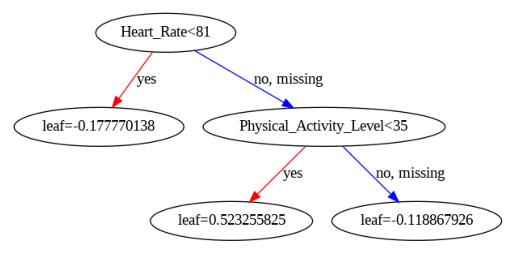

In [26]:
xgb.plot_tree(xgb_cl,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()


In [27]:
xgb.plot_tree(xgb_cl,num_trees=1)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [28]:
xgb.plot_tree(xgb_cl,num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

2.Fit a tree-based model and interpret the nodes

Ans: The plot below interprets all nodes (root, leaf, and intermediate) and displays the first tree plotted with the XGBoost algorithm. This figure shows how the model arrived at its final decisions and what splits it took to reach those results. As per the above plot, the root node is 'Stress_Level'. Node interpretability for first 3 trees is shown below.

# Using Auto ML to find the best model

In [29]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=94e84f6d277dea7869f2685183aaacb5cc08ff5c9c7dfcc7b3f6691e97f5229b
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [30]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [31]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [32]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [33]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:31087..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxs0_ty4c
  JVM stdout: /tmp/tmpxs0_ty4c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxs0_ty4c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:31087
Connecting to H2O server at http://127.0.0.1:31087 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    25 days
H2O_cluster_name:           H2O_from_python_unknownUser_005ris
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:31087
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [34]:
# Import the processed data from notebook One
#from google.colab import files
#file = files.upload()
url = "https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv"

df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [35]:
df.head()

Person ID  Gender      Age  Occupation              Sleep Duration    Quality of Sleep    Physical Activity Level    Stress Level  BMI Category    Blood Pressure      Heart Rate    Daily Steps  Sleep Disorder
-----------  --------  -----  --------------------  ----------------  ------------------  -------------------------  --------------  --------------  ----------------  ------------  -------------  ----------------
          1  Male         27  Software Engineer                  6.1                   6                         42               6  Overweight      126/83                      77           4200  None
          2  Male         28  Doctor                             6.2                   6                         60               8  Normal          125/80                      75          10000  None
          3  Male         28  Doctor                             6.2                   6                         60               8  Normal          125/80                      75          10000  None
          4  Male         28  Sales Representative               5.9                   4                         30               8  Obese           140/90                      85           3000  Sleep Apnea
          5  Male         28  Sales Representative               5.9                   4                         30               8  Obese           140/90                      85           3000  Sleep Apnea
          6  Male         28  Software Engineer                  5.9                   4                         30               8  Obese           140/90                      85           3000  Insomnia
          7  Male         29  Teacher                            6.3                   6                         40               7  Obese           140/90                      82           3500  Insomnia
          8  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
          9  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
         10  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
[10 rows x 13 columns]

In [36]:
df.types

{'Person ID': 'int',
 'Gender': 'enum',
 'Age': 'int',
 'Occupation': 'enum',
 'Sleep Duration': 'real',
 'Quality of Sleep': 'int',
 'Physical Activity Level': 'int',
 'Stress Level': 'int',
 'BMI Category': 'enum',
 'Blood Pressure': 'enum',
 'Heart Rate': 'int',
 'Daily Steps': 'int',
 'Sleep Disorder': 'enum'}

In [37]:
df['Quality of Sleep'] = df['Quality of Sleep'].asfactor()
print(df['Quality of Sleep'].isfactor())

[True]


In [38]:
df.describe()

Rows:374
Cols:13

Person ID           Gender    Age                Occupation            Sleep Duration      Quality of Sleep    Physical Activity Level    Stress Level        BMI Category    Blood Pressure    Heart Rate         Daily Steps         Sleep Disorder
-------  ------------------  --------  -----------------  --------------------  ------------------  ------------------  -------------------------  ------------------  --------------  ----------------  -----------------  ------------------  ----------------
type     int                 enum      int                enum                  real                enum                int                        int                 enum            enum              int                int                 enum
mins     1.0                           27.0                                     5.8                                     30.0                       3.0                                                   65.0               3000.0
mean     187.5                         42.18449197860964                        7.132085561497326                       59.171122994652364         5.385026737967922                                     70.16577540106957  6816.844919786094
maxs     374.0                         59.0                                     8.5                                     90.0                       8.0                                                   86.0               10000.0
sigma    108.10874155219827            8.673133465547242                        0.7956567308898186                      20.830803658071662         1.7745264441985202                                    4.135675535112212  1617.9156791336366
zeros    0                             0                                        0                                       0                          0                                                     0                  0
missing  0                   0         0                  0                     0                   0                   0                          0                   0               0                 0                  0                   0
0        1.0                 Male      27.0               Software Engineer     6.1                 6                   42.0                       6.0                 Overweight      126/83            77.0               4200.0              None
1        2.0                 Male      28.0               Doctor                6.2                 6                   60.0                       8.0                 Normal          125/80            75.0               10000.0             None
2        3.0                 Male      28.0               Doctor                6.2                 6                   60.0                       8.0                 Normal          125/80            75.0               10000.0             None
3        4.0                 Male      28.0               Sales Representative  5.9                 4                   30.0                       8.0                 Obese           140/90            85.0               3000.0              Sleep Apnea
4        5.0                 Male      28.0               Sales Representative  5.9                 4                   30.0                       8.0                 Obese           140/90            85.0               3000.0              Sleep Apnea
5        6.0                 Male      28.0               Software Engineer     5.9                 4                   30.0                       8.0                 Obese           140/90            85.0               3000.0              Insomnia
6        7.0                 Male      29.0               Teacher               6.3                 6                   40.0                       7.0                 Obese           140/90            82.0               3500.0              Insomnia
7        8.0                 Male      29.0               Doctor                7.8                 7                  

In [39]:
df.shape

(374, 13)

In [40]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [41]:
print(df_train.shape)
print(df_test.shape)

(300, 13)
(74, 13)


In [42]:
df_train.head()

Person ID  Gender      Age  Occupation              Sleep Duration    Quality of Sleep    Physical Activity Level    Stress Level  BMI Category    Blood Pressure      Heart Rate    Daily Steps  Sleep Disorder
-----------  --------  -----  --------------------  ----------------  ------------------  -------------------------  --------------  --------------  ----------------  ------------  -------------  ----------------
          1  Male         27  Software Engineer                  6.1                   6                         42               6  Overweight      126/83                      77           4200  None
          2  Male         28  Doctor                             6.2                   6                         60               8  Normal          125/80                      75          10000  None
          3  Male         28  Doctor                             6.2                   6                         60               8  Normal          125/80                      75          10000  None
          4  Male         28  Sales Representative               5.9                   4                         30               8  Obese           140/90                      85           3000  Sleep Apnea
          6  Male         28  Software Engineer                  5.9                   4                         30               8  Obese           140/90                      85           3000  Insomnia
          7  Male         29  Teacher                            6.3                   6                         40               7  Obese           140/90                      82           3500  Insomnia
          8  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
          9  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
         10  Male         29  Doctor                             7.8                   7                         75               6  Normal          120/80                      70           8000  None
         11  Male         29  Doctor                             6.1                   6                         30               8  Normal          120/80                      70           8000  None
[10 rows x 13 columns]

In [43]:
# Set the features and target
X=df.columns
print(X)

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [44]:
# Set target and predictor variables
y ='Quality of Sleep'
#y_numeric ='churn_bit'
X.remove(y)
#X.remove(y_numeric)
print(X)

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [45]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [46]:
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |████
01:57:43.641: GLM_1_AutoML_1_20231204_15729 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 50 out of bounds for length 50

███████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231204_15729_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    78                 468                         62980                  1            3            2.98932       2             8             6.05769

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 5.918035291394445e-07
RMSE: 0.0007692876764510429
LogLoss: 0.00031223264832588426
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
4    5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  ---  -------  -------
3    0    0    0    0    0    0        0 / 3
0    5    0    0    0    0    0        0 / 5
0    0    85   0    0    0    0        0 / 85
0    0    0    65   0    0    0        0 / 65
0    0    0    0    85   0    0        0 / 85
0    0    0    0    0    57   0        0 / 57
3    5    85   65   85   57   0        0 / 300

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.016339285949636934
RMSE: 0.1278252164075498
LogLoss: 0.058168891849866025
Mean Per-Class Error: 0.06460532931121166
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
4    5    6    7    8    9    Error      Rate
---  ---  ---  ---  ---  ---  ---------  -------
2    0    1    0    0    0    0.333333   1 / 3
0    5    0    0    0    0    0          0 / 5
1    0    83   1    0    0    0.0235294  2 / 85
0    0    1    63   1    0    0.0307692  2 / 65
0    0    0    0    85   0    0          0 / 85
0    0    0    0    0    57   0          0 / 57
3    5    85   64   86   57   0.0166667  5 / 300

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.983333
2    0.993333
3    0.993333
4    1
5    1
6    1

Cross-Validation Metrics Summary: 
                         mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.976667   0.0278887  0.966667      0.983333      1             1             0.933333
auc                      nan        0          nan           nan           nan           nan           nan
err                      0.0233333  0.0278887  0.0333333     0.0166667     0             0             0.0666667
err_count                1.4        1.67332    2             1             0             0             4
logloss                  0.0602105  0.0774677  0.0383017     0.0578        0.000362738   0.0117529     0.192835
max_per_class_error      0.229167   0.432511   0.0833333     0.0625        0             0             1
mean_per_class_accuracy  0.955289   0.0820182  0.977339      0.989583      1             1             0.809524
mean_per_class_error     0.0447107  0.0820182  0.0226608     0.0104167     0             0             0.190476
mse

In [47]:
print(aml.leaderboard)

model_id                                      mean_per_class_error    logloss      rmse        mse
GBM_grid_1_AutoML_1_20231204_15729_model_7               0.0646053  0.0581689  0.127825  0.0163393
DRF_1_AutoML_1_20231204_15729                            0.0671694  0.0696486  0.138729  0.0192458
XRT_1_AutoML_1_20231204_15729                            0.0979387  0.176025   0.196479  0.0386041
GBM_grid_1_AutoML_1_20231204_15729_model_4               0.120764   0.0551201  0.125147  0.0156618
GBM_grid_1_AutoML_1_20231204_15729_model_1               0.122122   0.0571515  0.133166  0.0177331
GBM_2_AutoML_1_20231204_15729                            0.122725   0.0689345  0.145427  0.0211491
GBM_4_AutoML_1_20231204_15729                            0.122725   0.0638924  0.138406  0.0191563
GBM_grid_1_AutoML_1_20231204_15729_model_2               0.124686   0.0749139  0.144725  0.0209454
GBM_grid_1_AutoML_1_20231204_15729_model_5               0.124686   0.0813909  0.146976  0.0216019
GBM_5_Auto

In [48]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict


{'GBM_grid_1_AutoML_1_20231204_15729_model_7': 0}

In [49]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [50]:
best_model.algo

'gbm'

3. Use auto ml to find the best model

Ans: Using AutoML, we have conclude'GBM' as the best model to determine the quality of sleep. By referring the below variable importance and shap summary plots, we can say that 'Sleep_Duration' is the most important and dominant feature in the model to predict target variable. Where as, the least important features are 'BMI Category' and 'GENDER' according to variable importance and shap summary plots respectively.

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20231204_15729_model_7

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
4    5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  ---  -------  -------
3    0    0    0    0    0    0        0 / 3
0    5    0    0    0    0    0        0 / 5
0    0    85   0    0    0    0        0 / 85
0    0    0    65   0    0    0        0 / 65
0    0    0    0    85   0    0        0 / 85
0    0    0    0    0    57   0        0 / 57
3    5    85   65   85   57   0        0 / 300

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

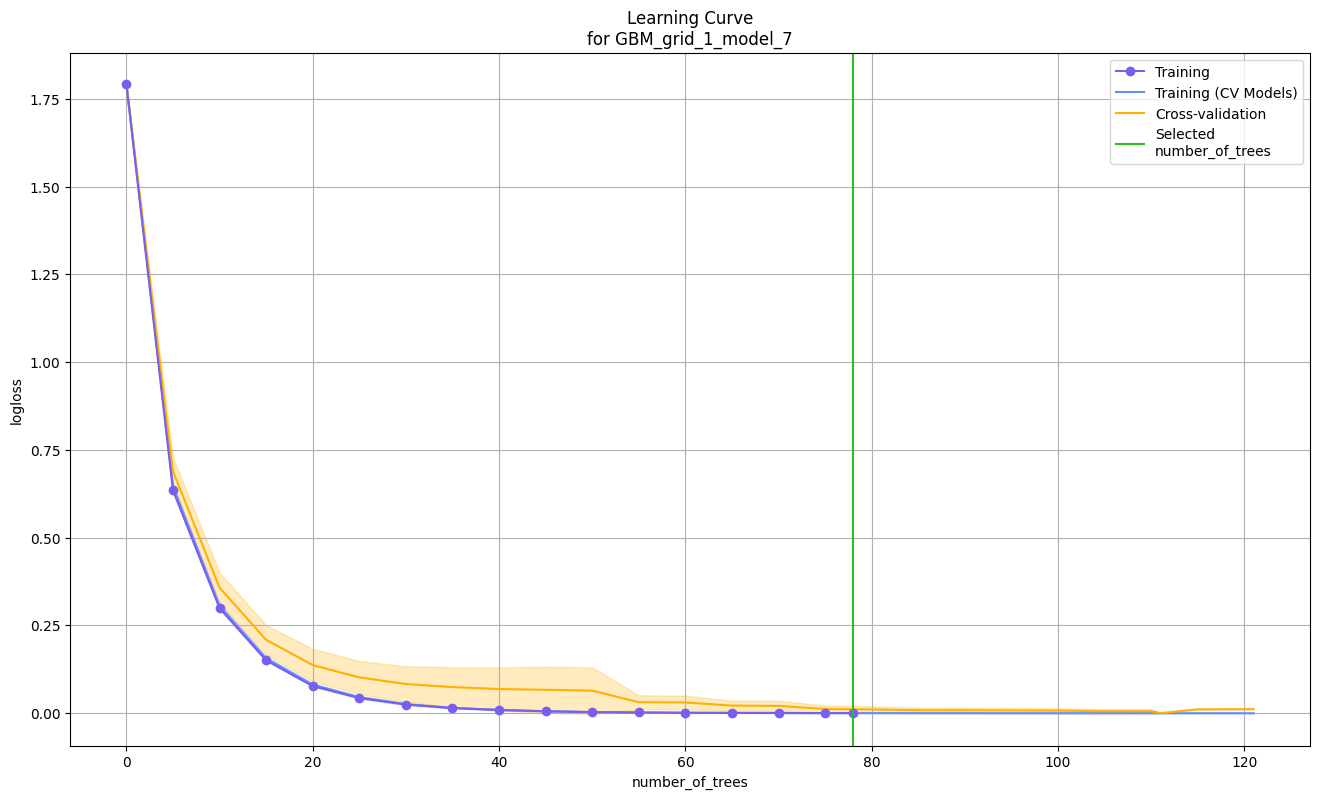

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

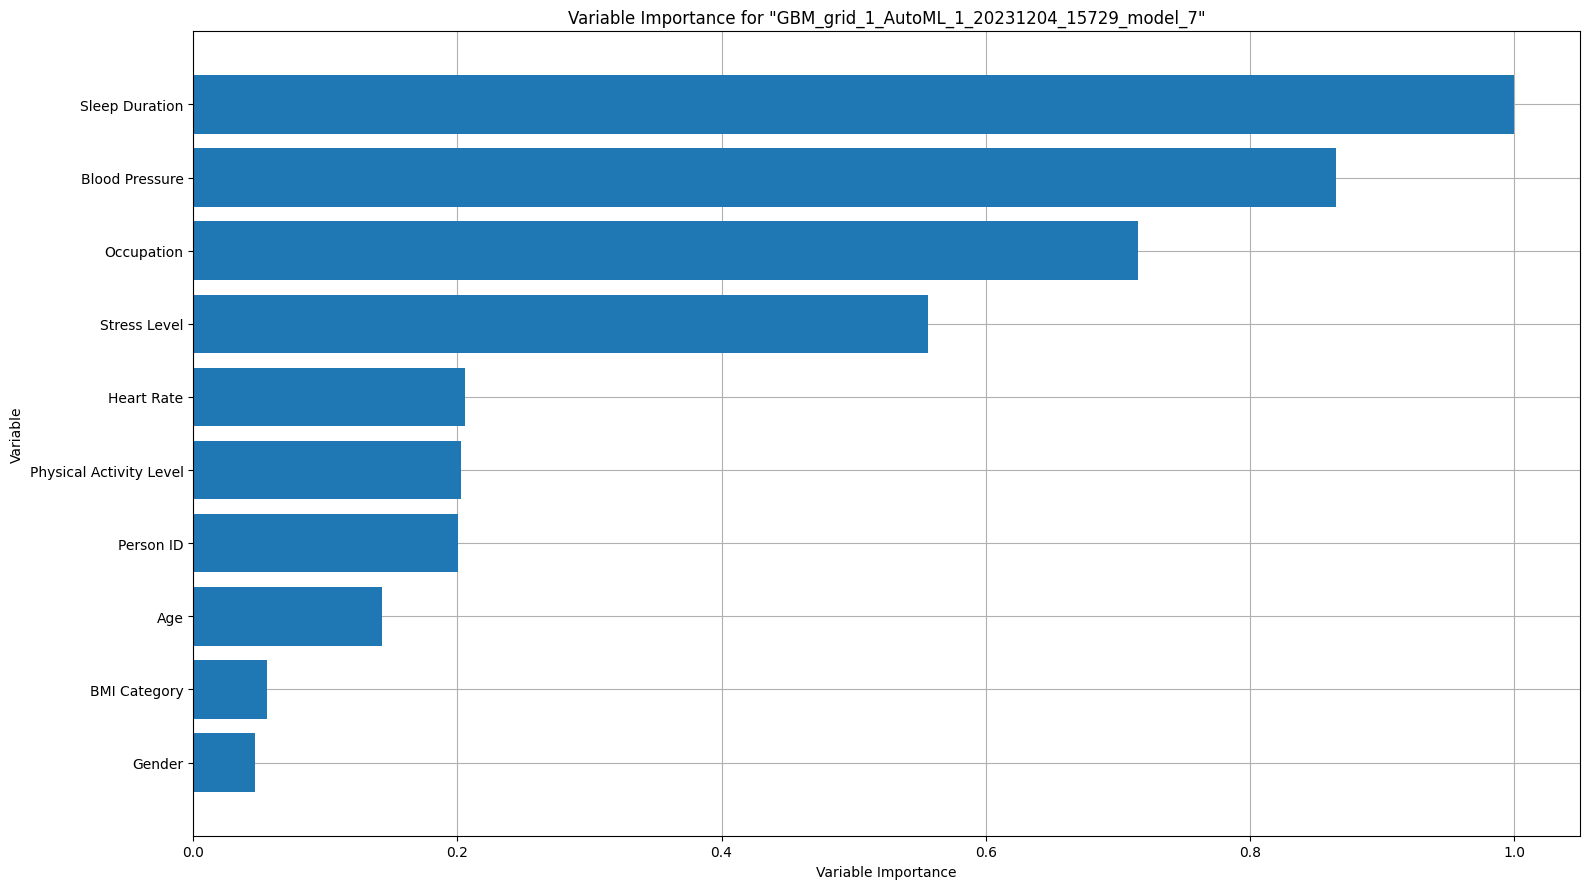

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

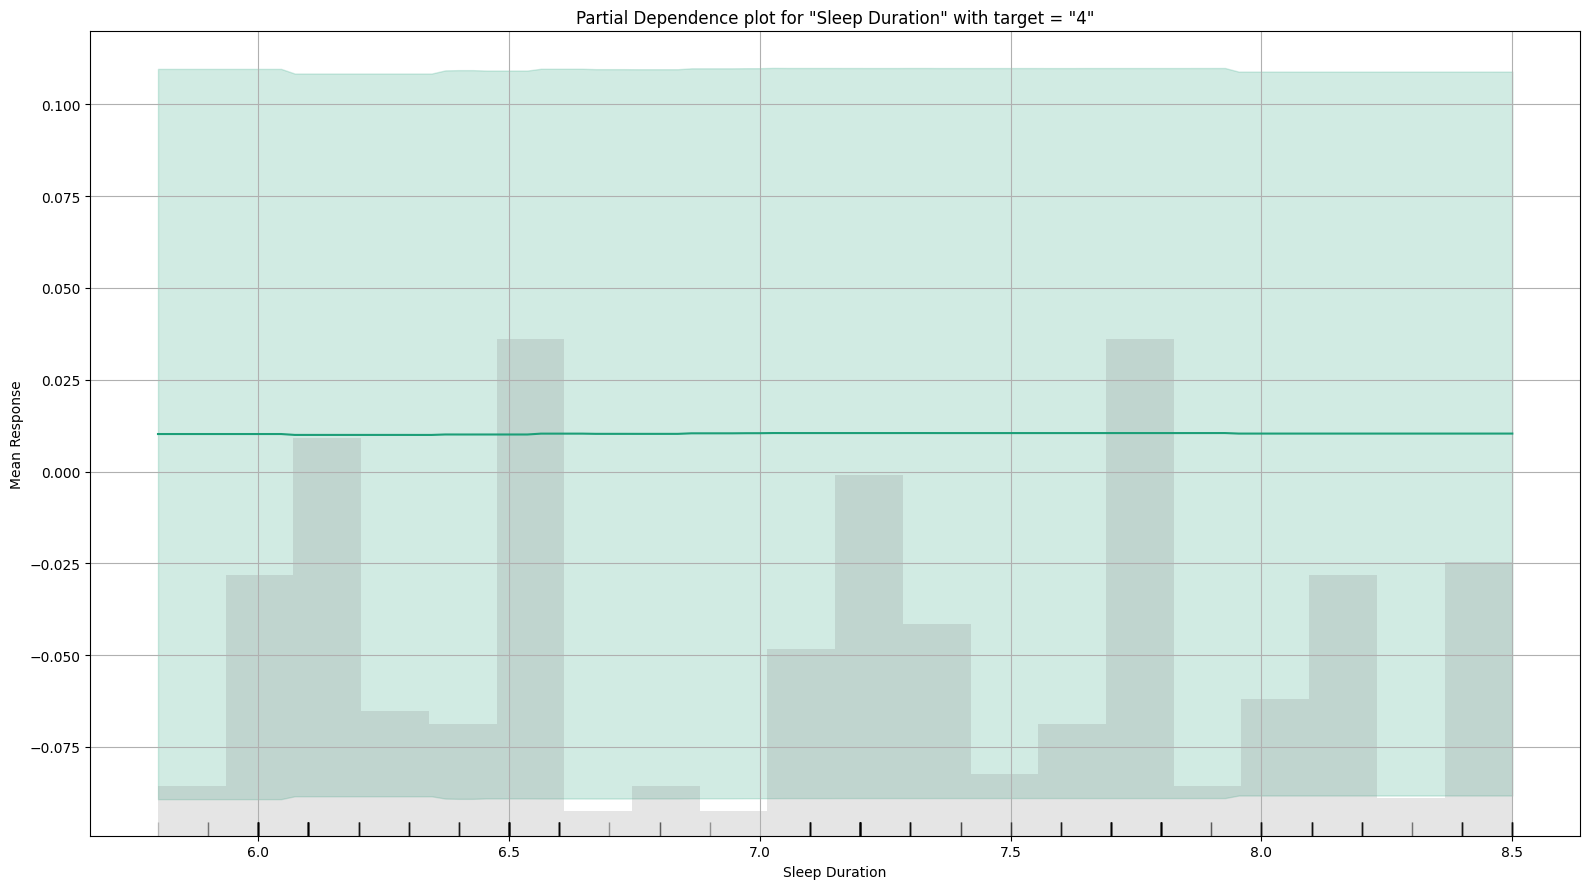

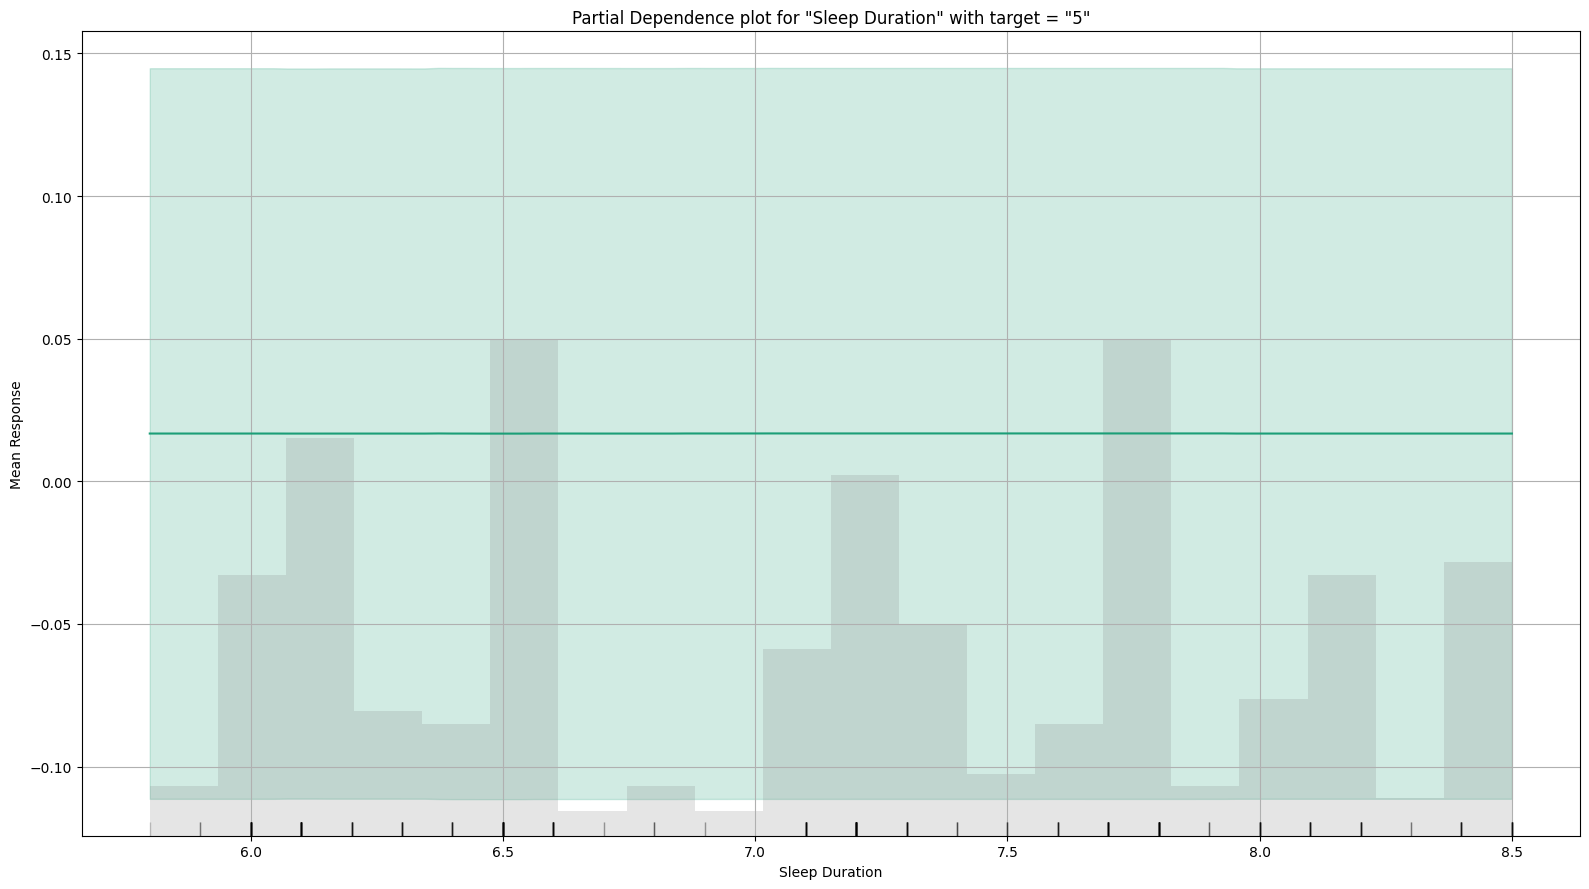

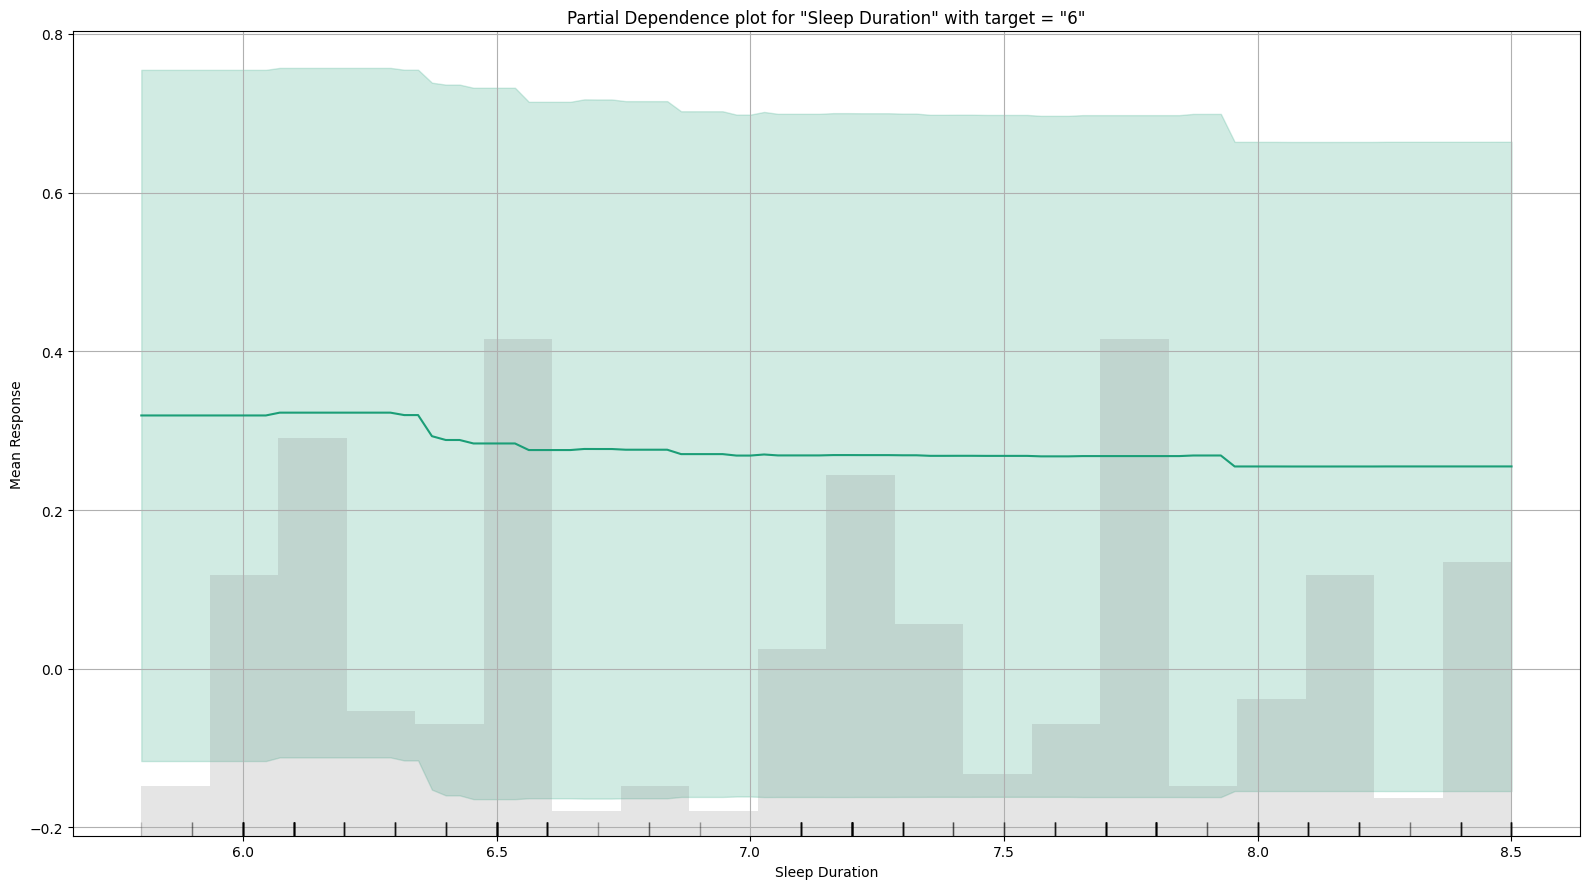

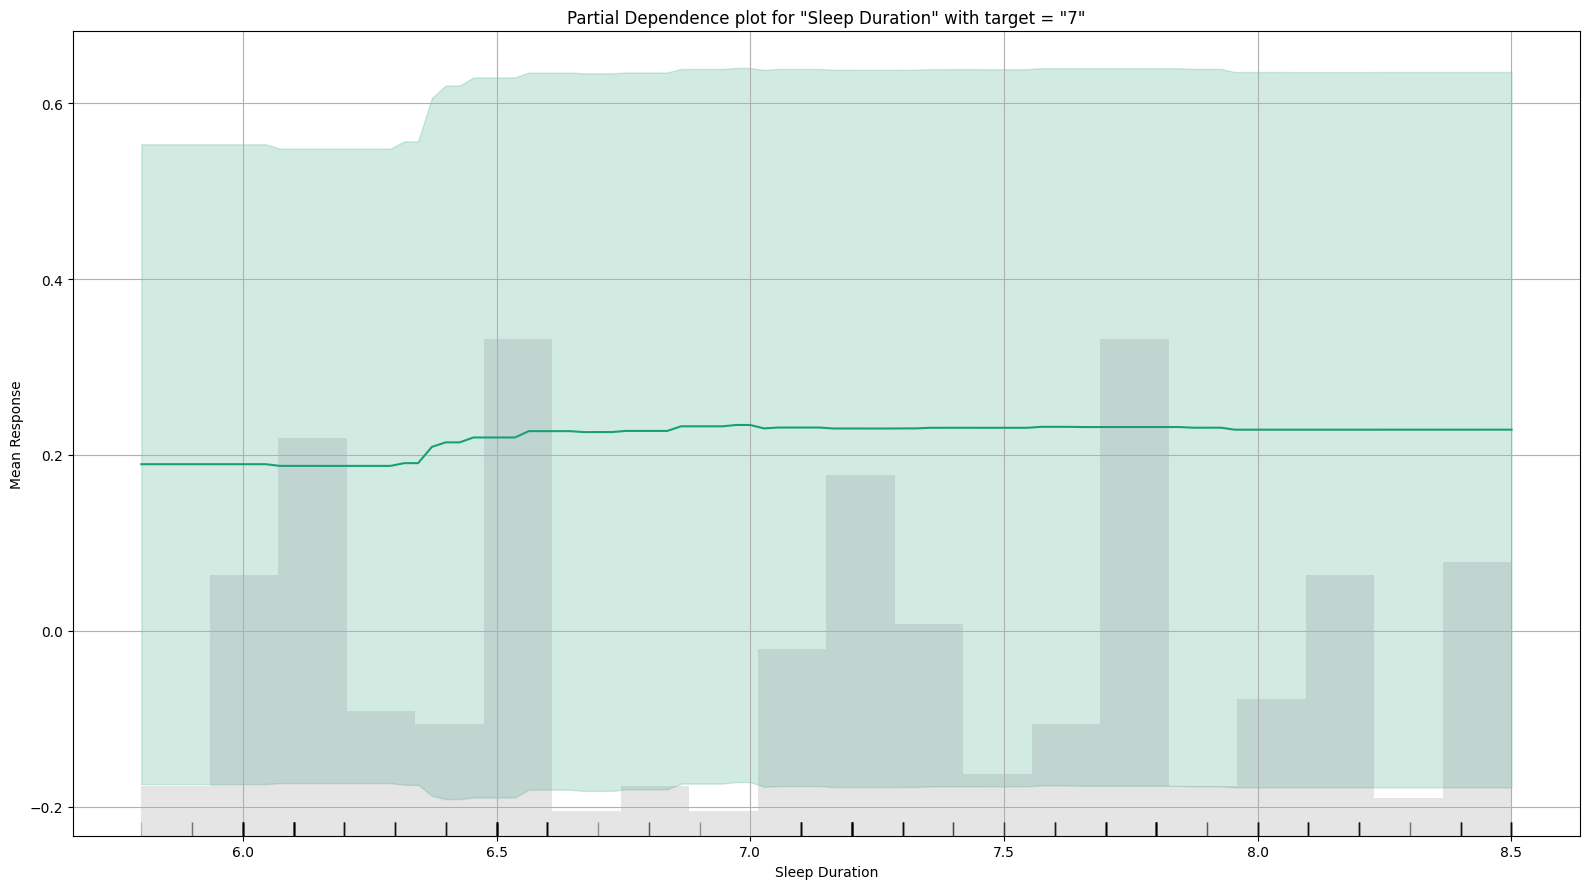

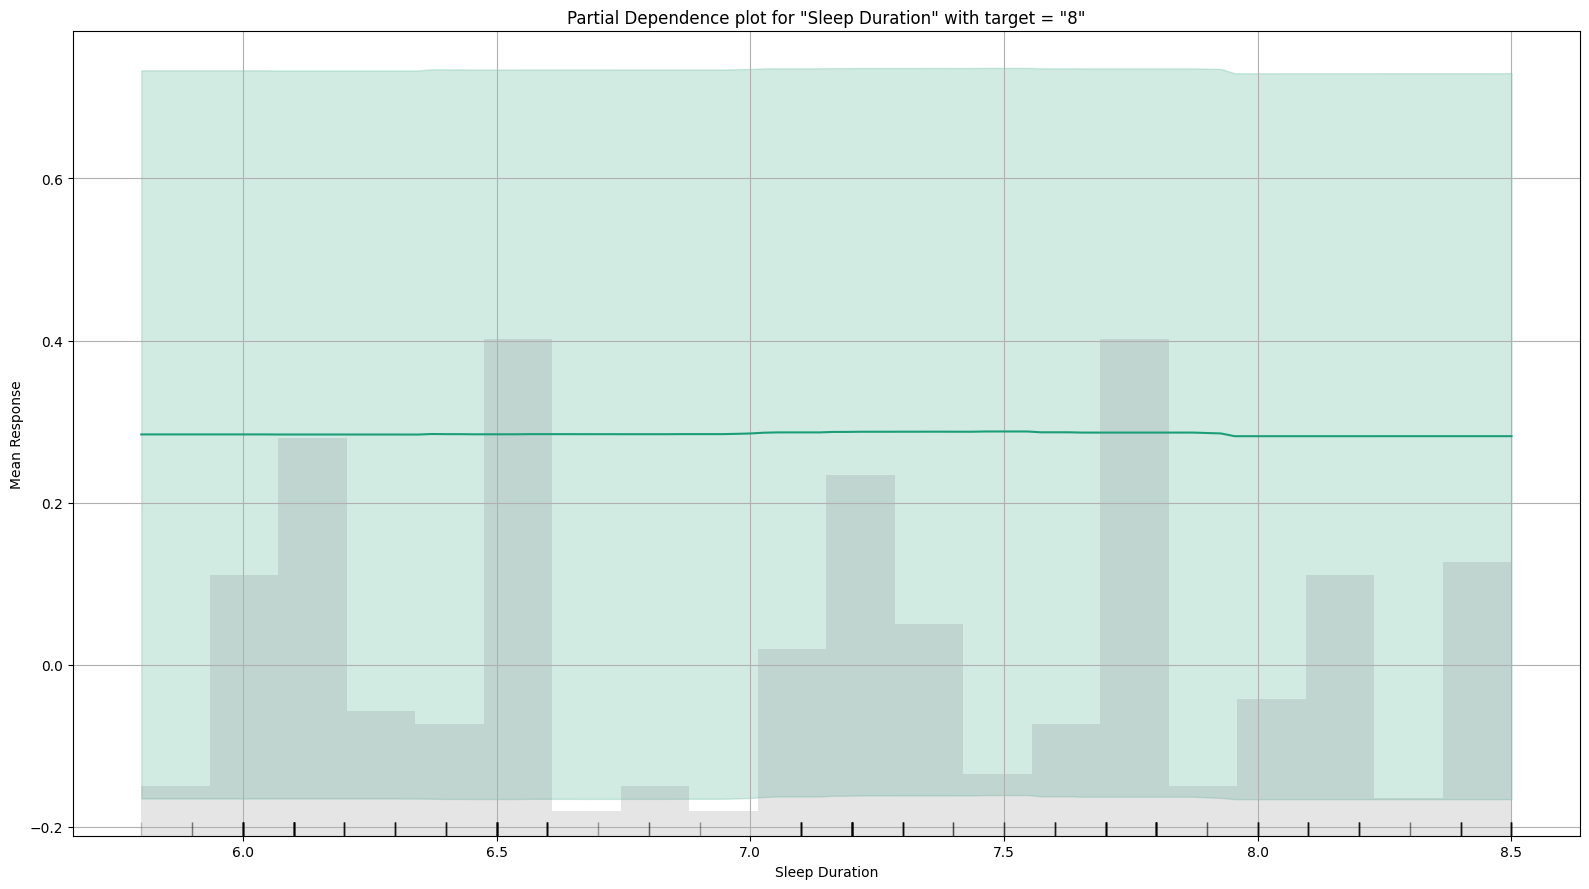

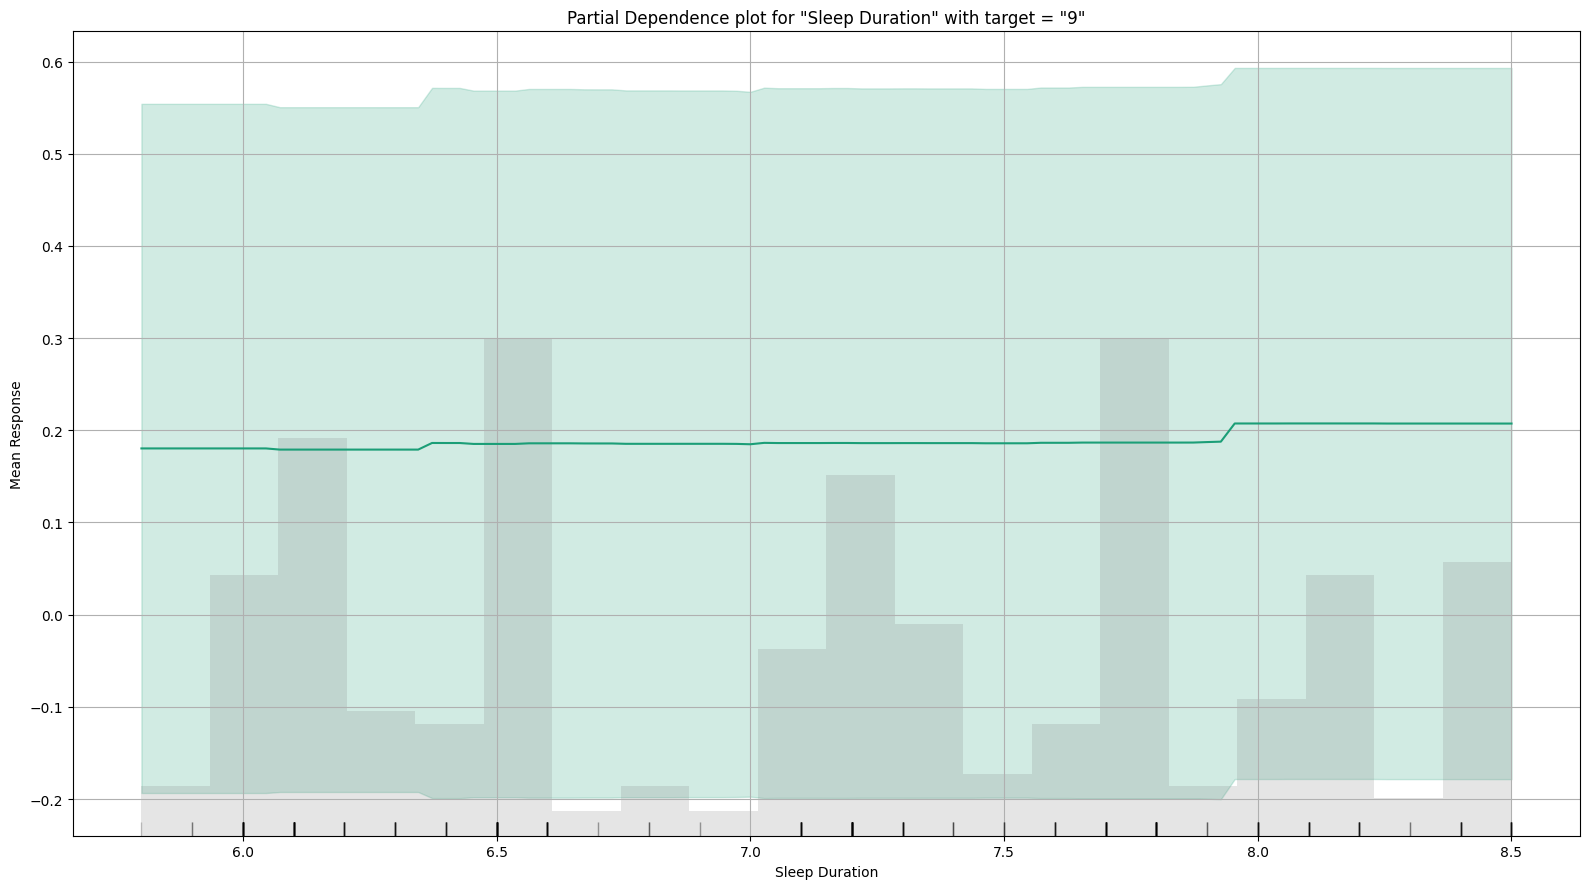

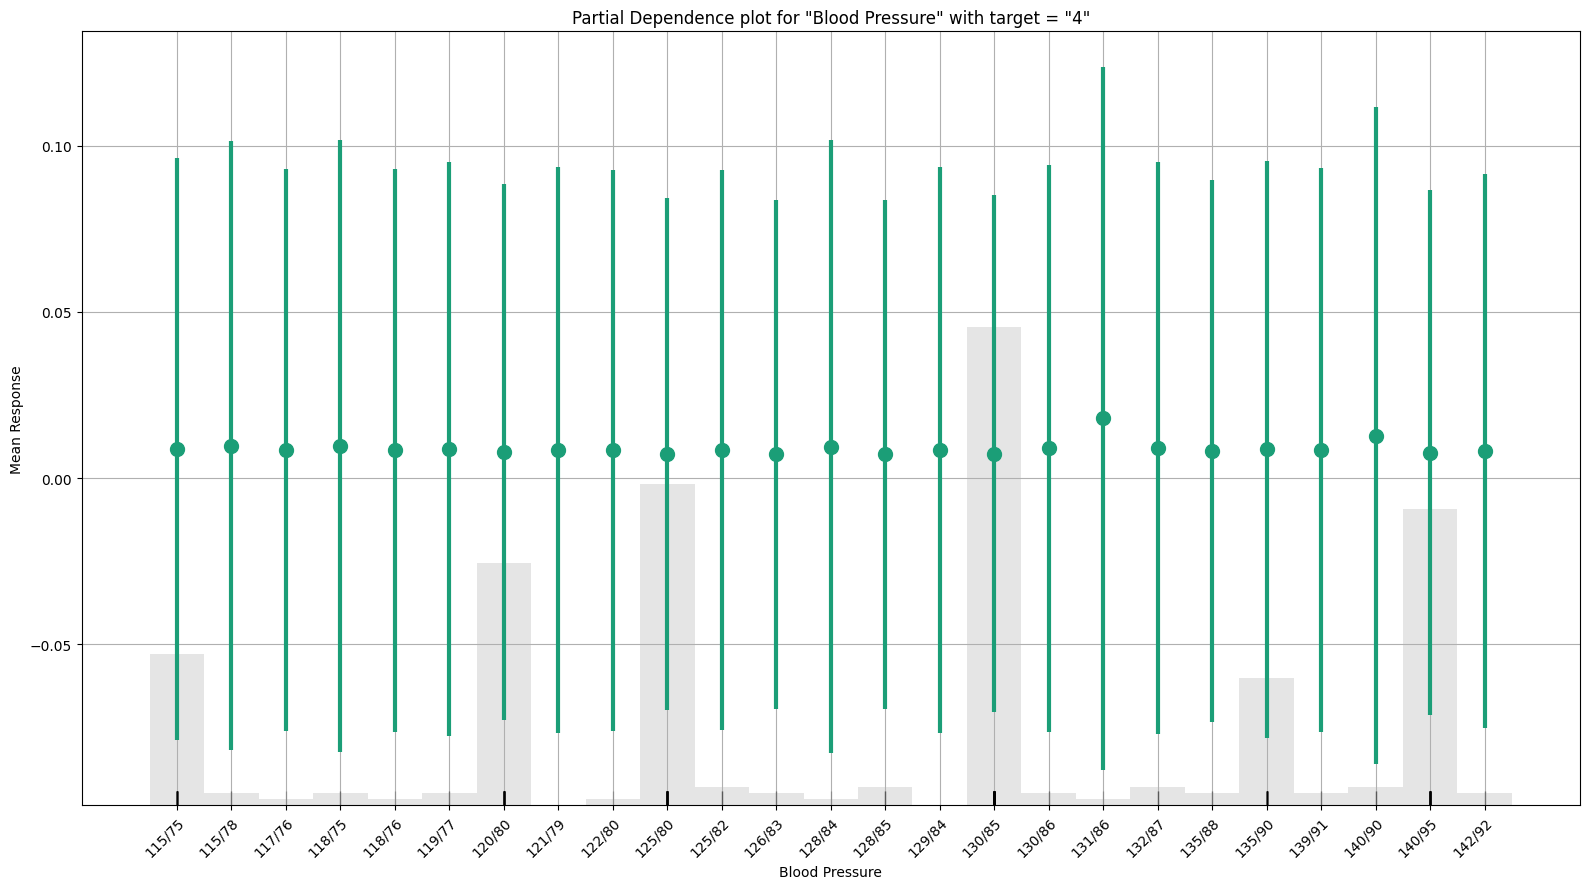

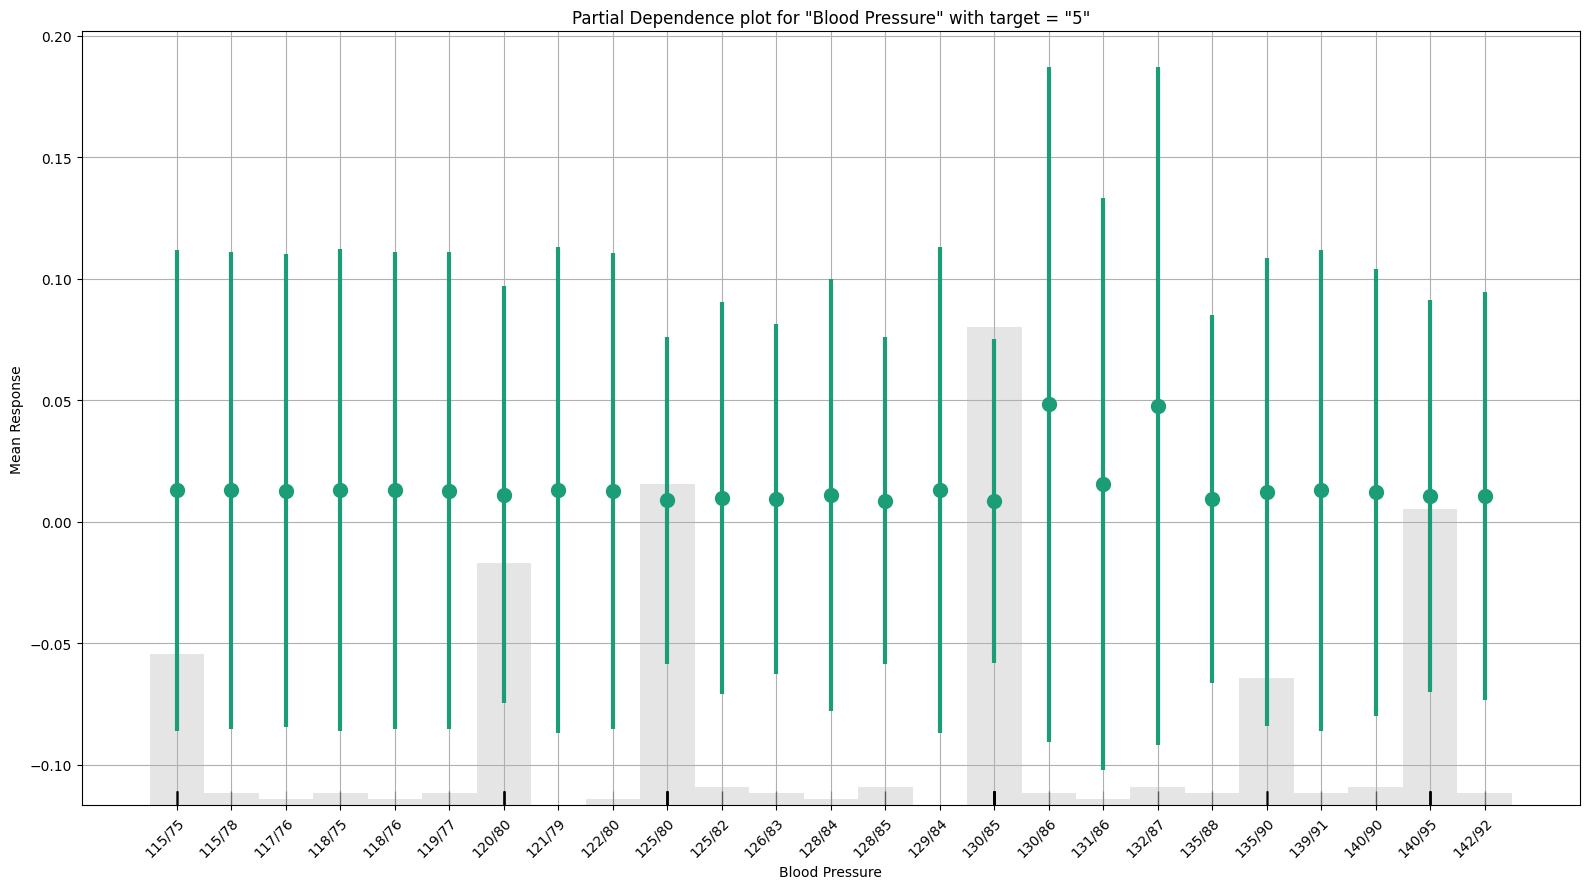

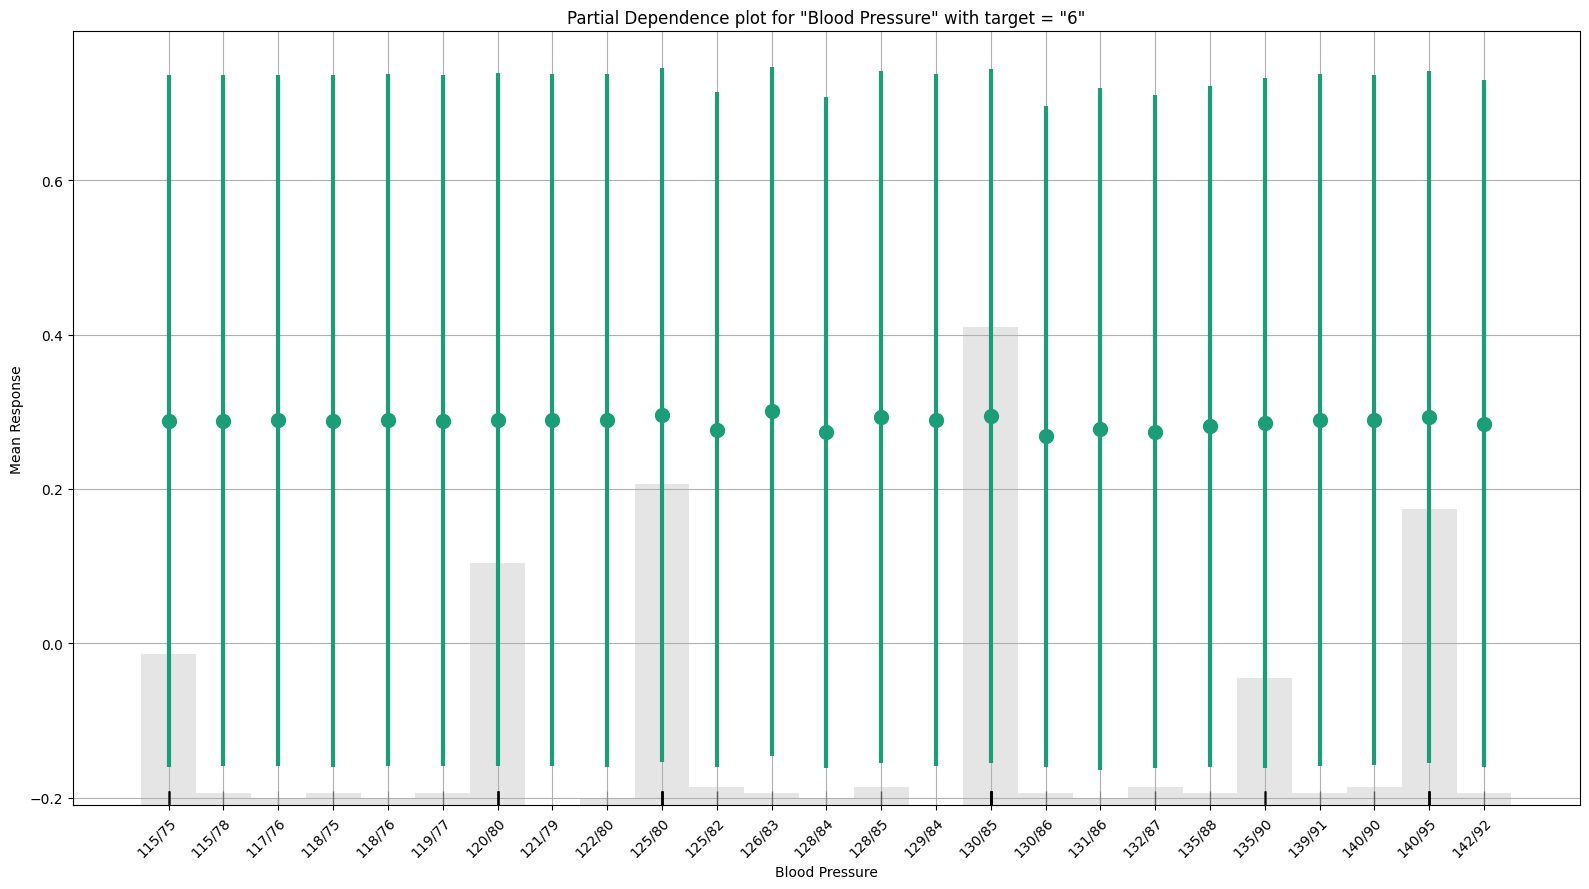

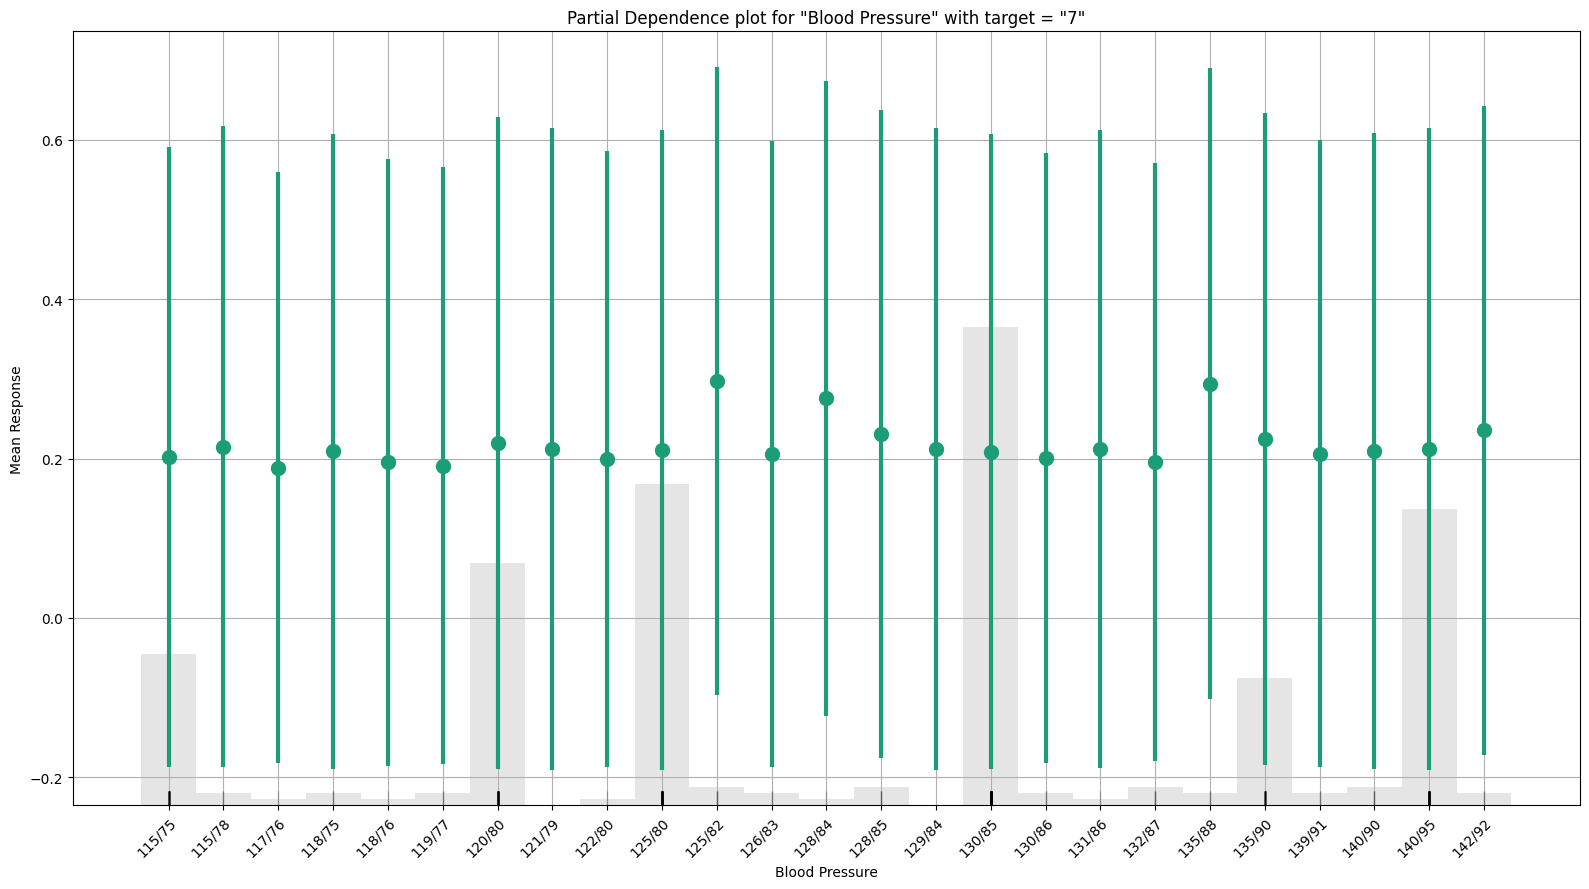

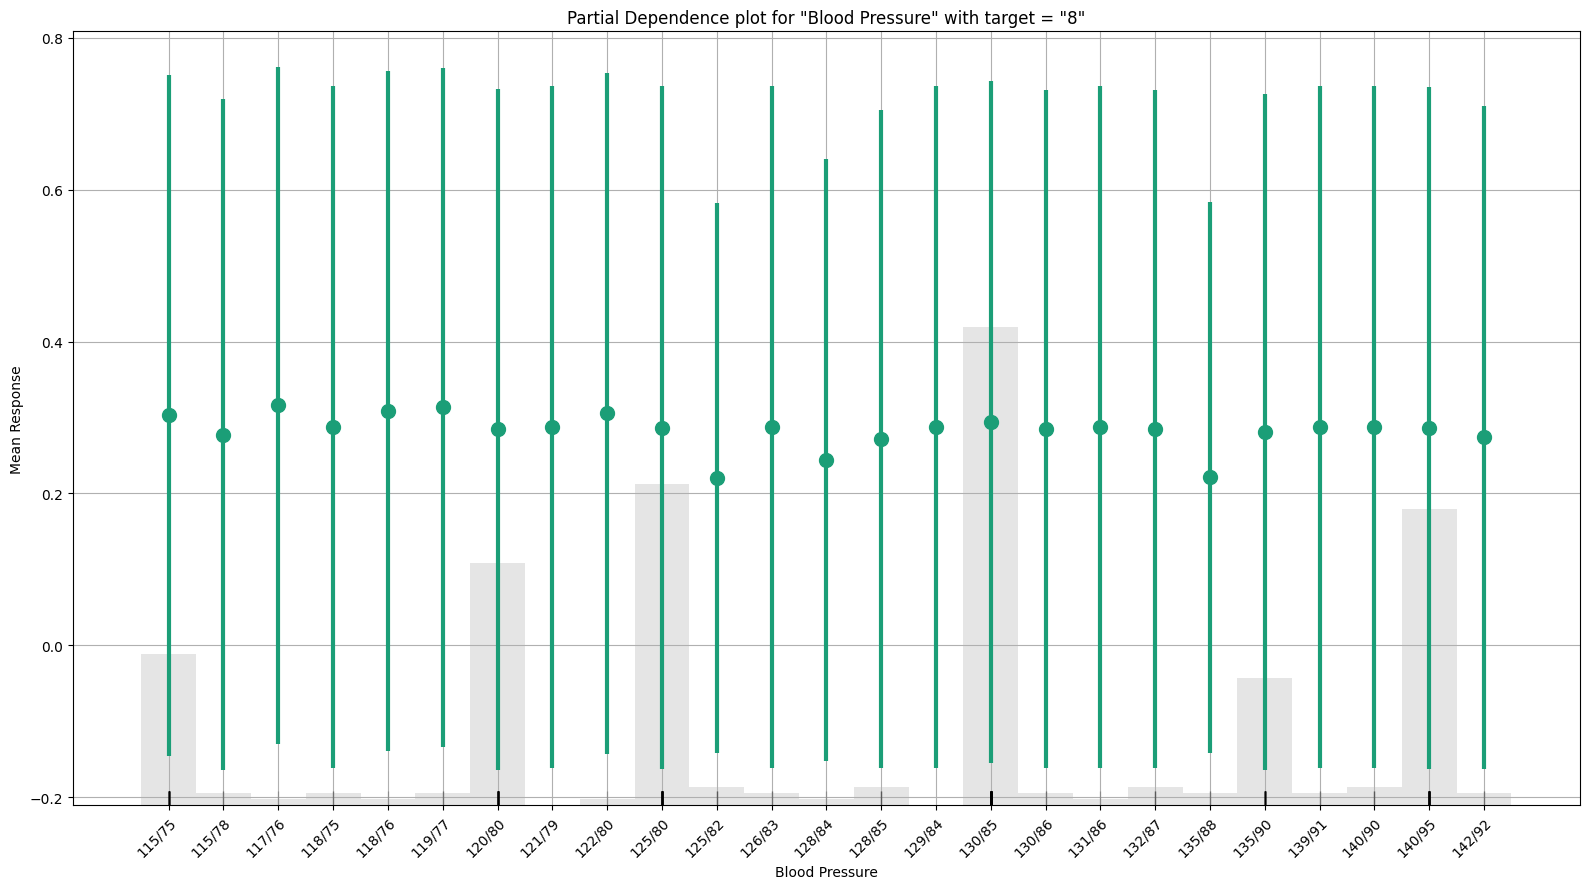

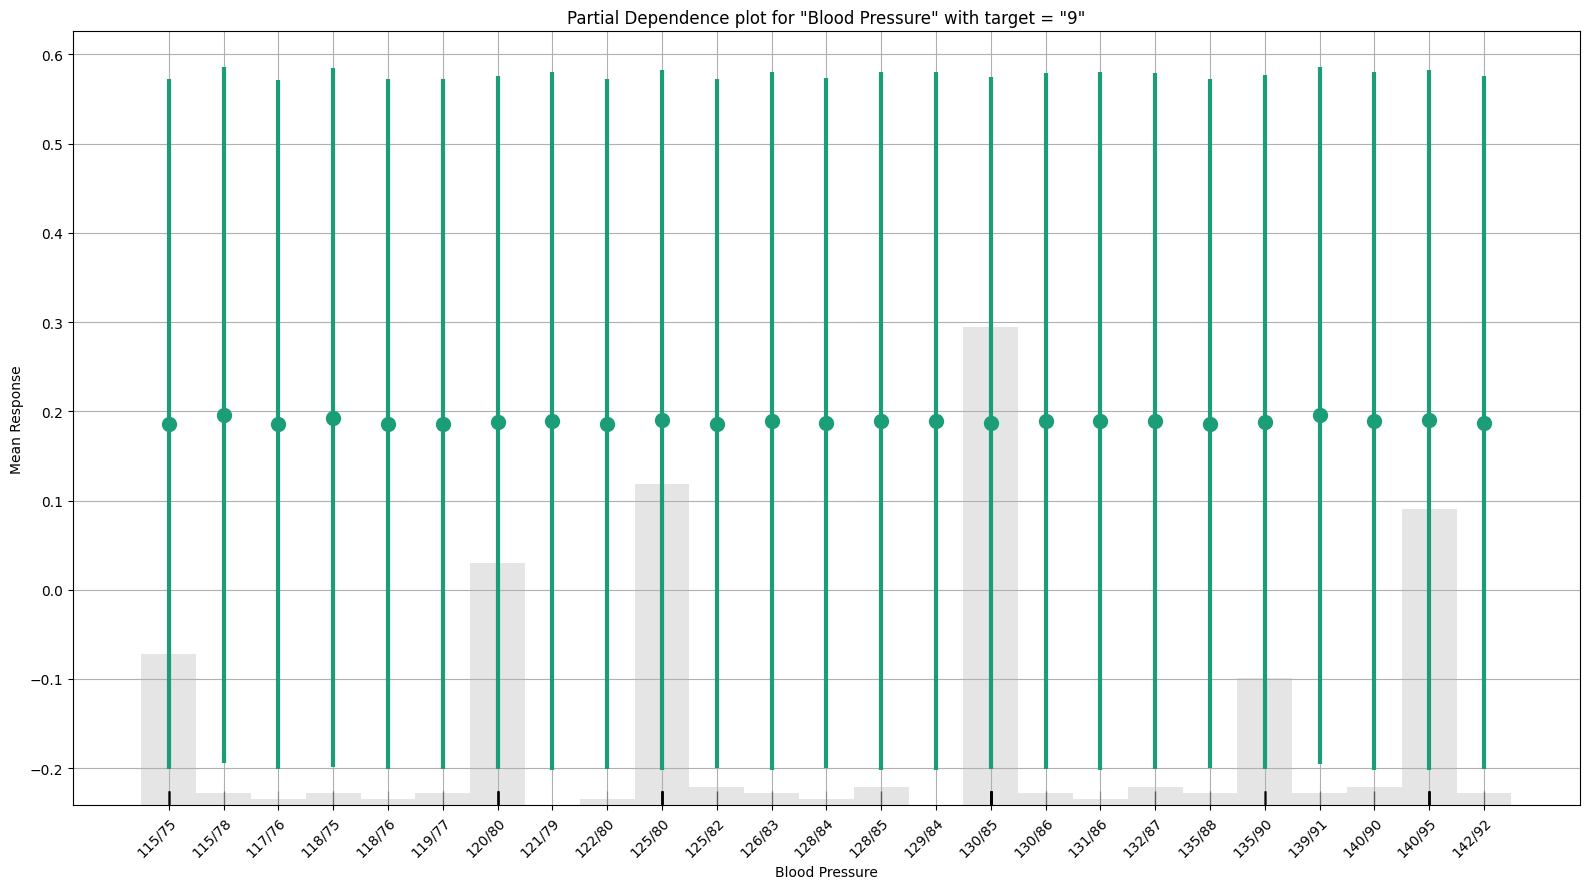

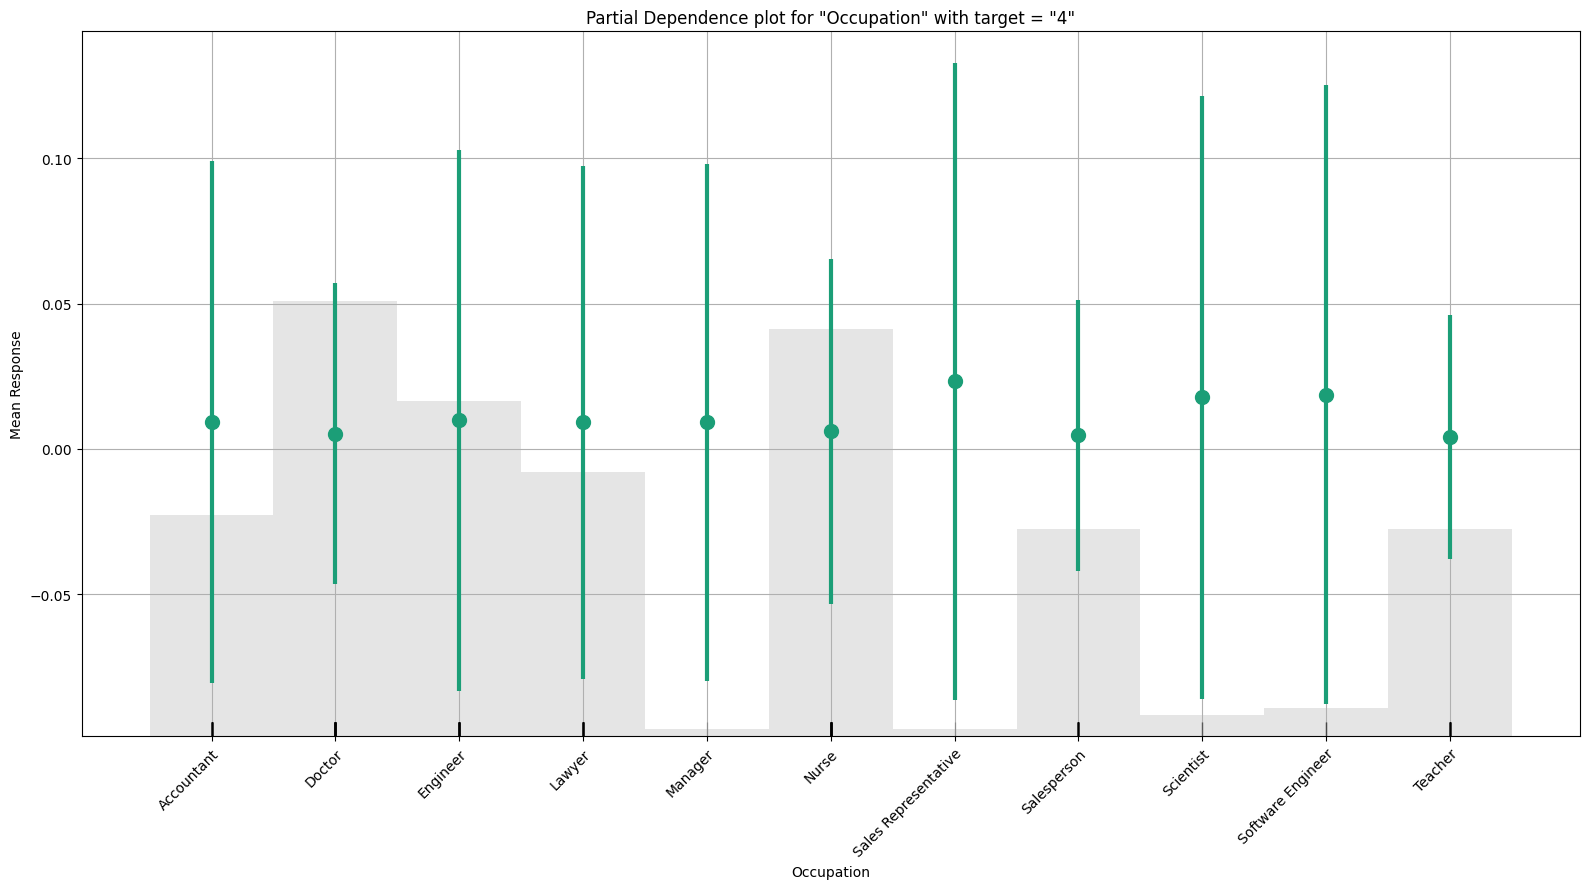

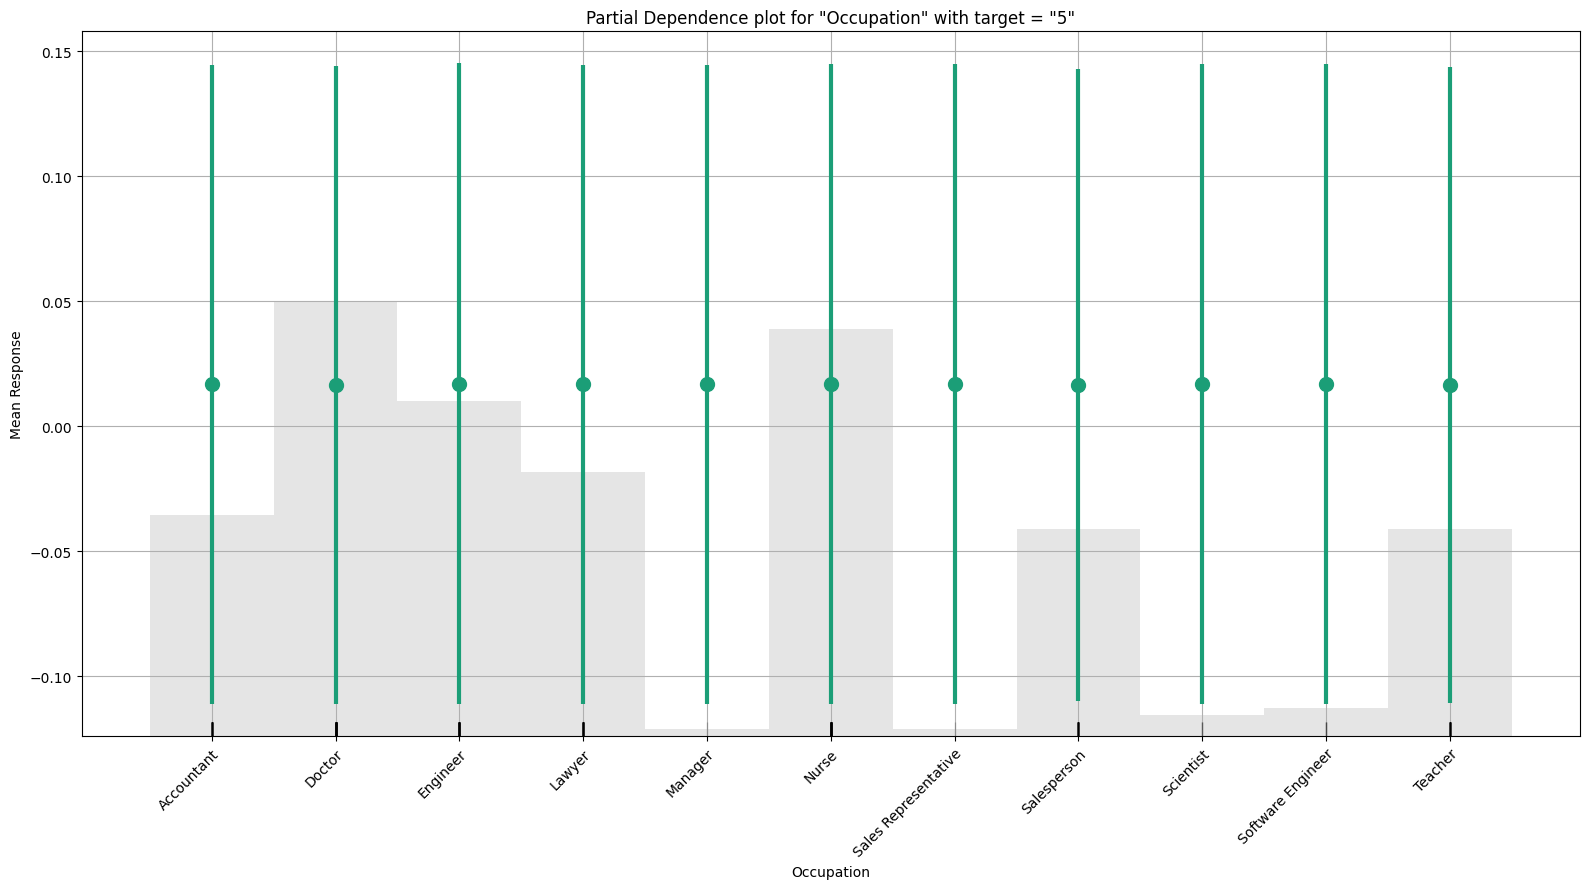

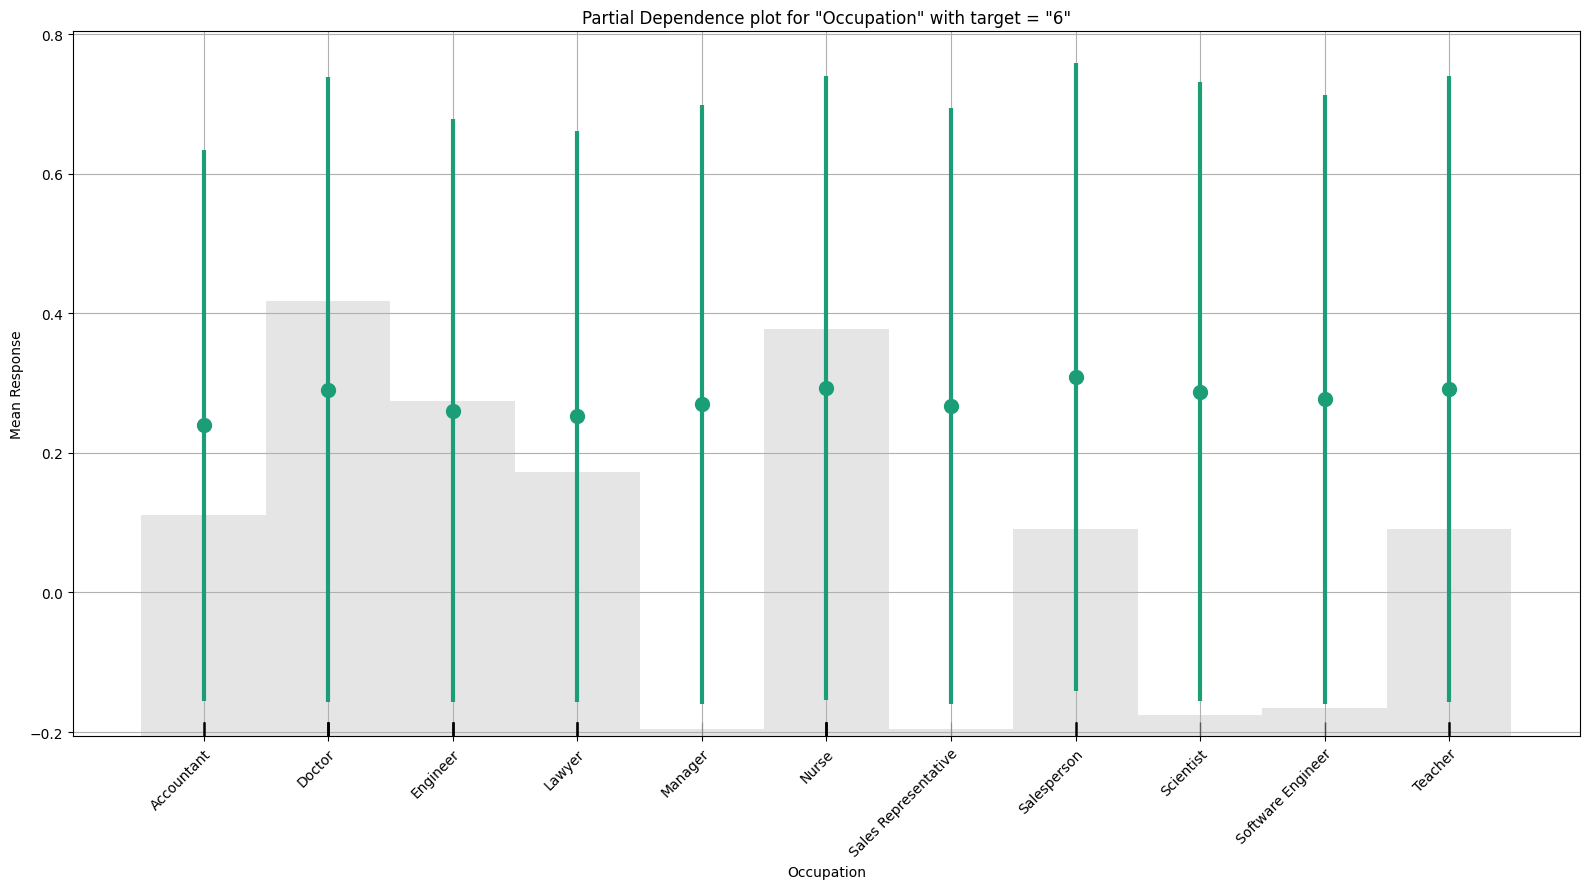

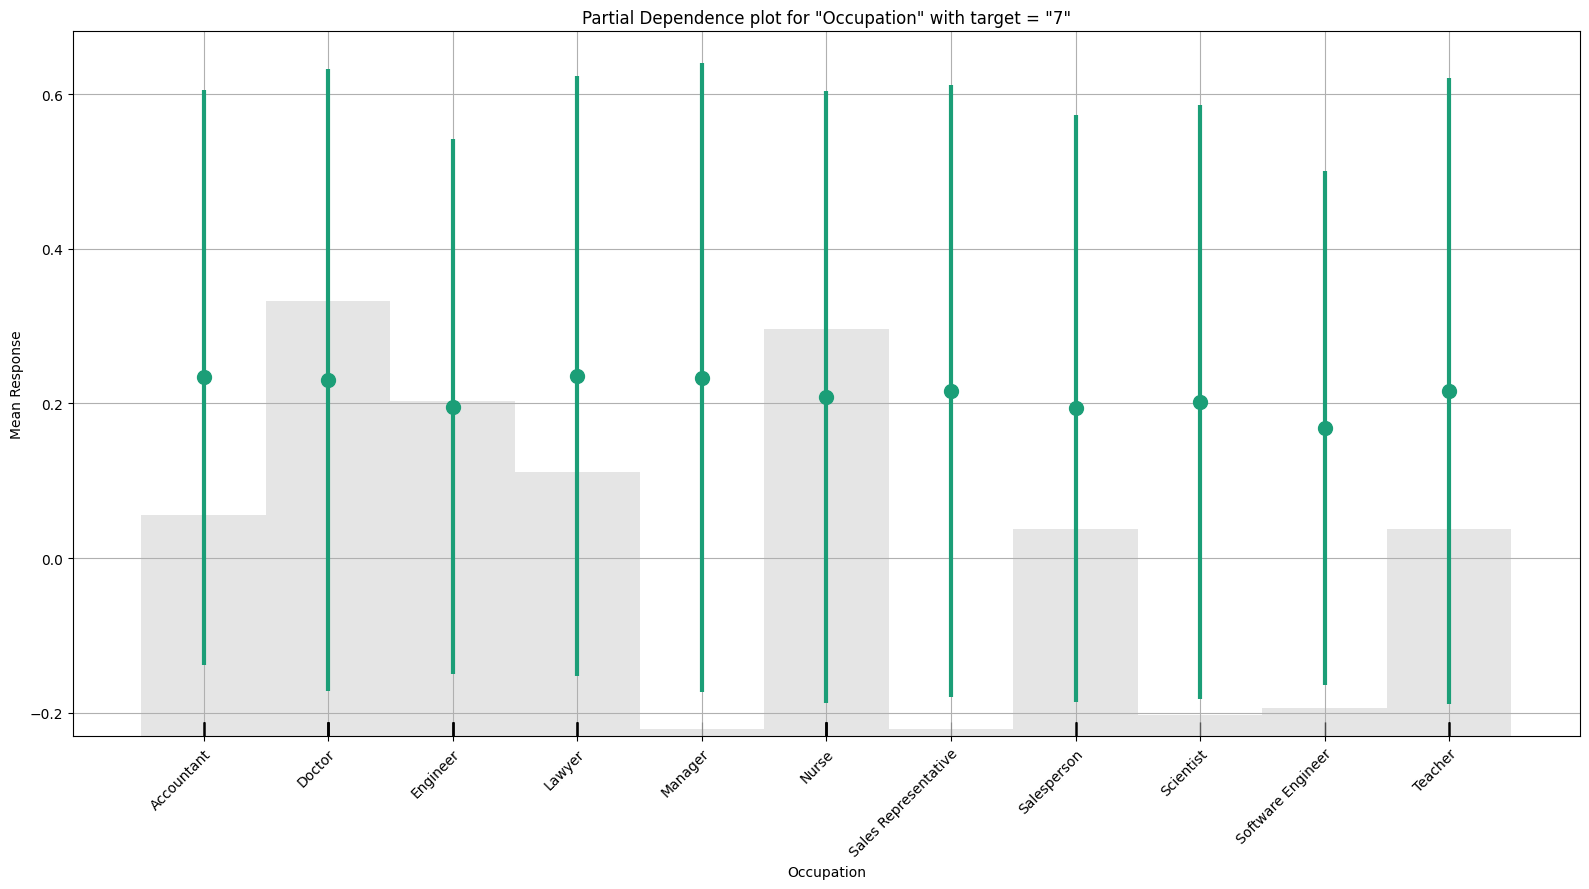

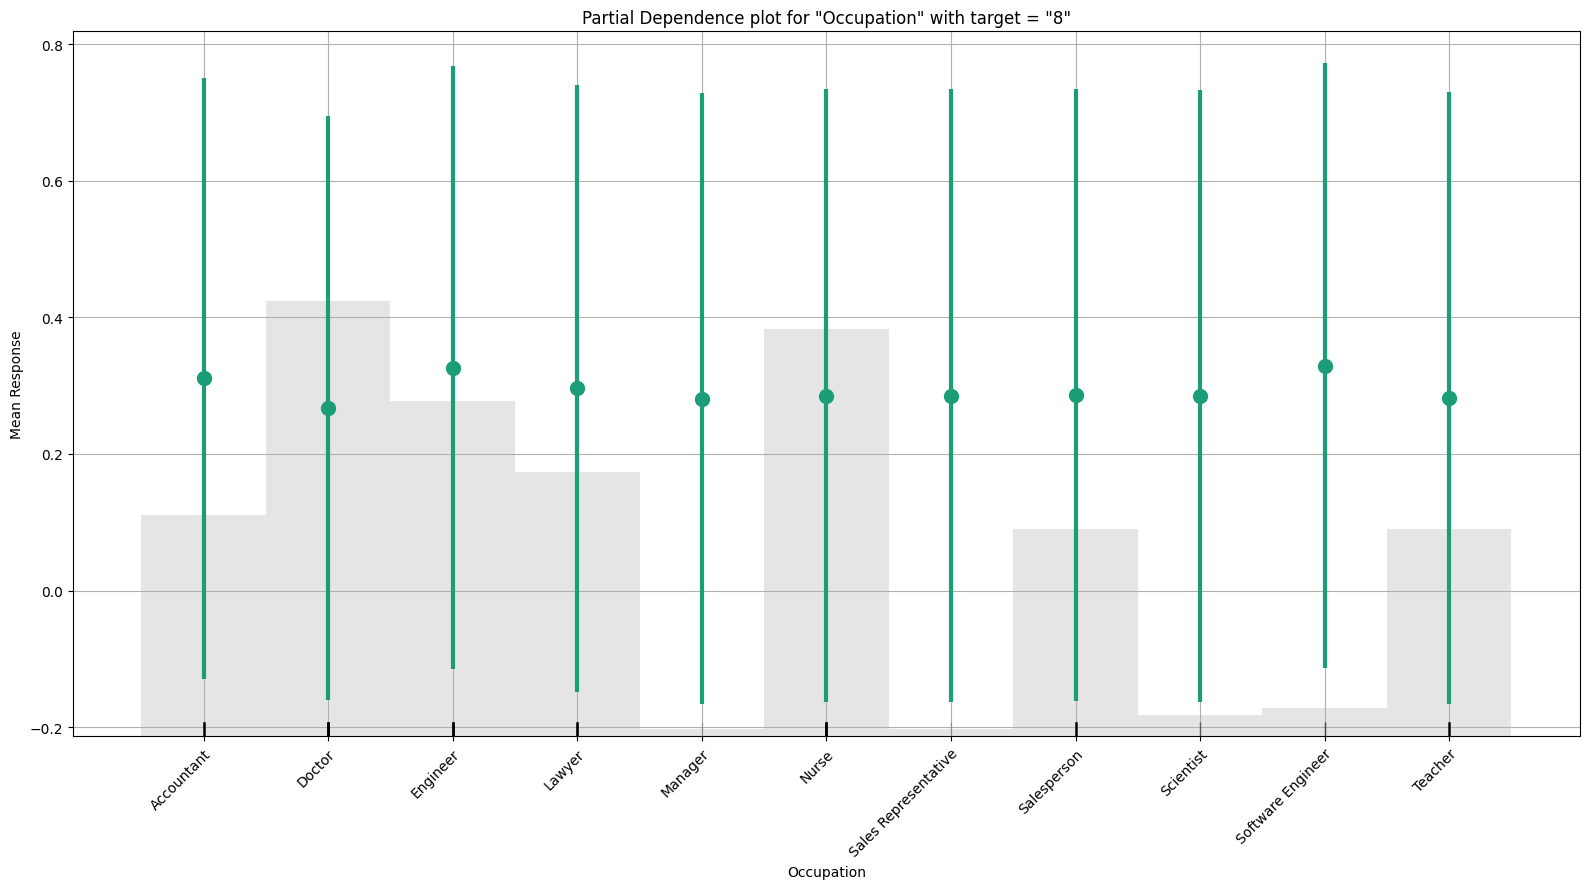

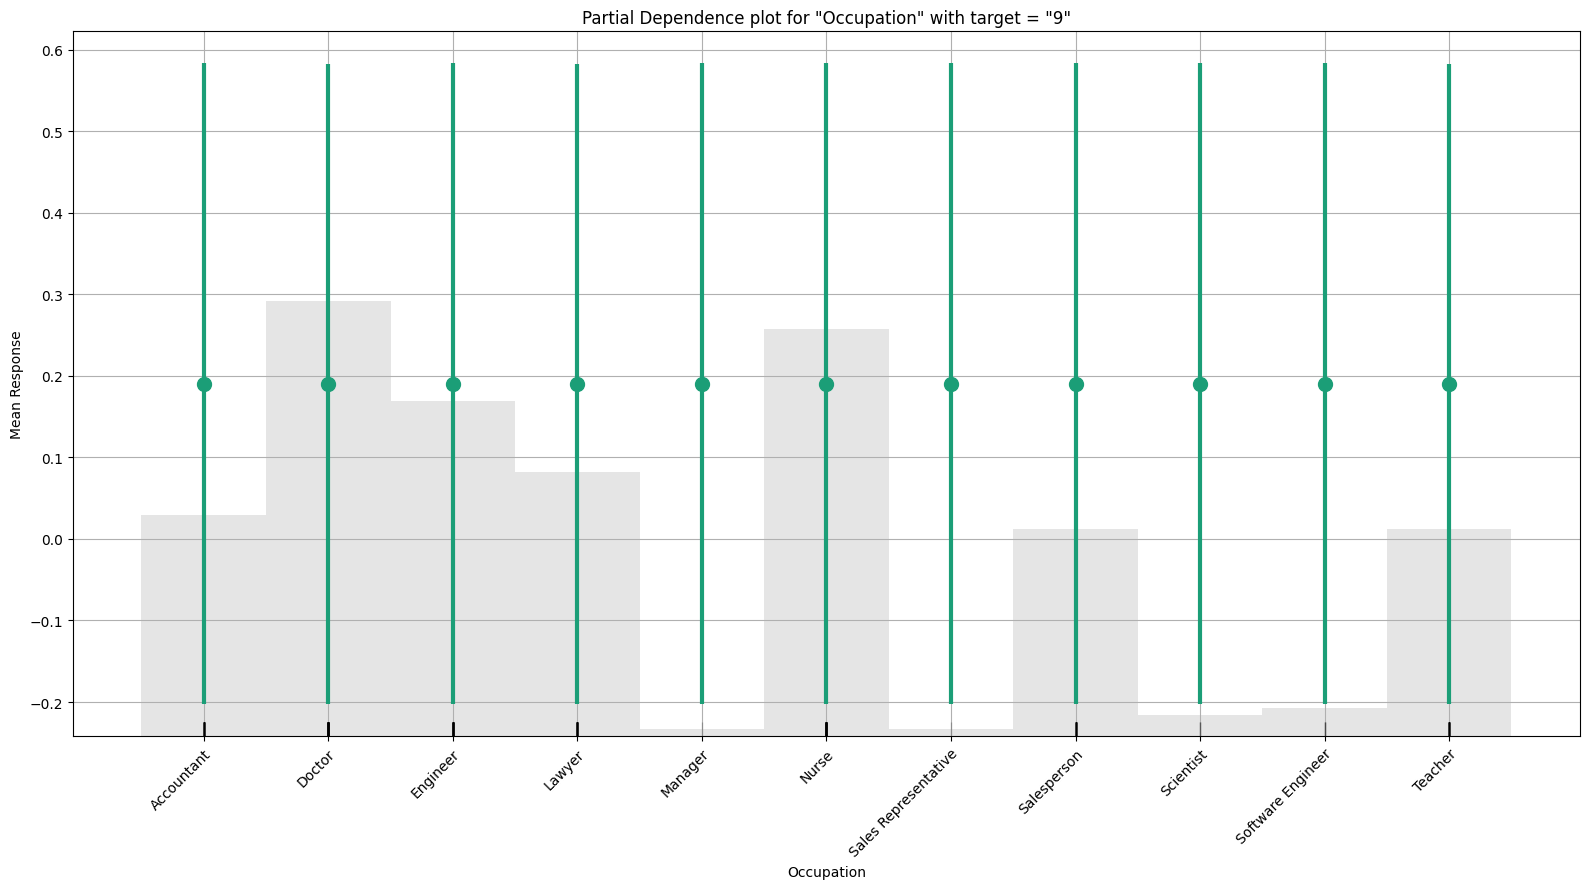

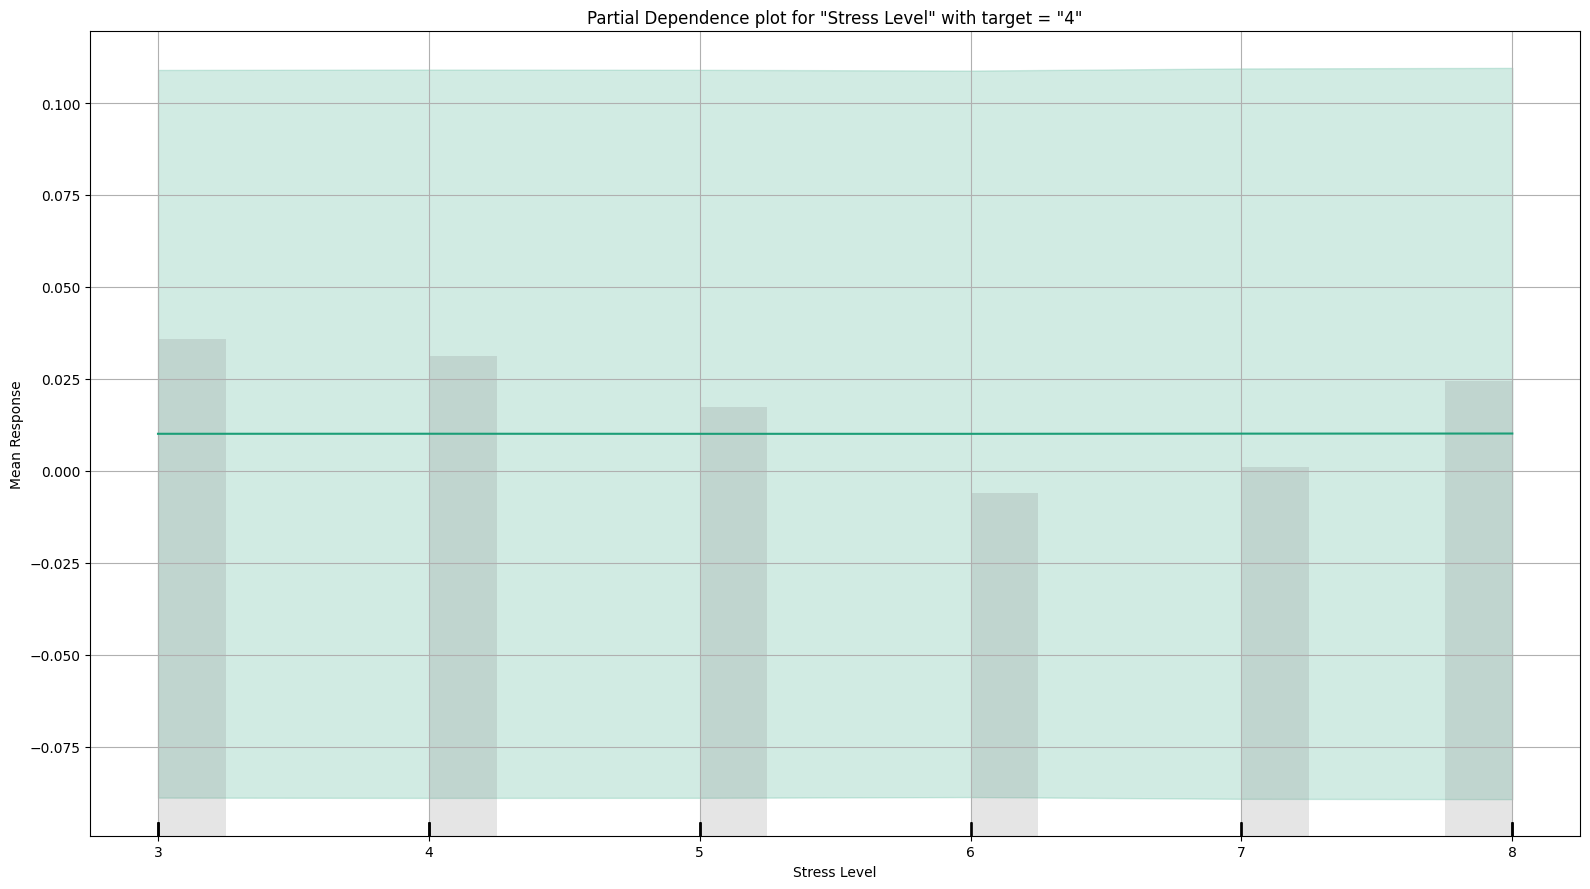

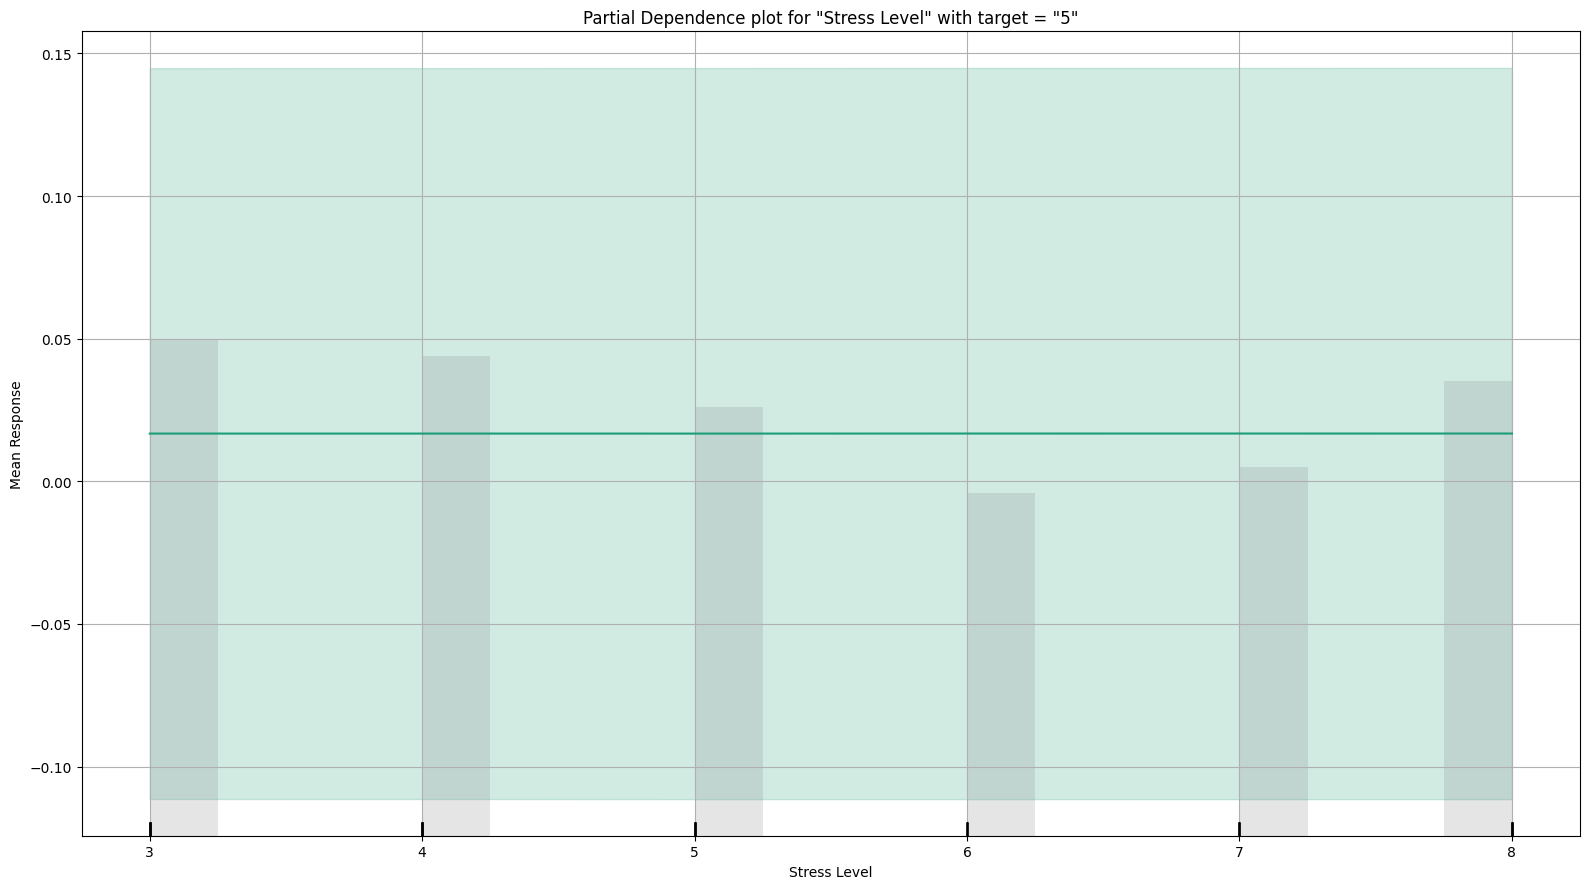

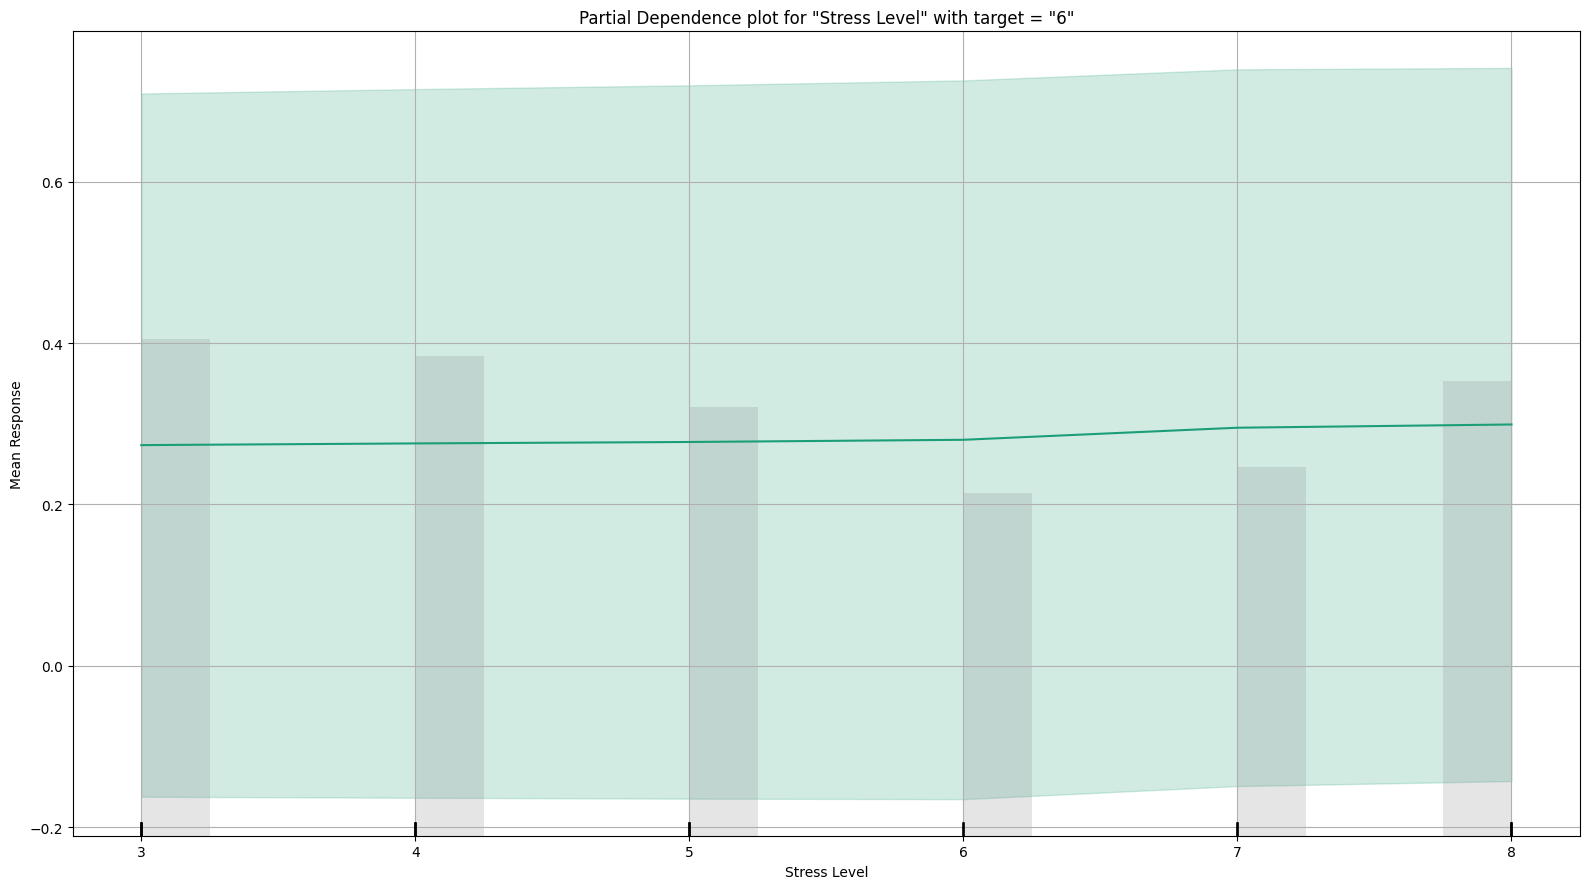

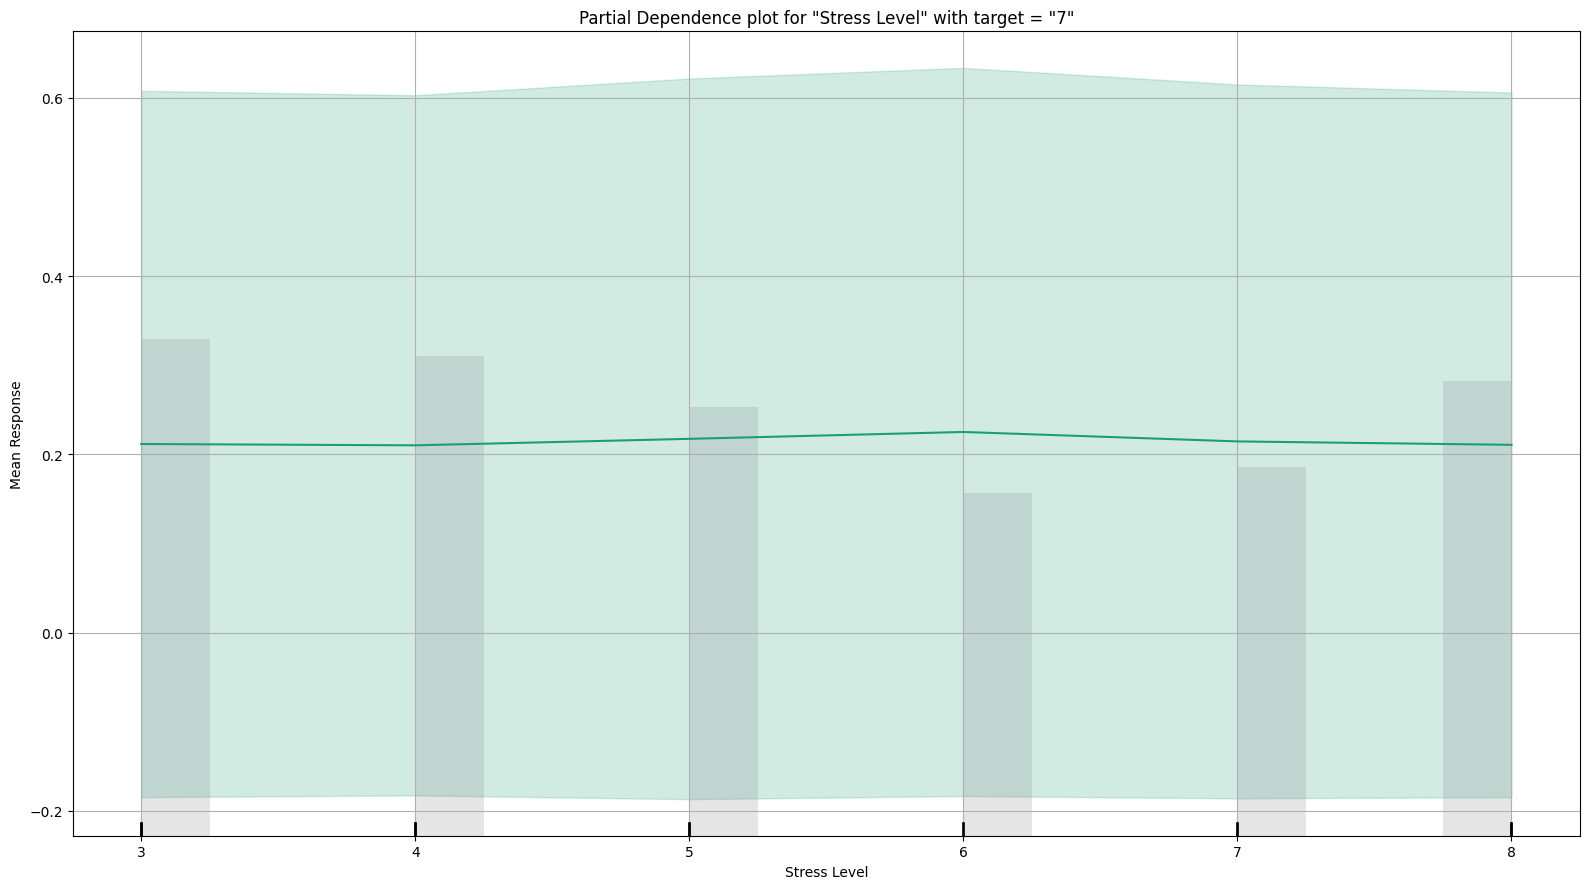

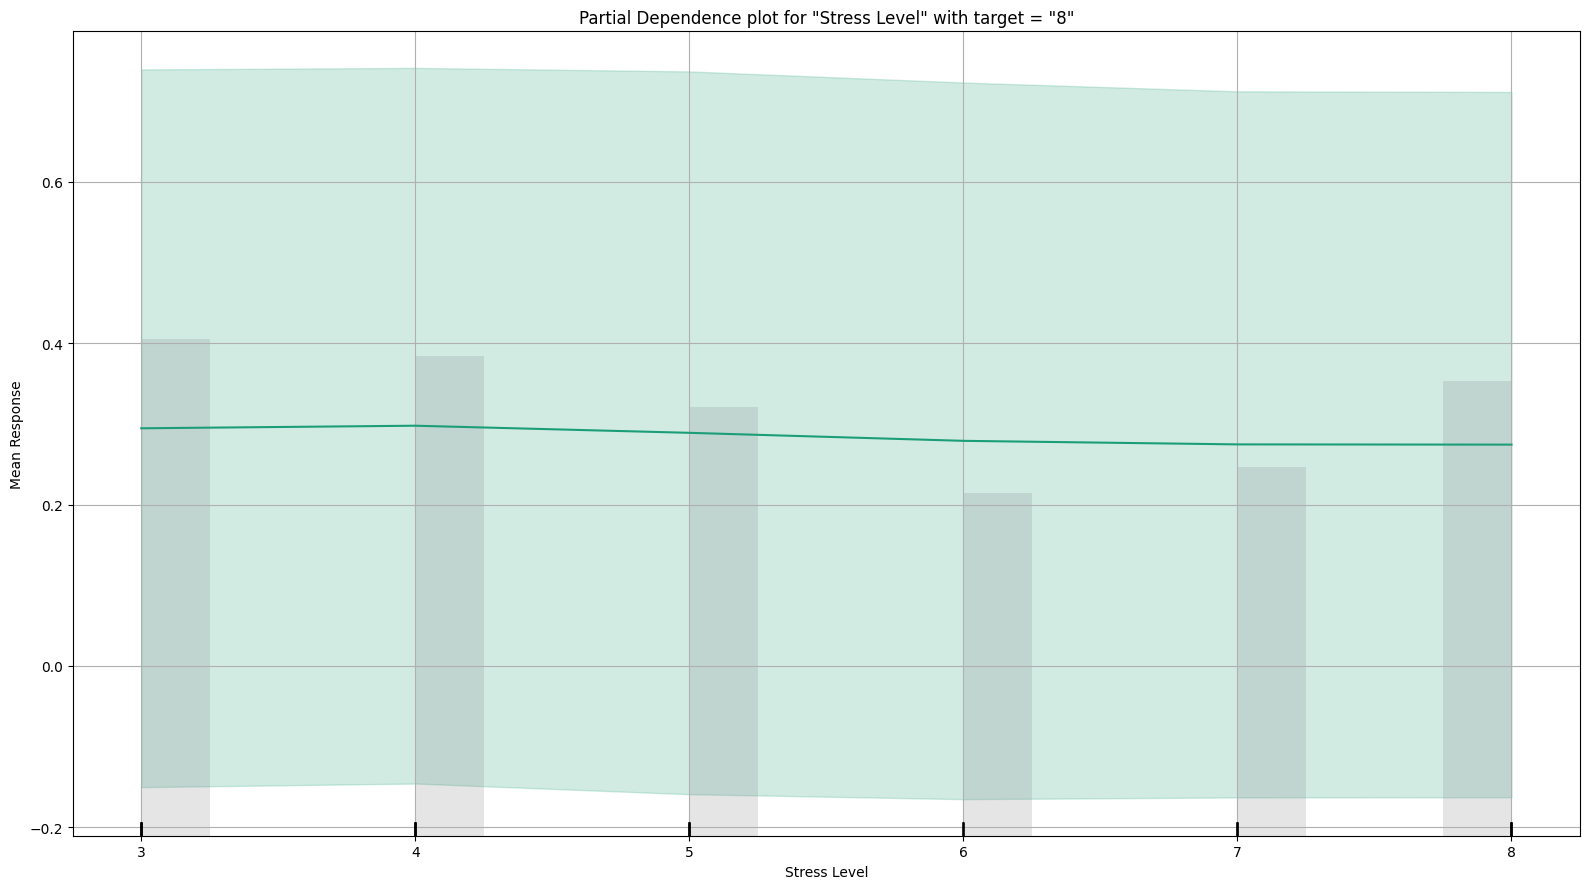

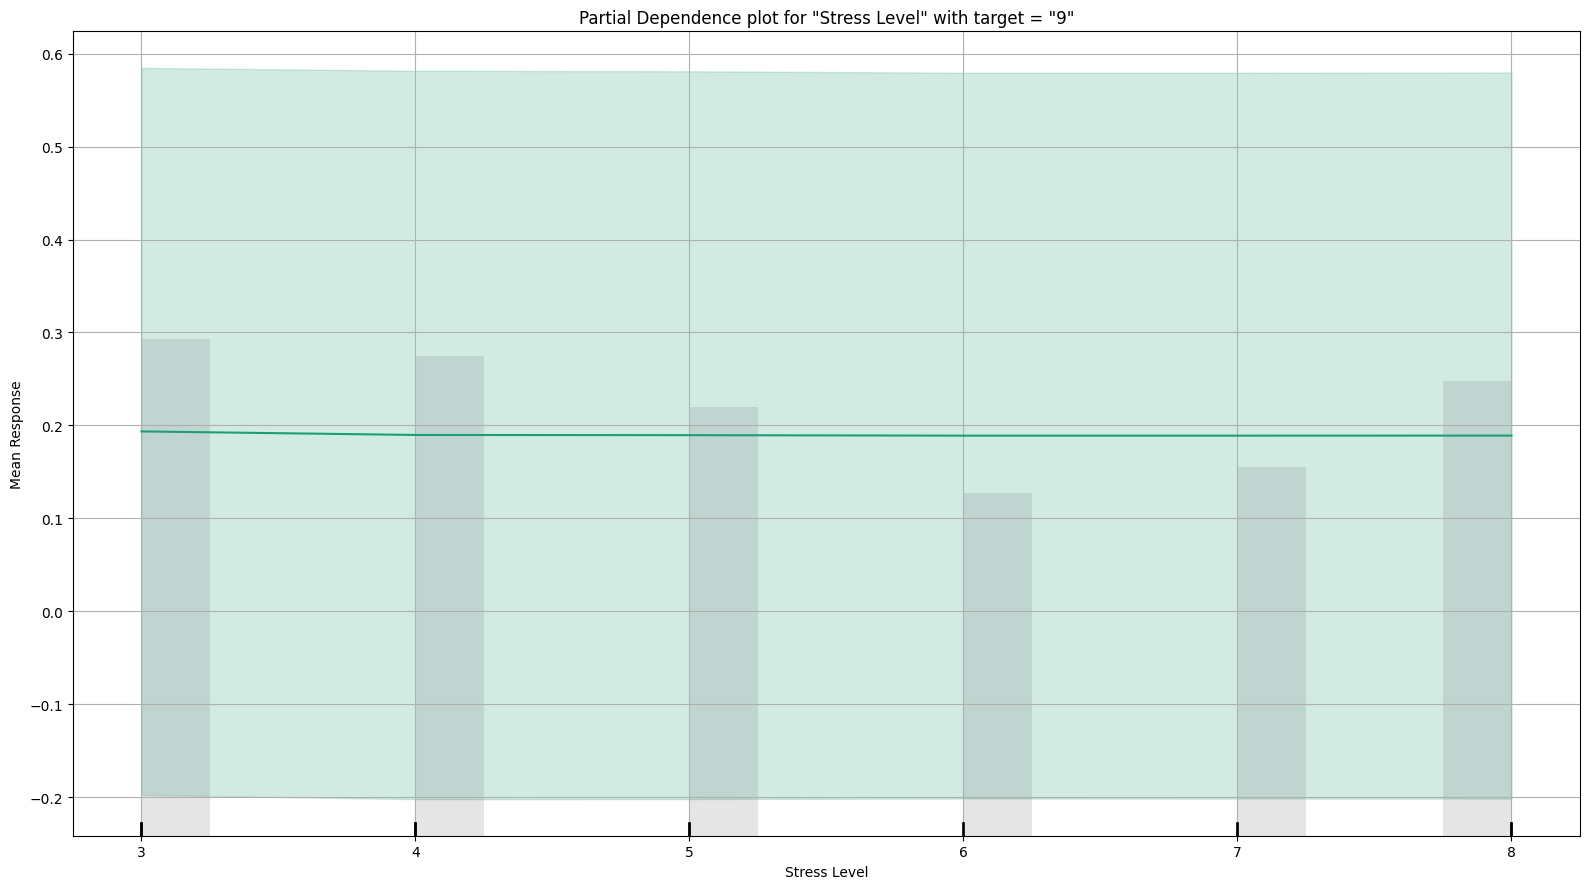

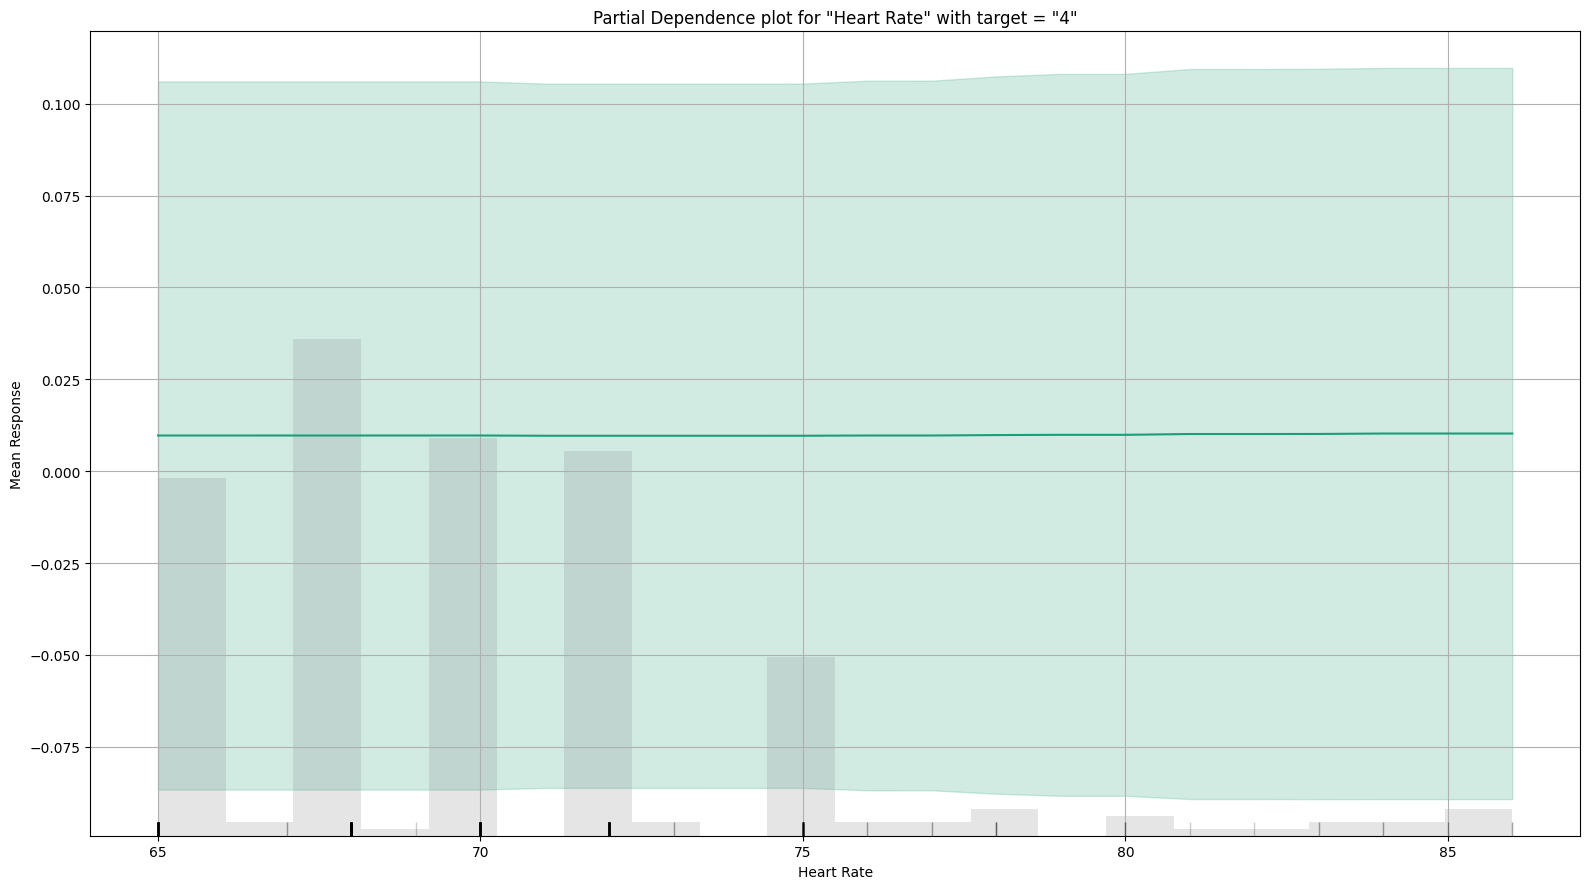

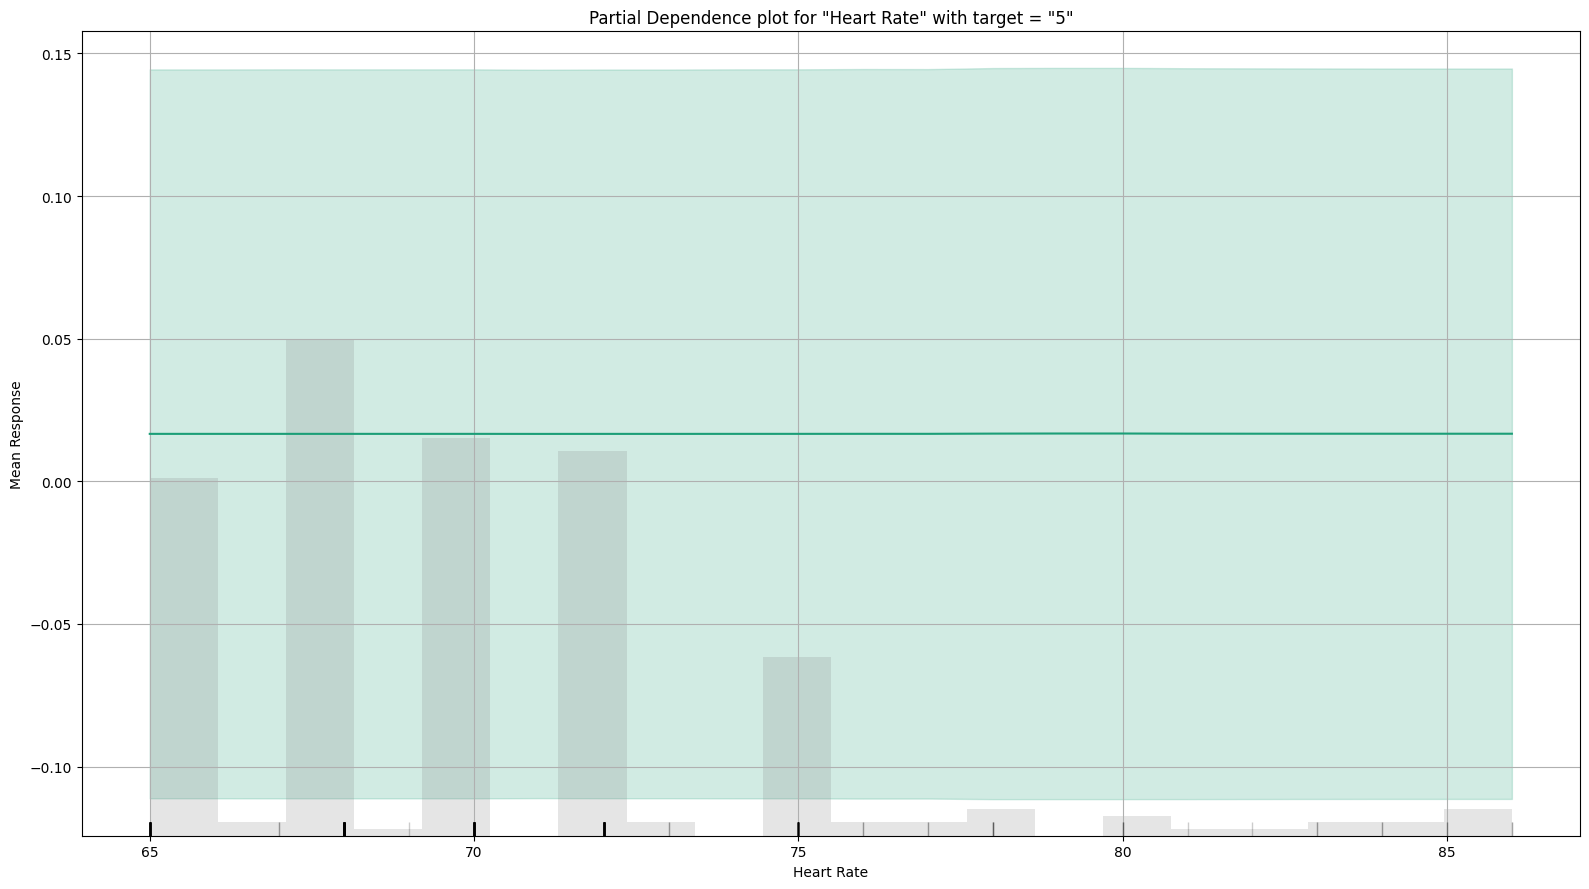

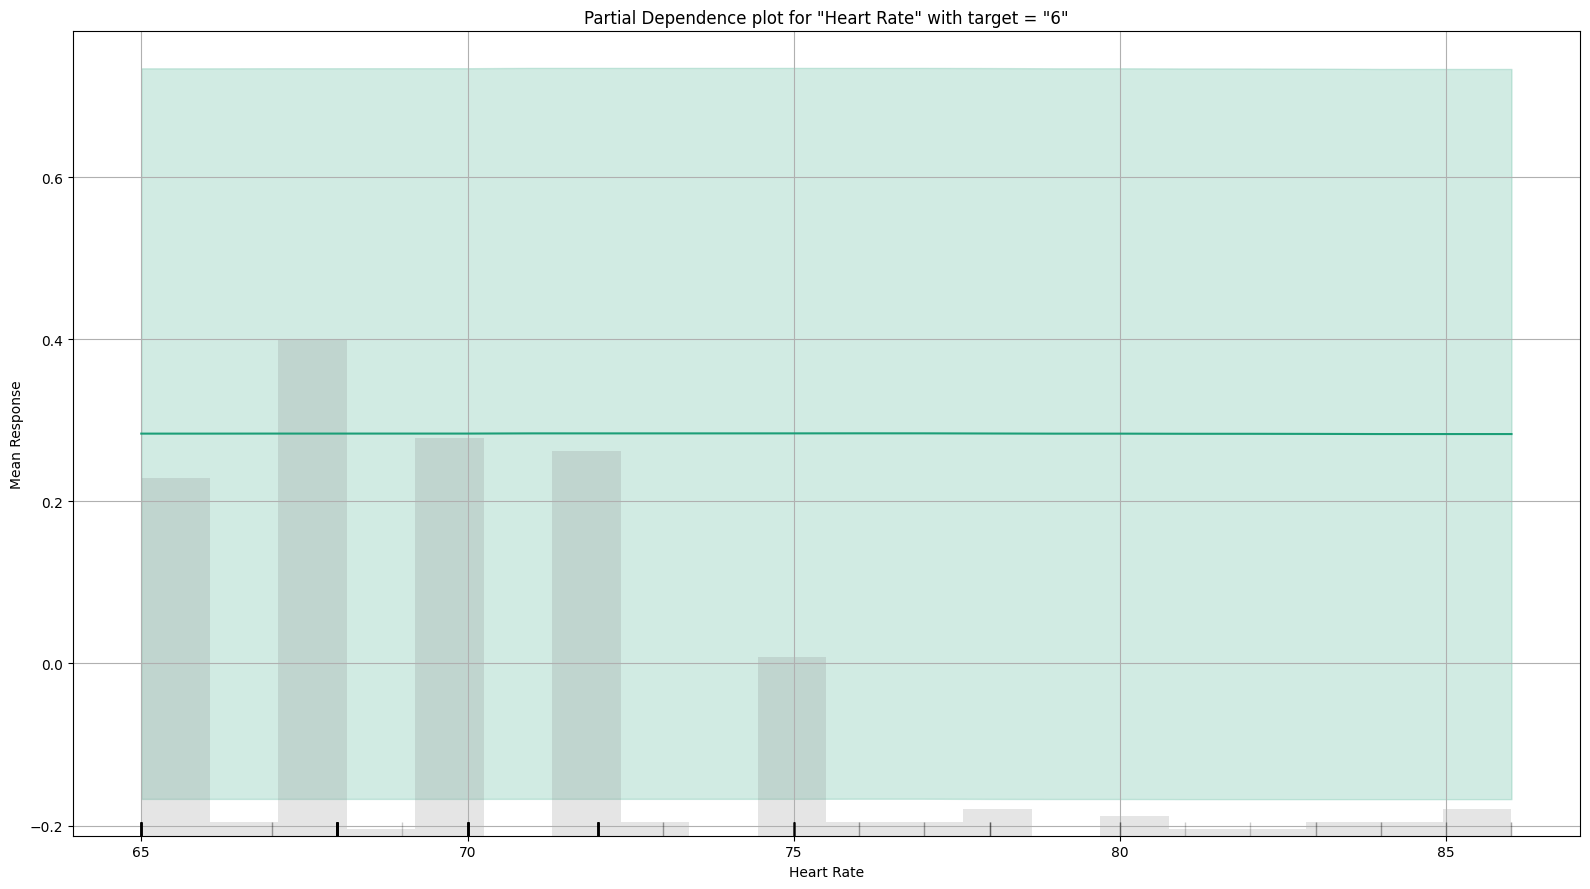

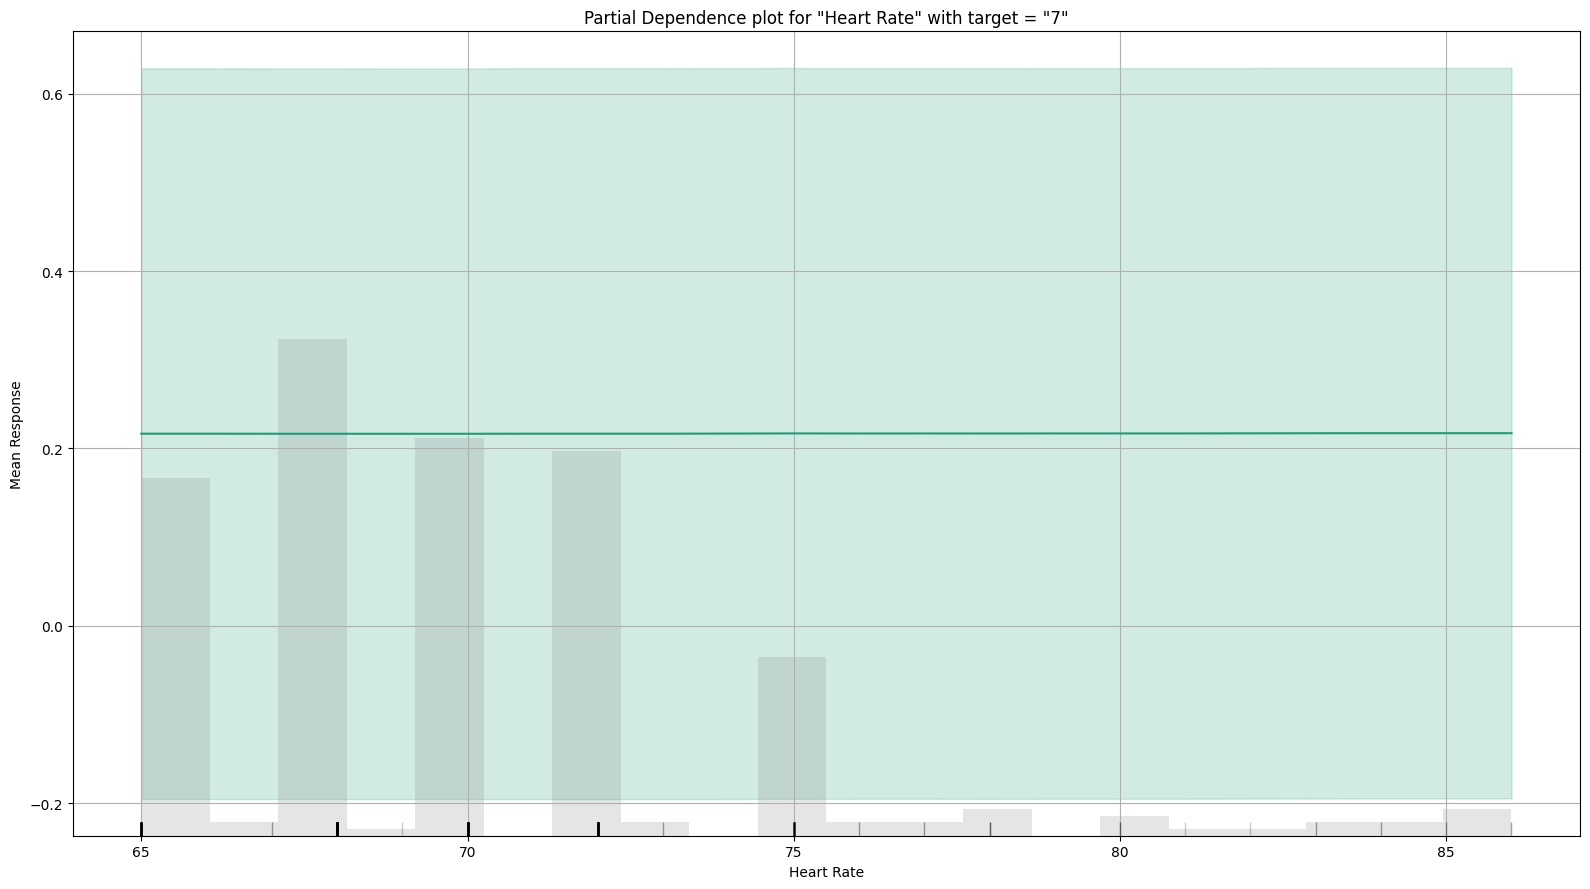

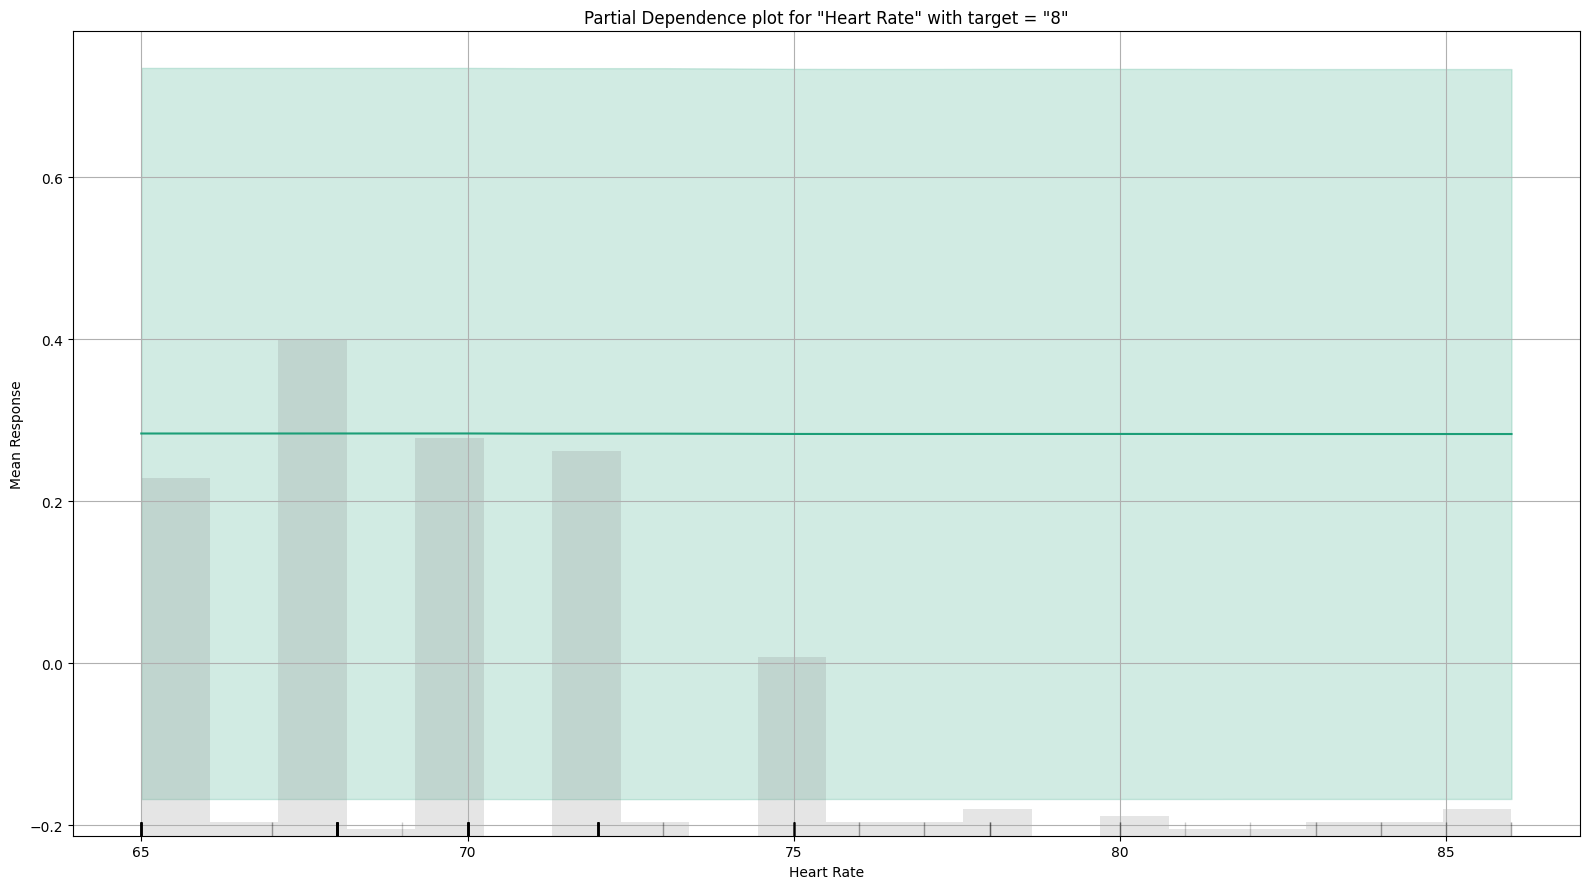

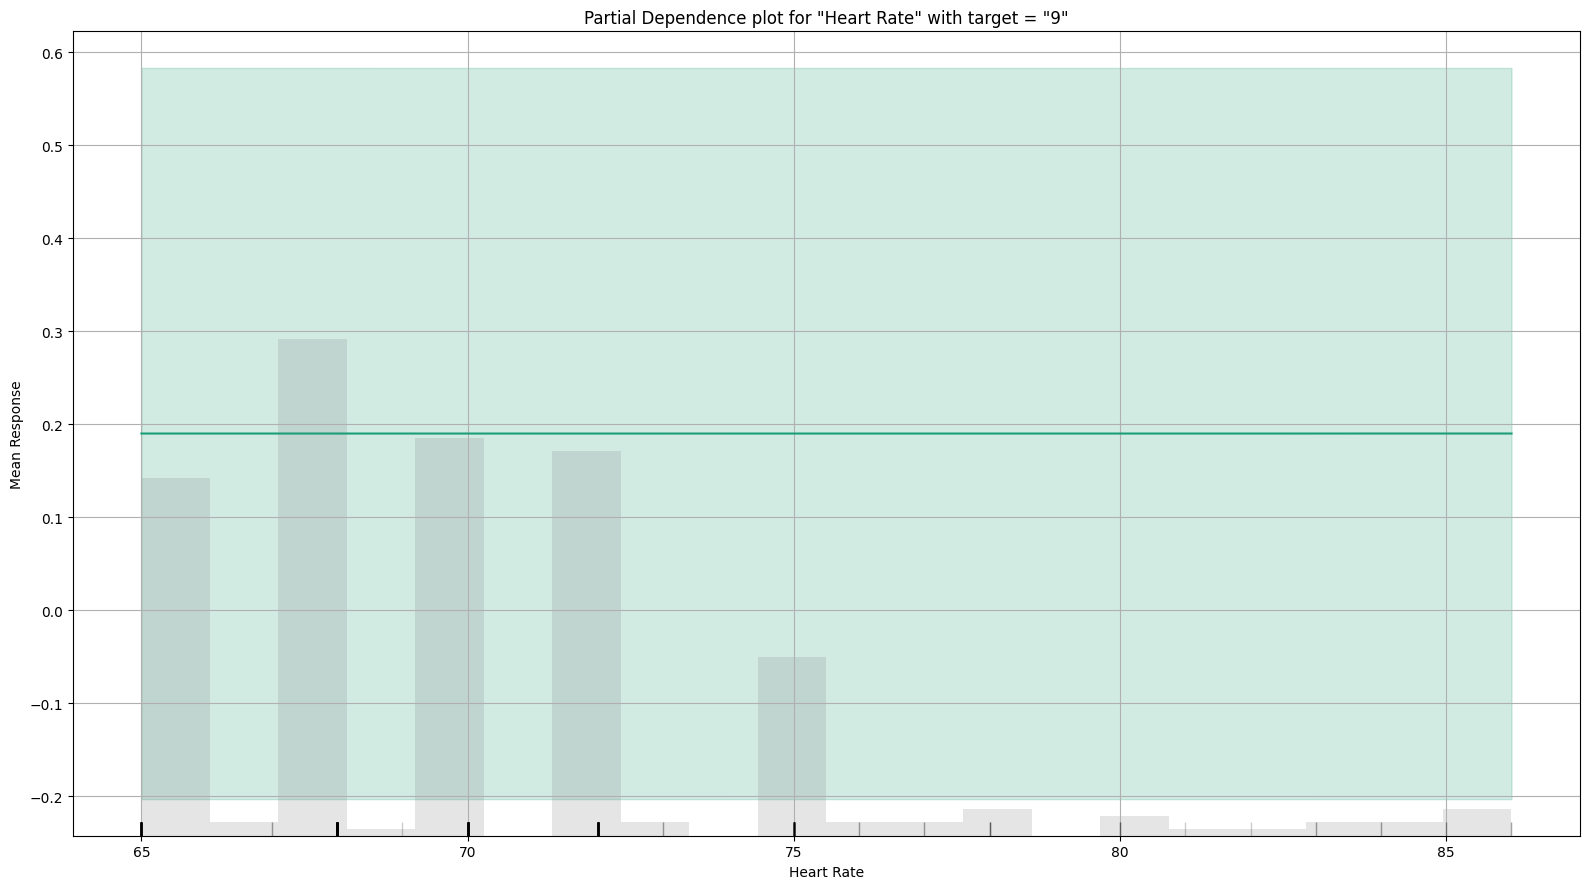

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20231204_15729_model_7

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
4    5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  ---  -------  -------
3    0    0    0    0    0    0        0 / 3
0    5    0    0    0    0    0        0 / 5
0    0    85   0    0    0    0        0 / 85
0    0    0    65   0    0    0        0 / 65
0    0    0    0    85   0    0        0 / 85
0    0    0    0    0    57   0        0 / 57
3    5    85   65   85   57   0        0 / 300

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

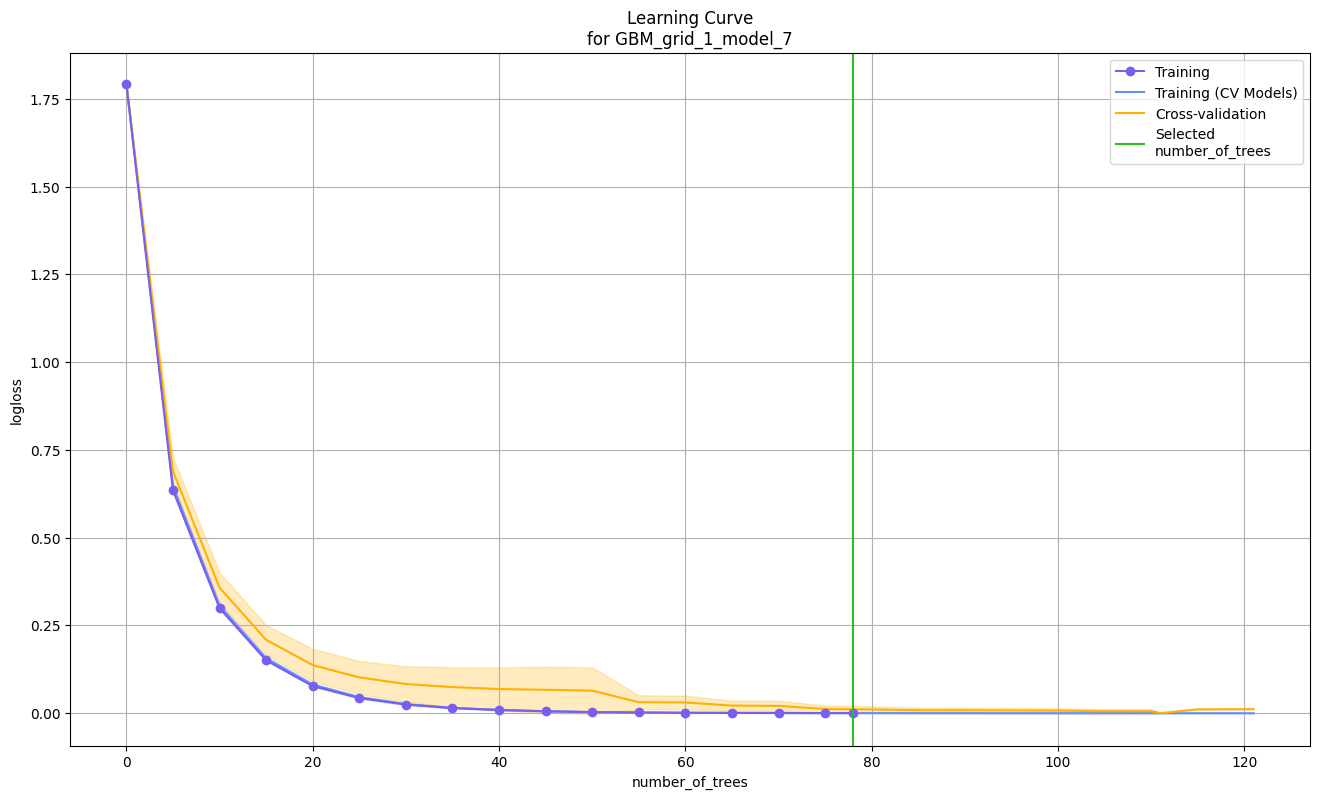

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

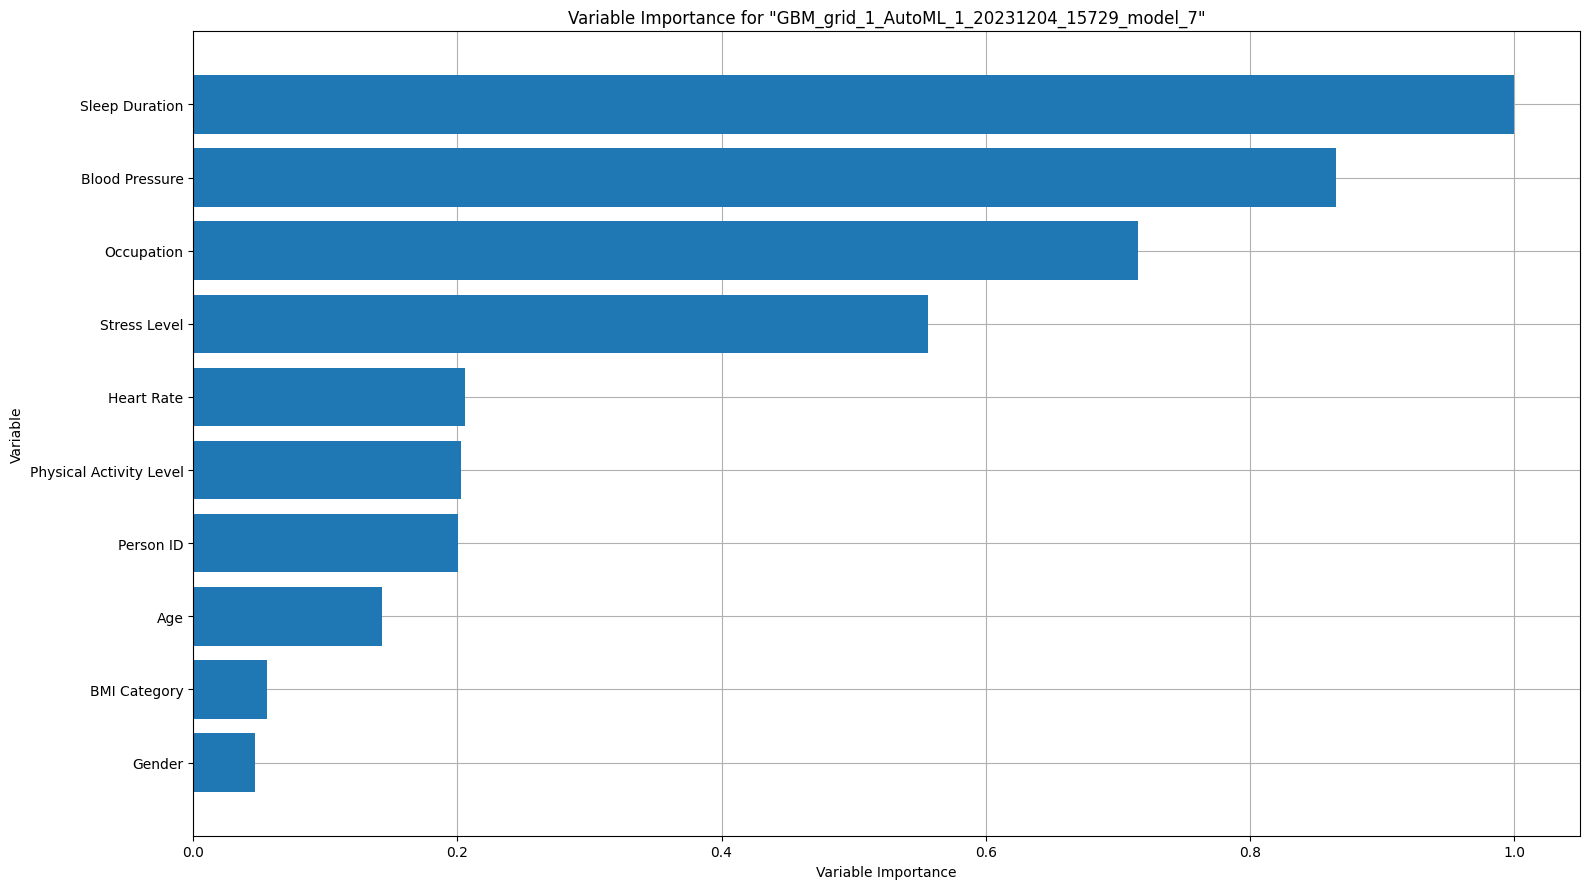

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

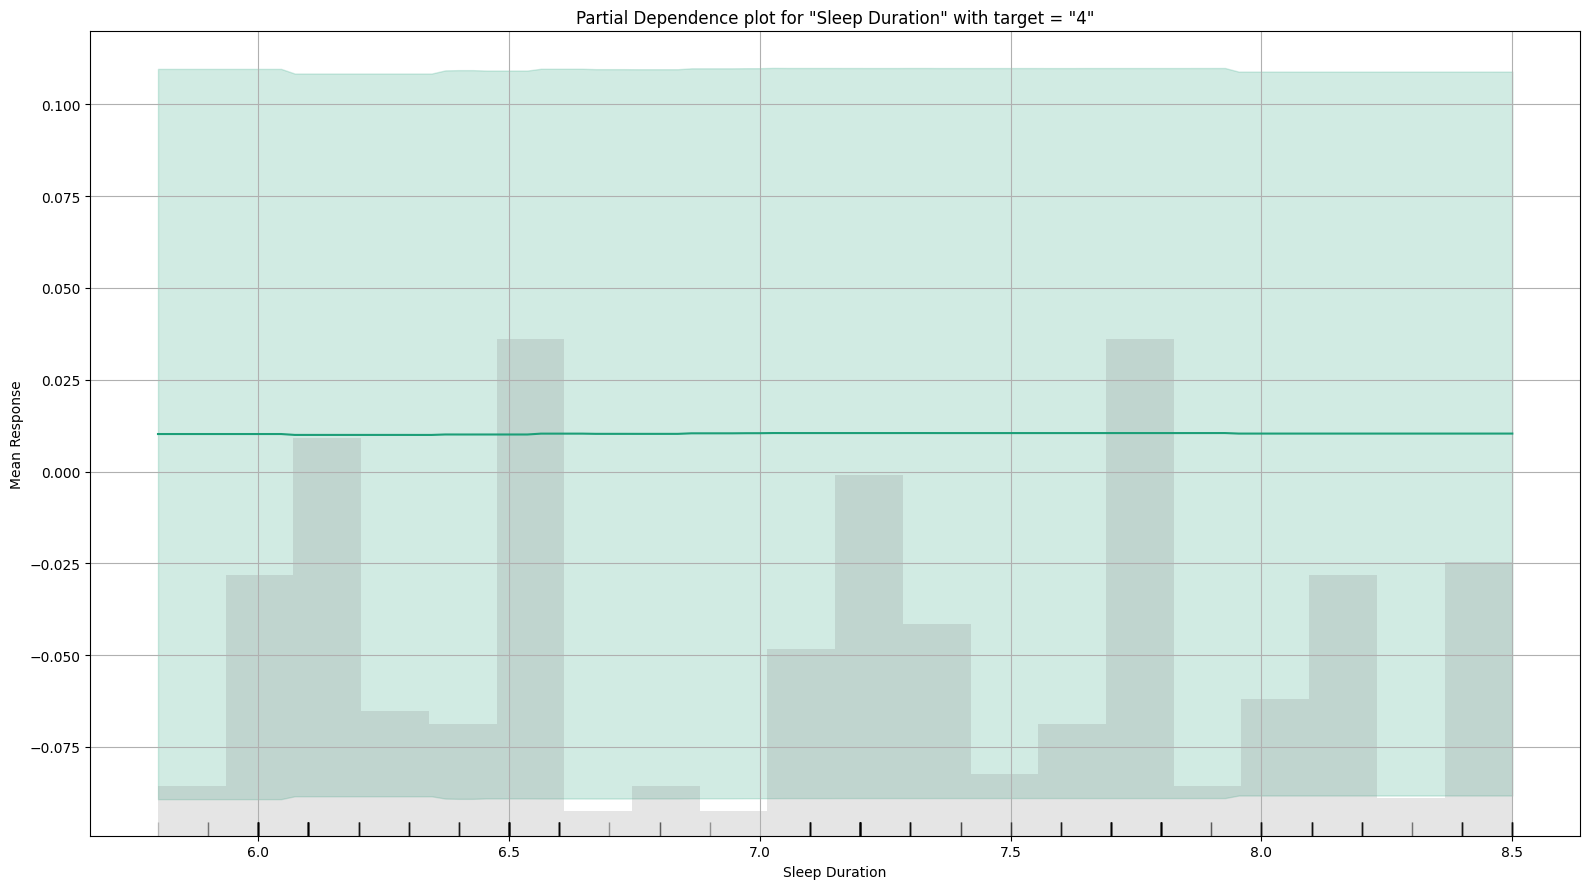

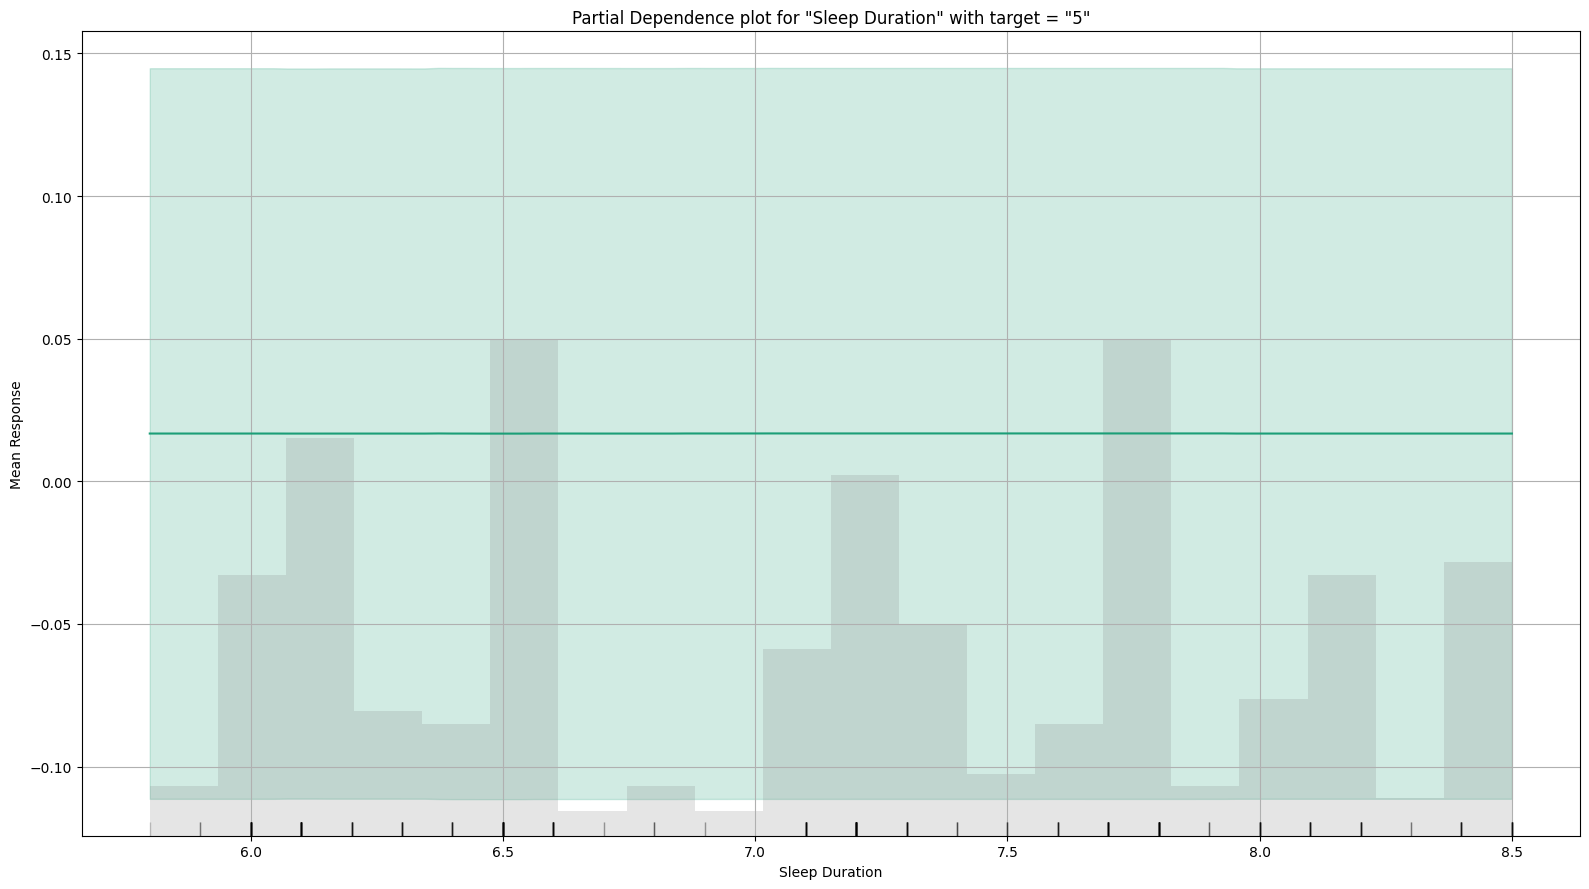

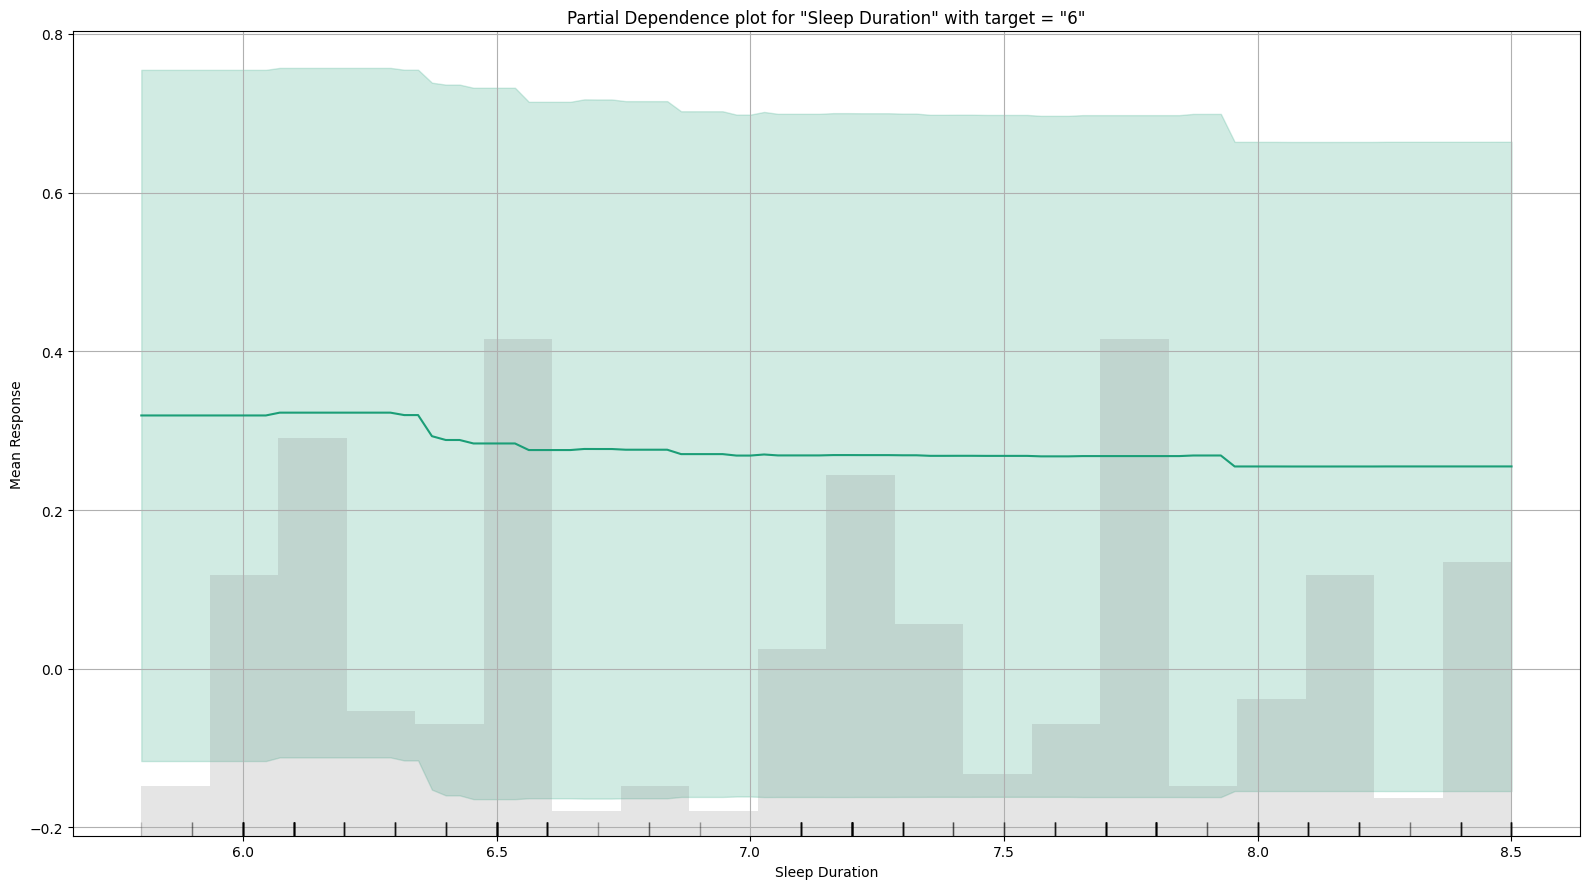

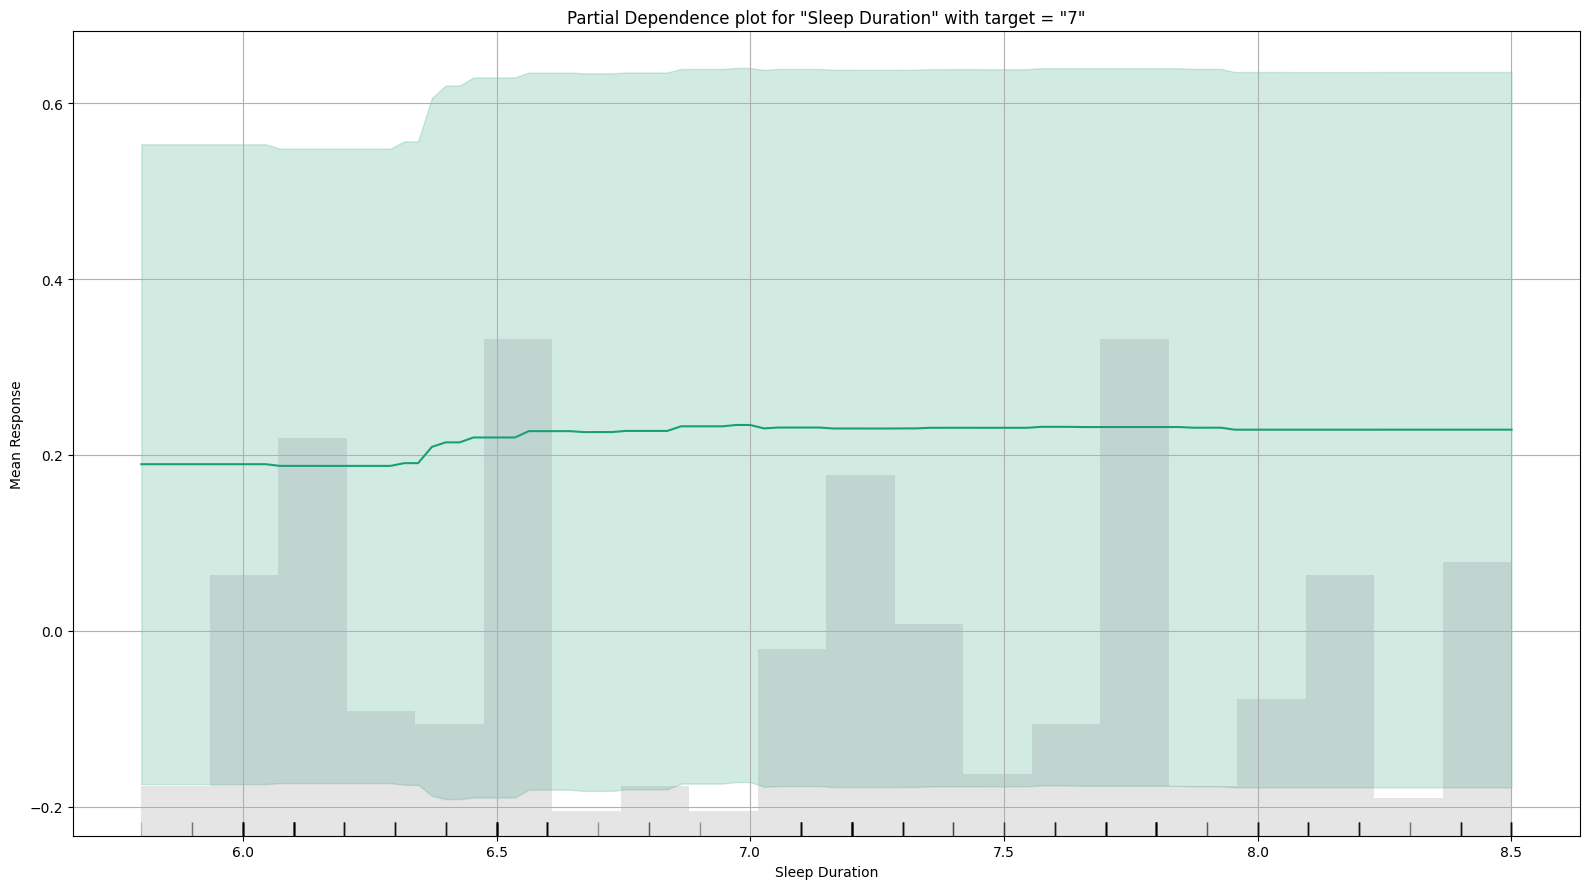

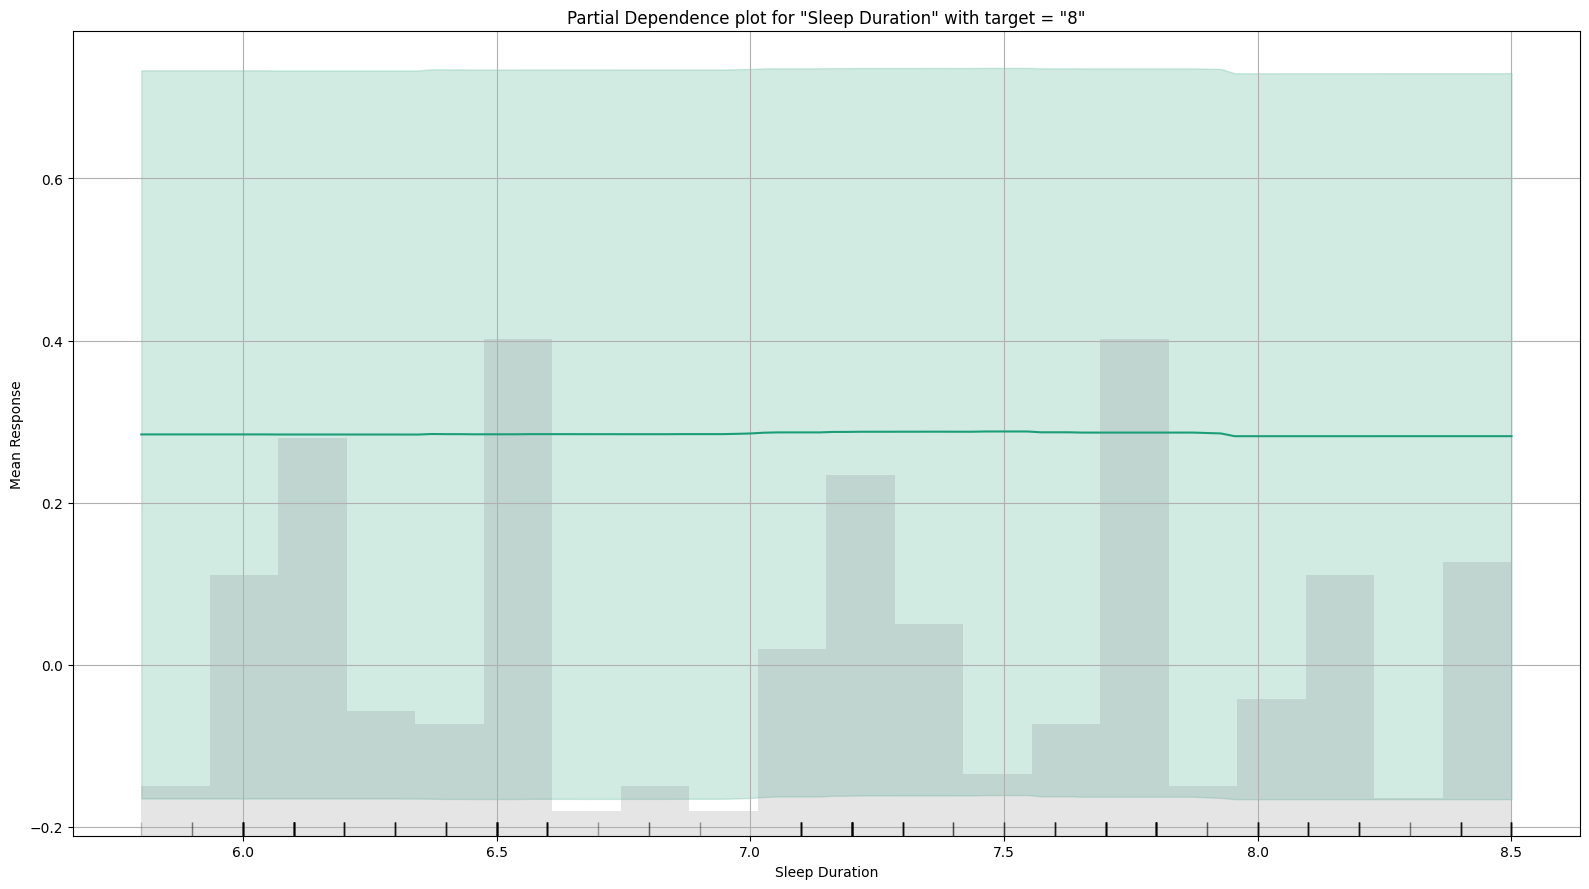

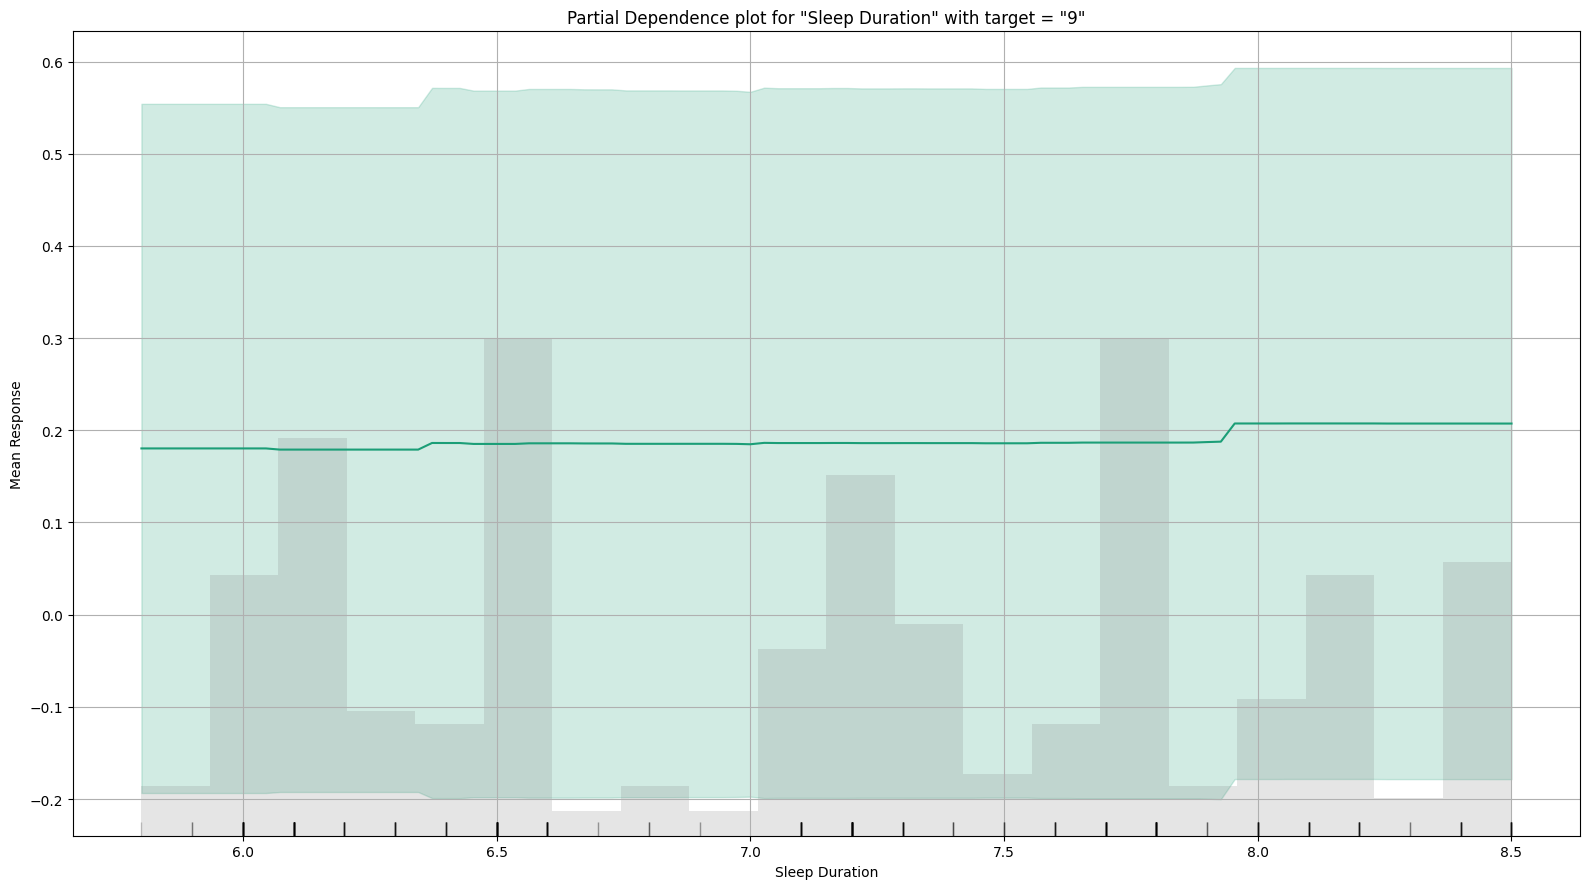

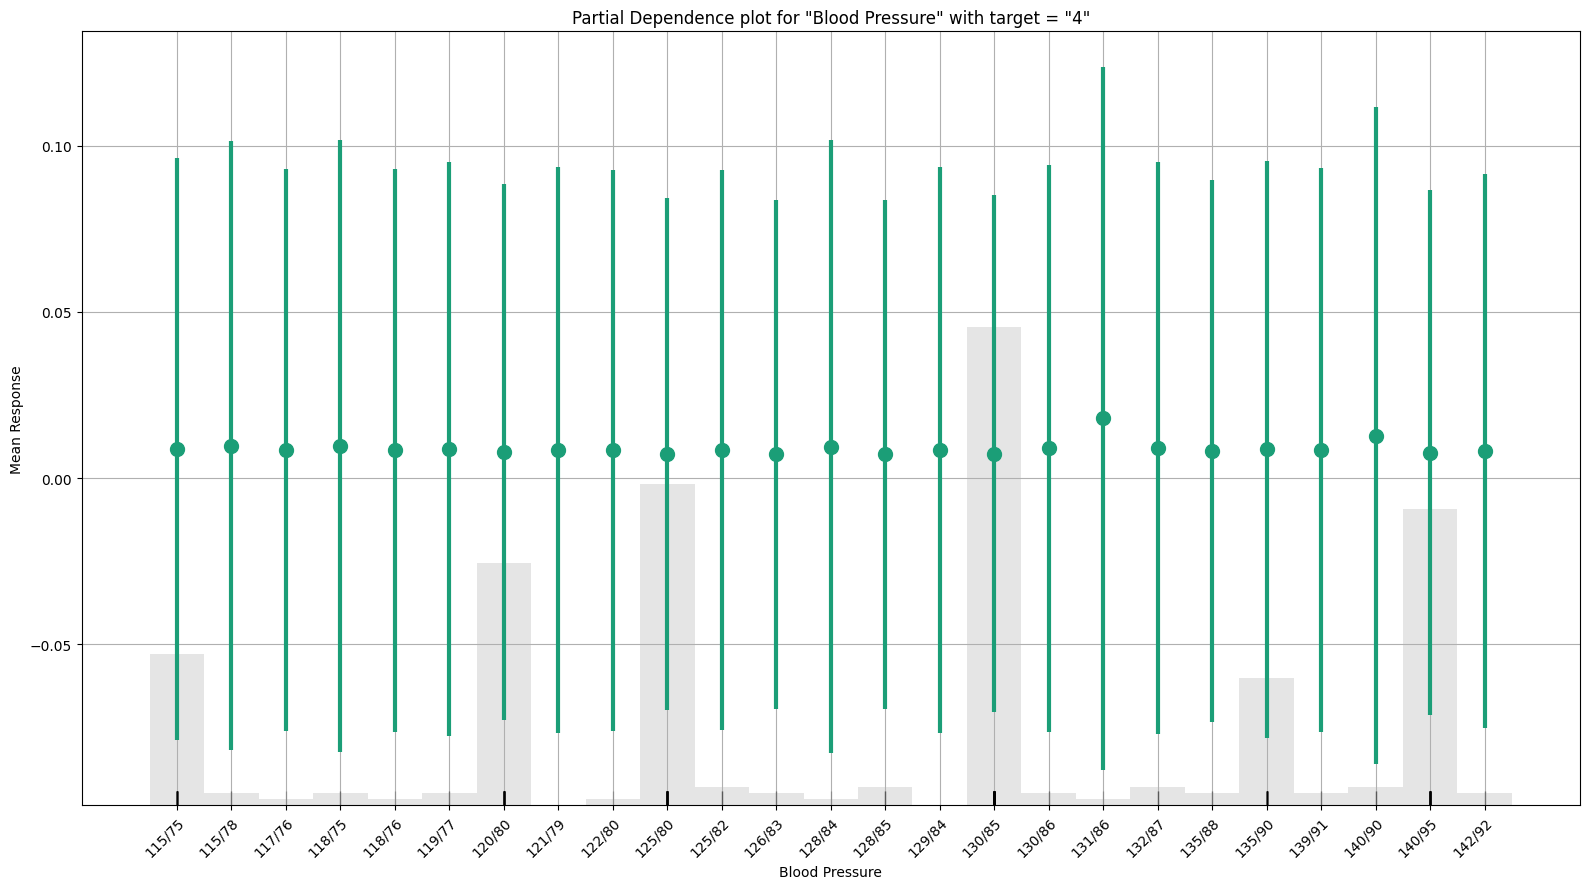

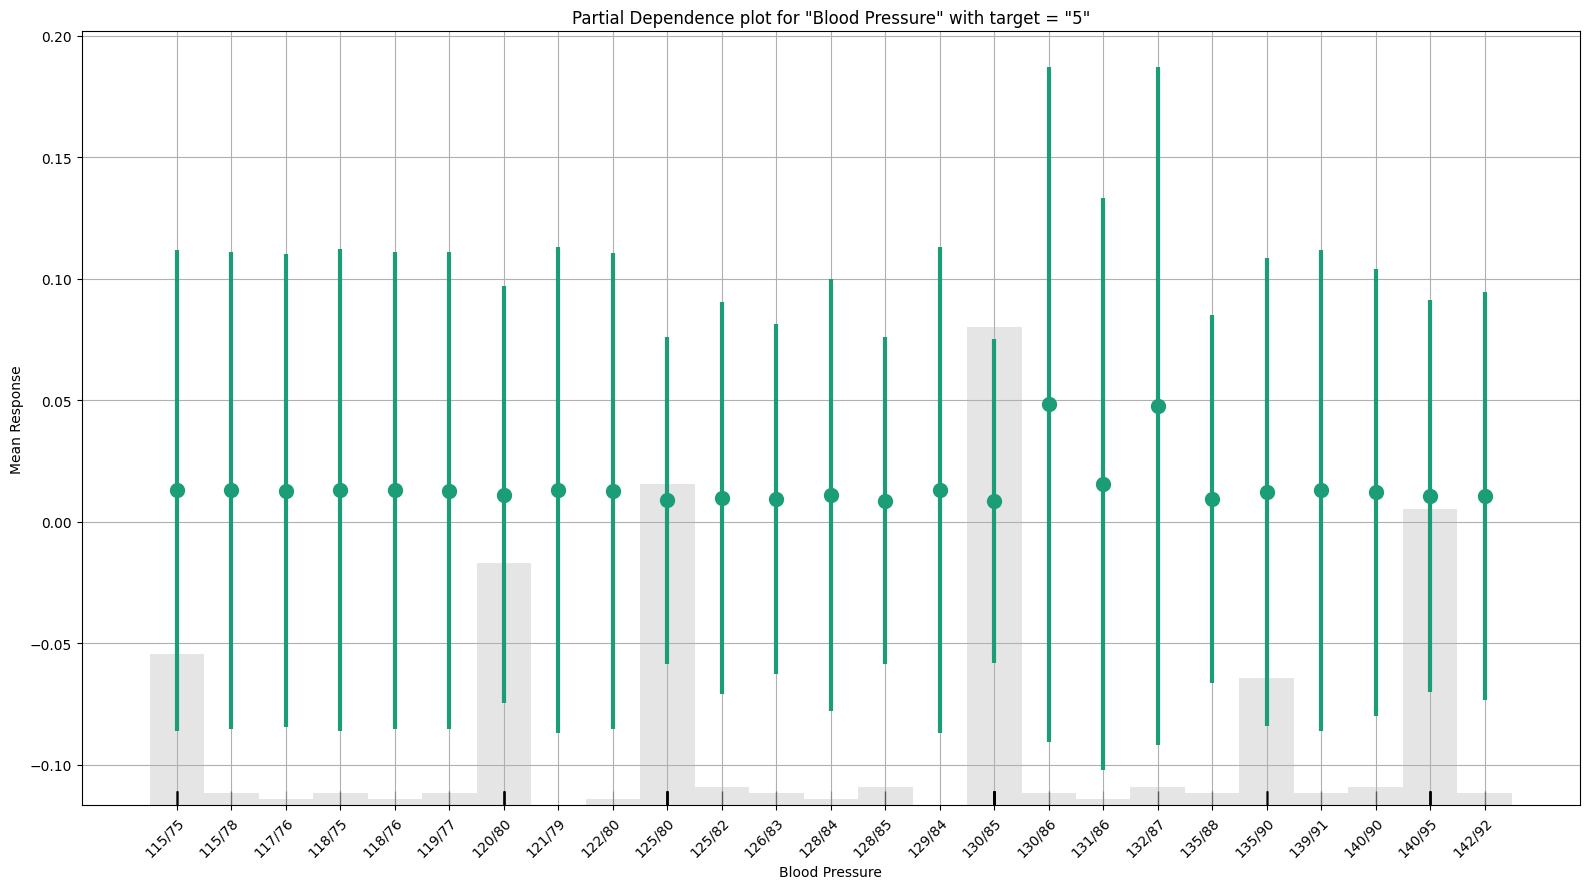

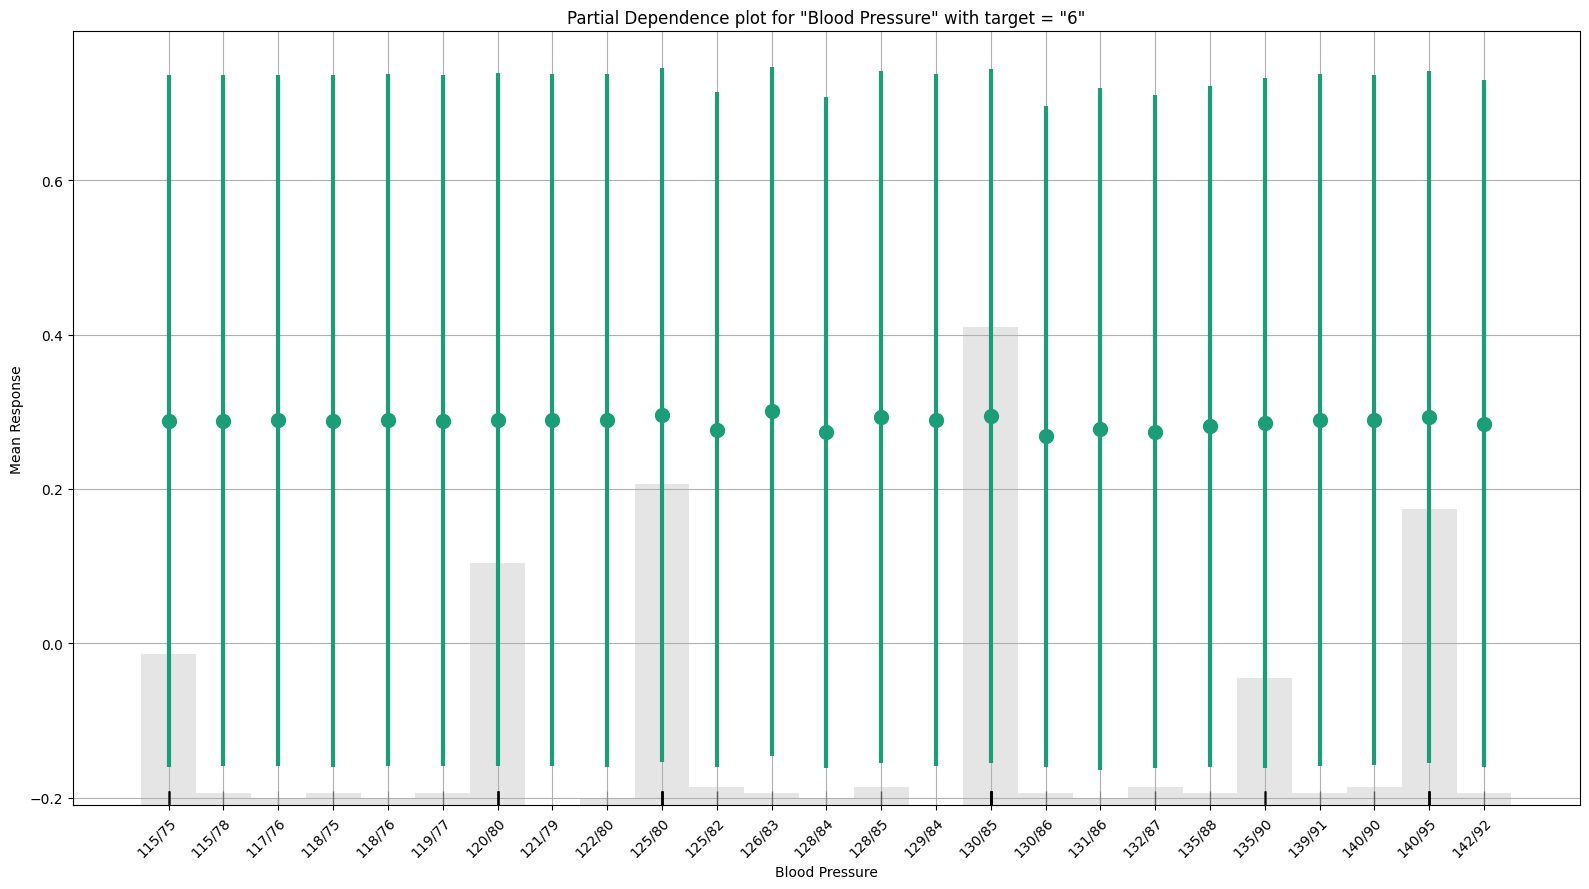

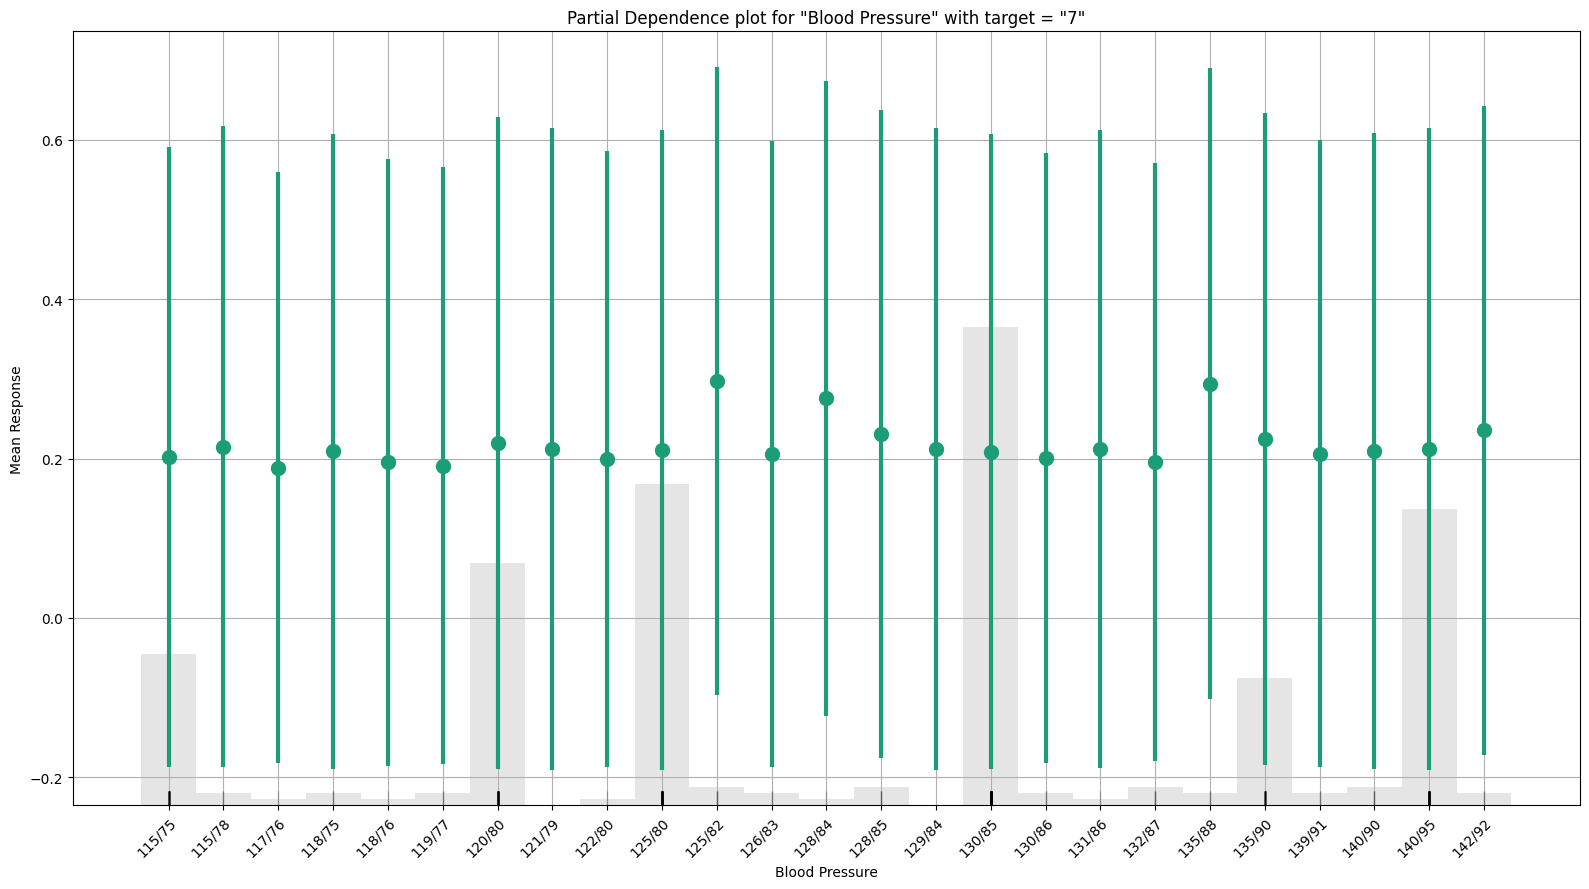

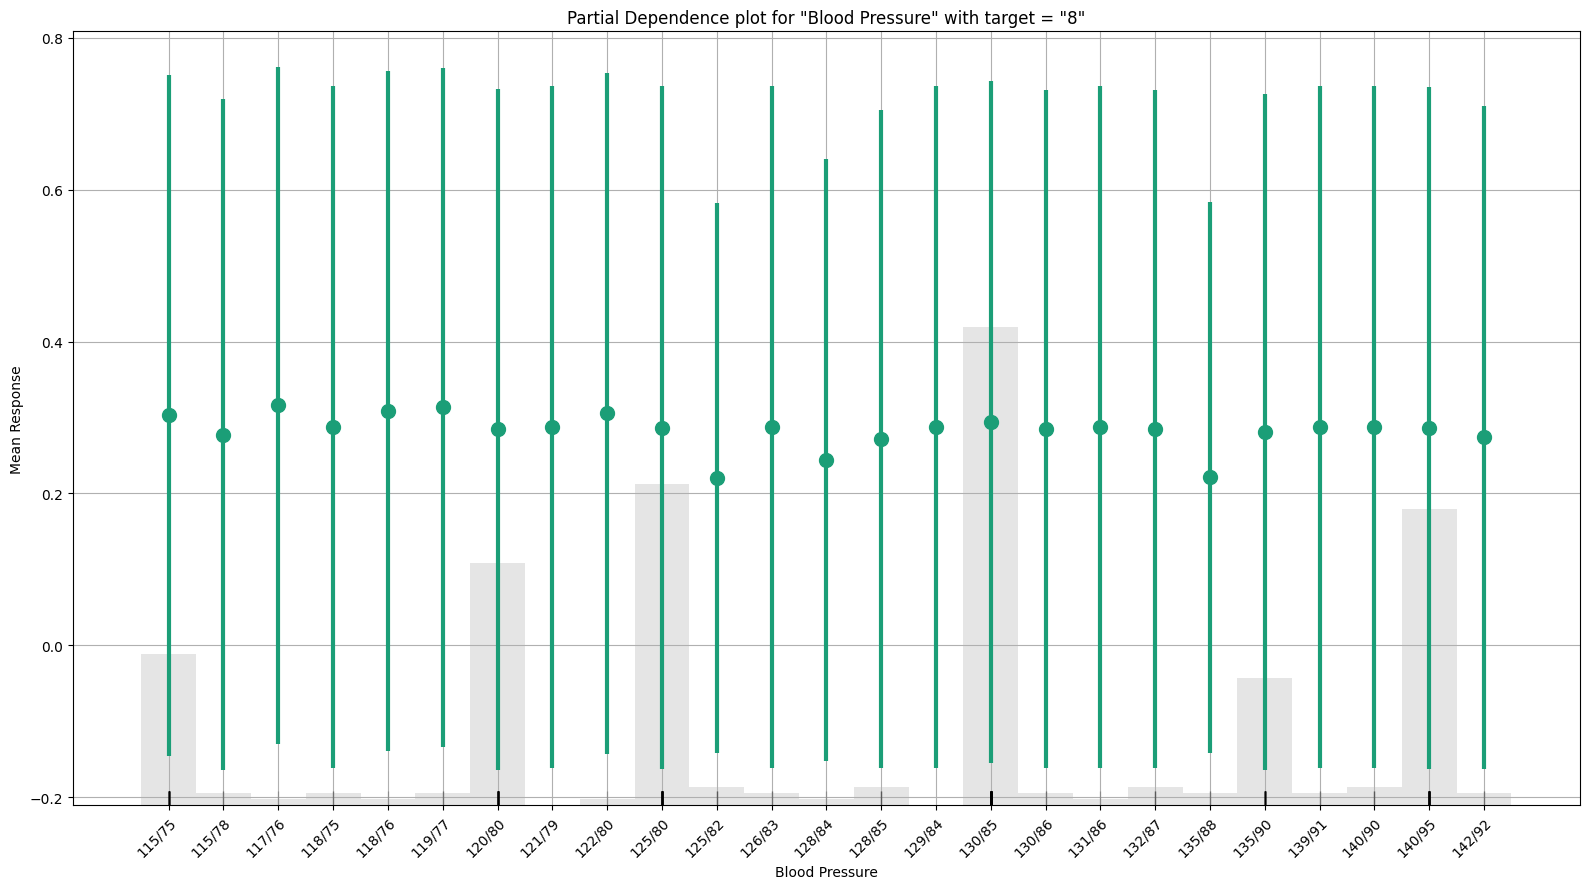

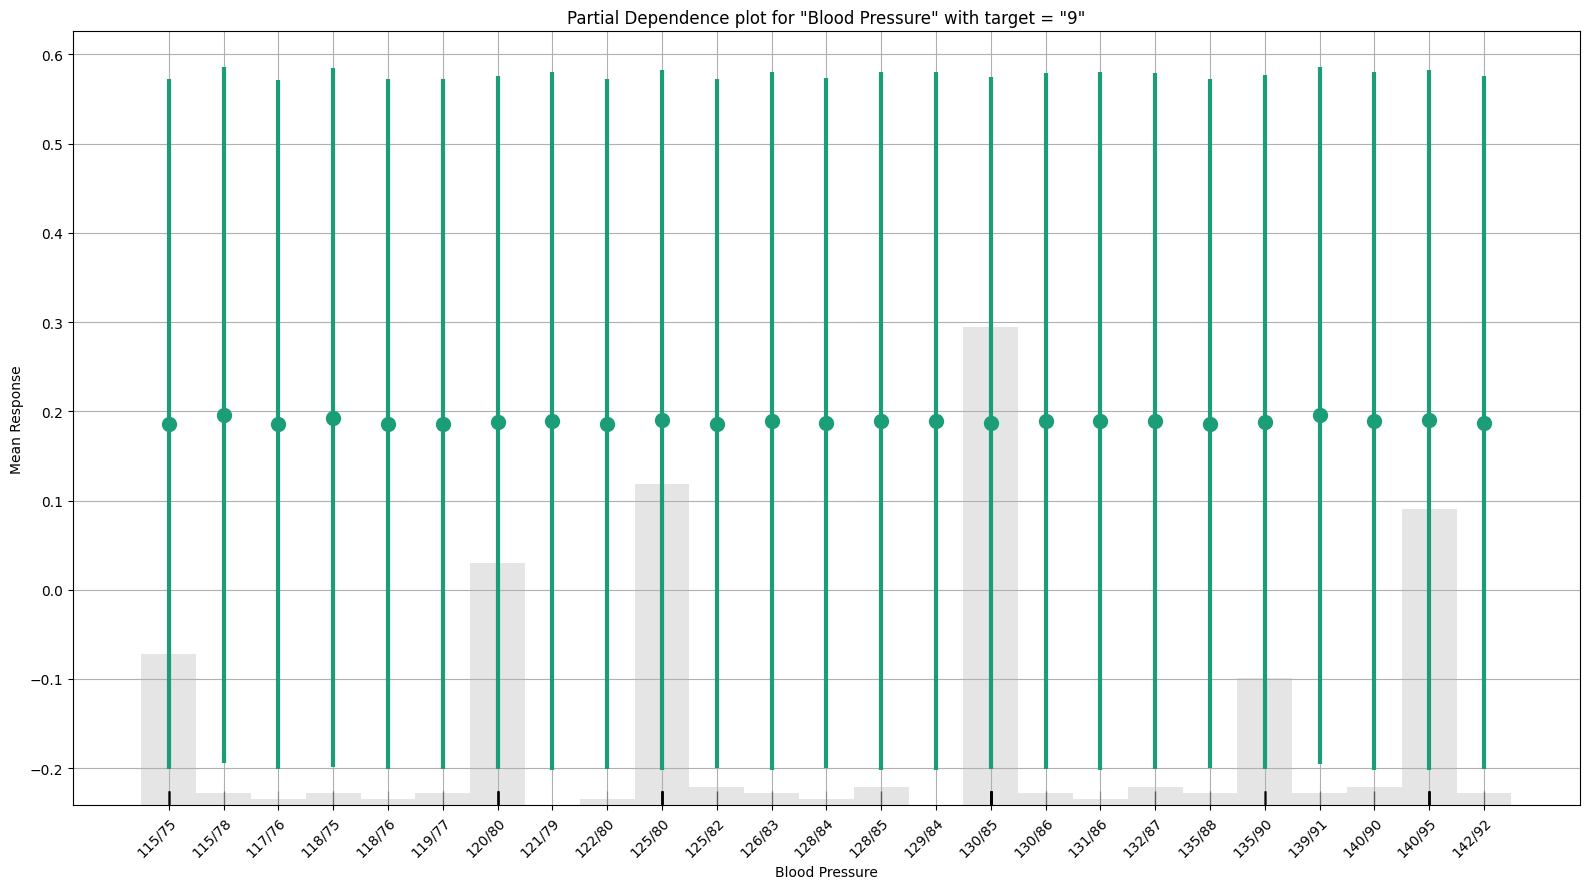

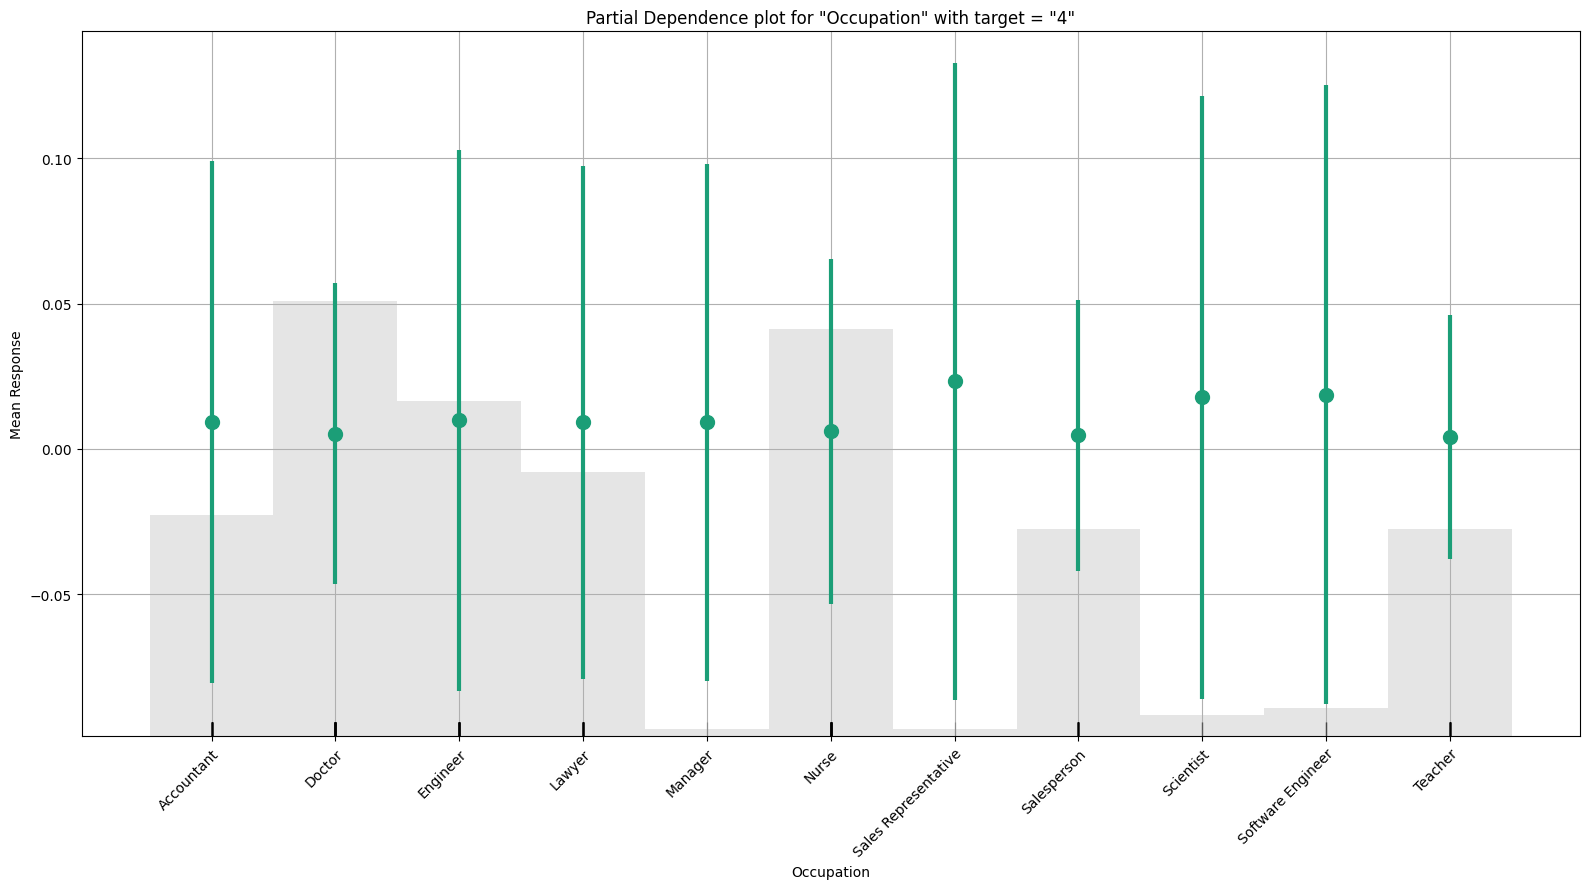

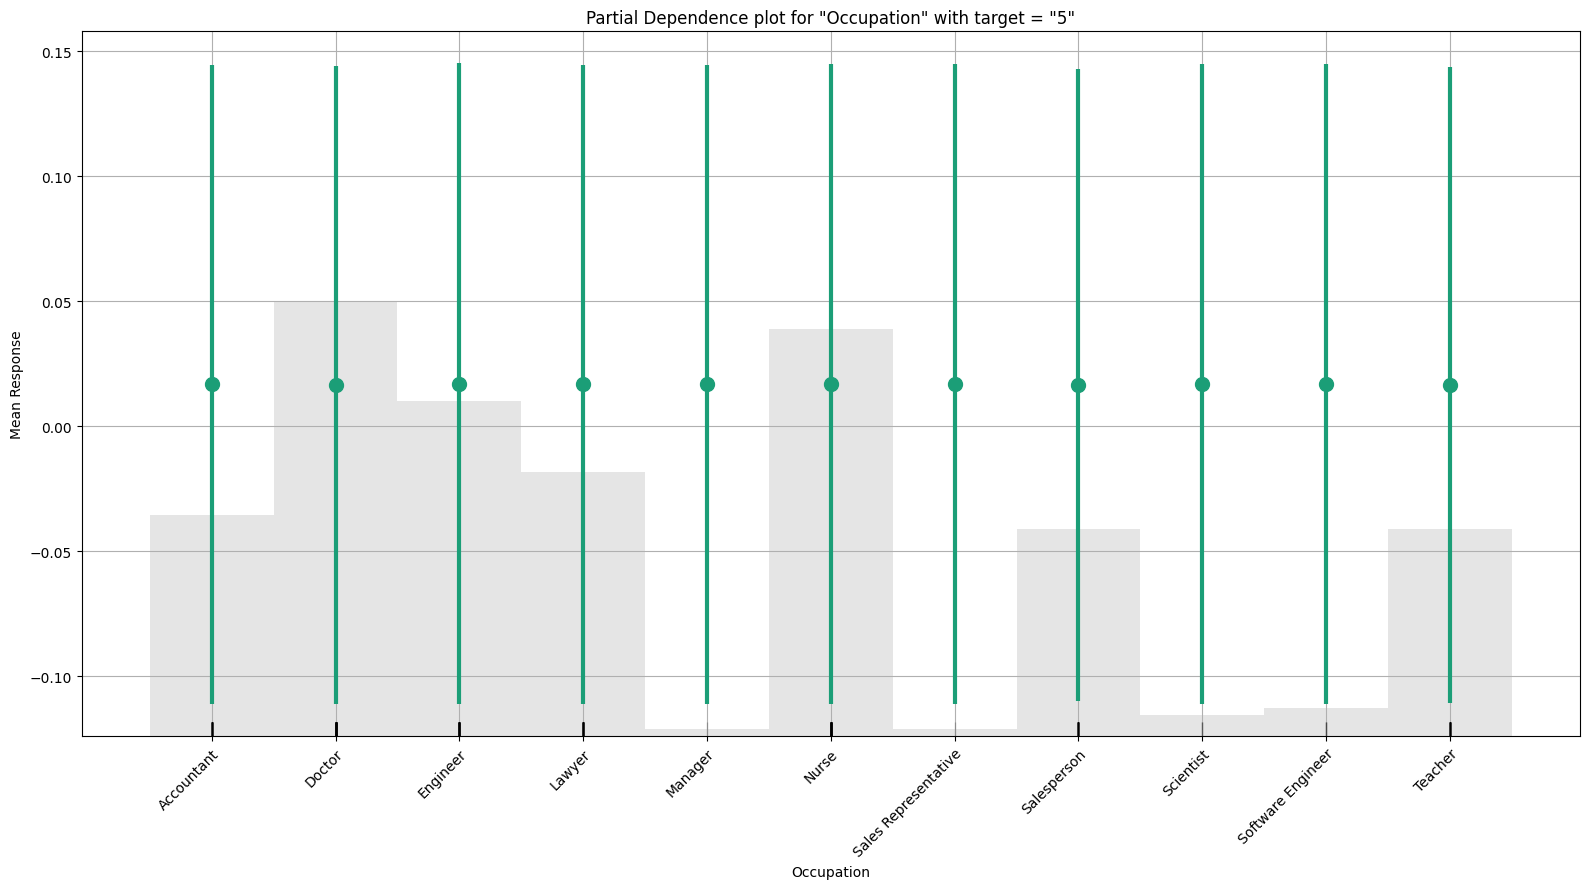

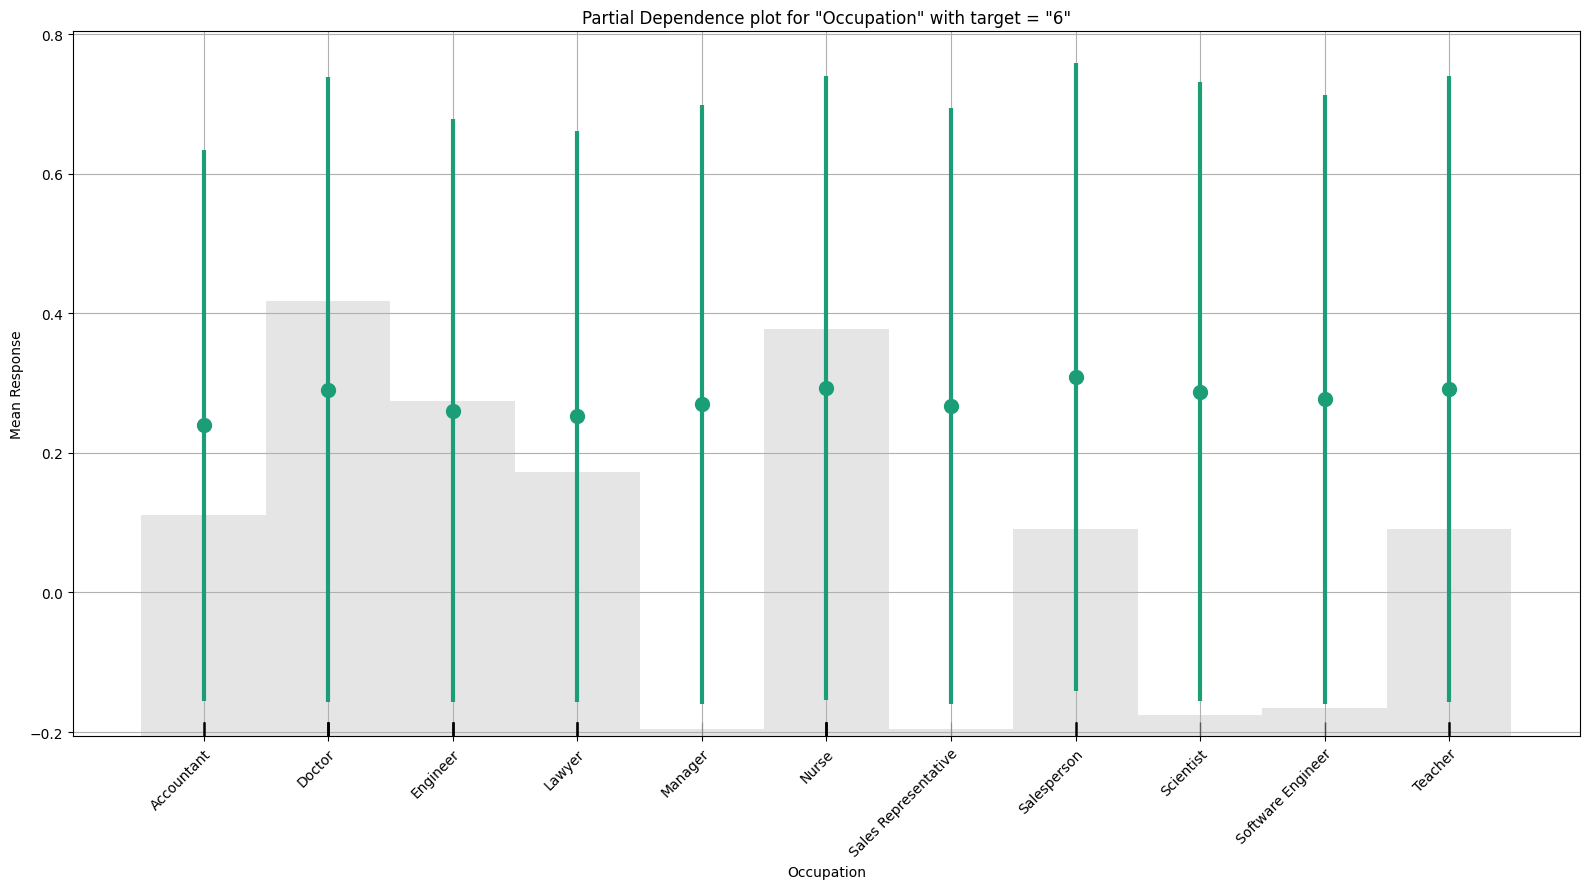

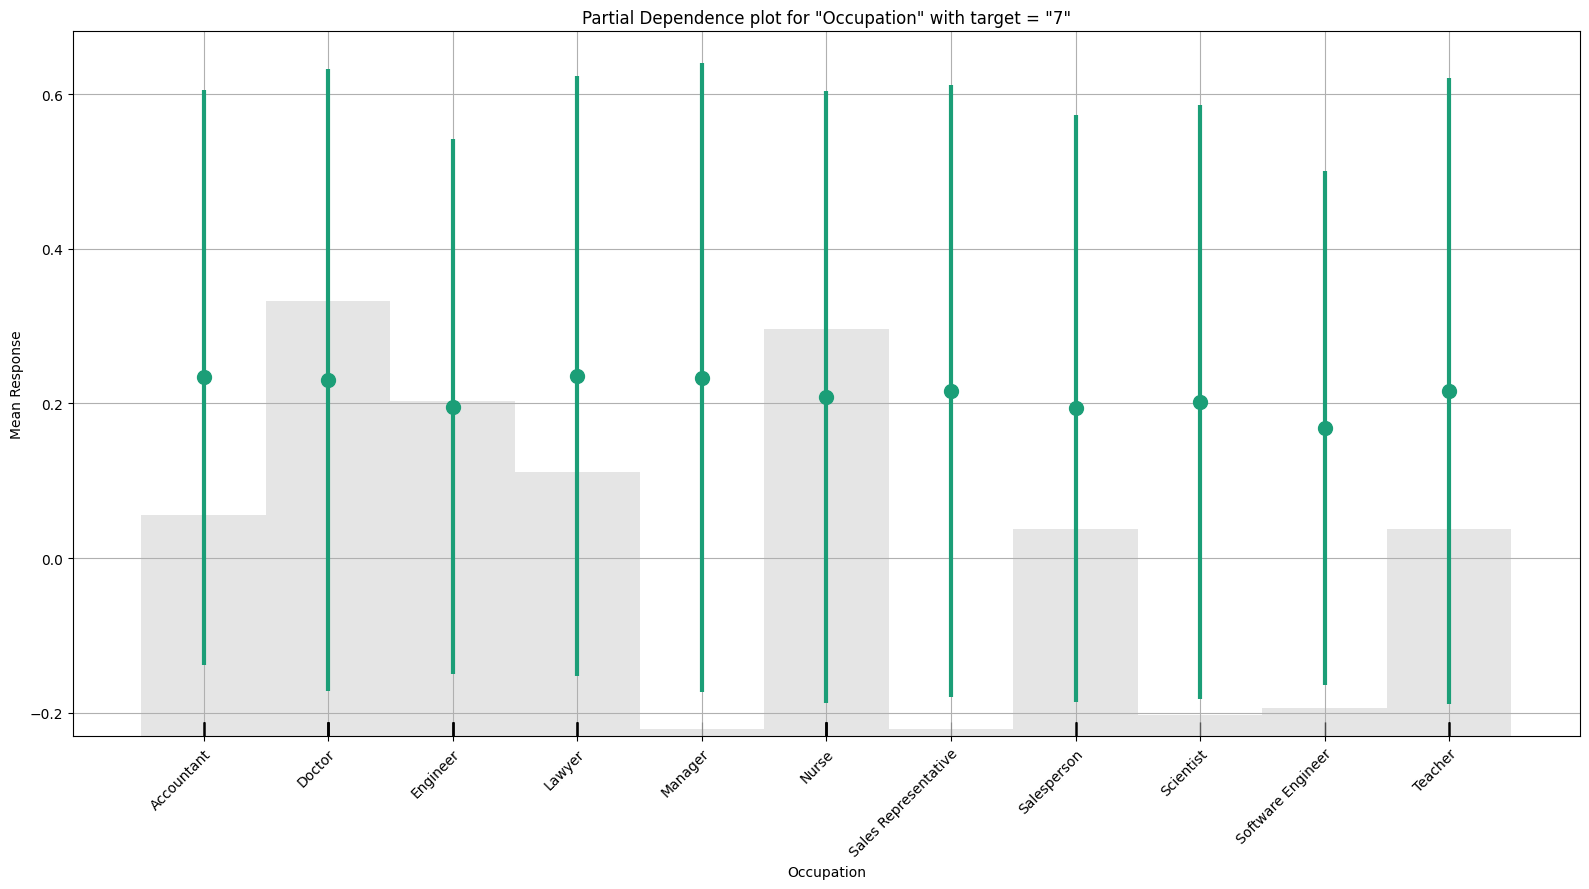

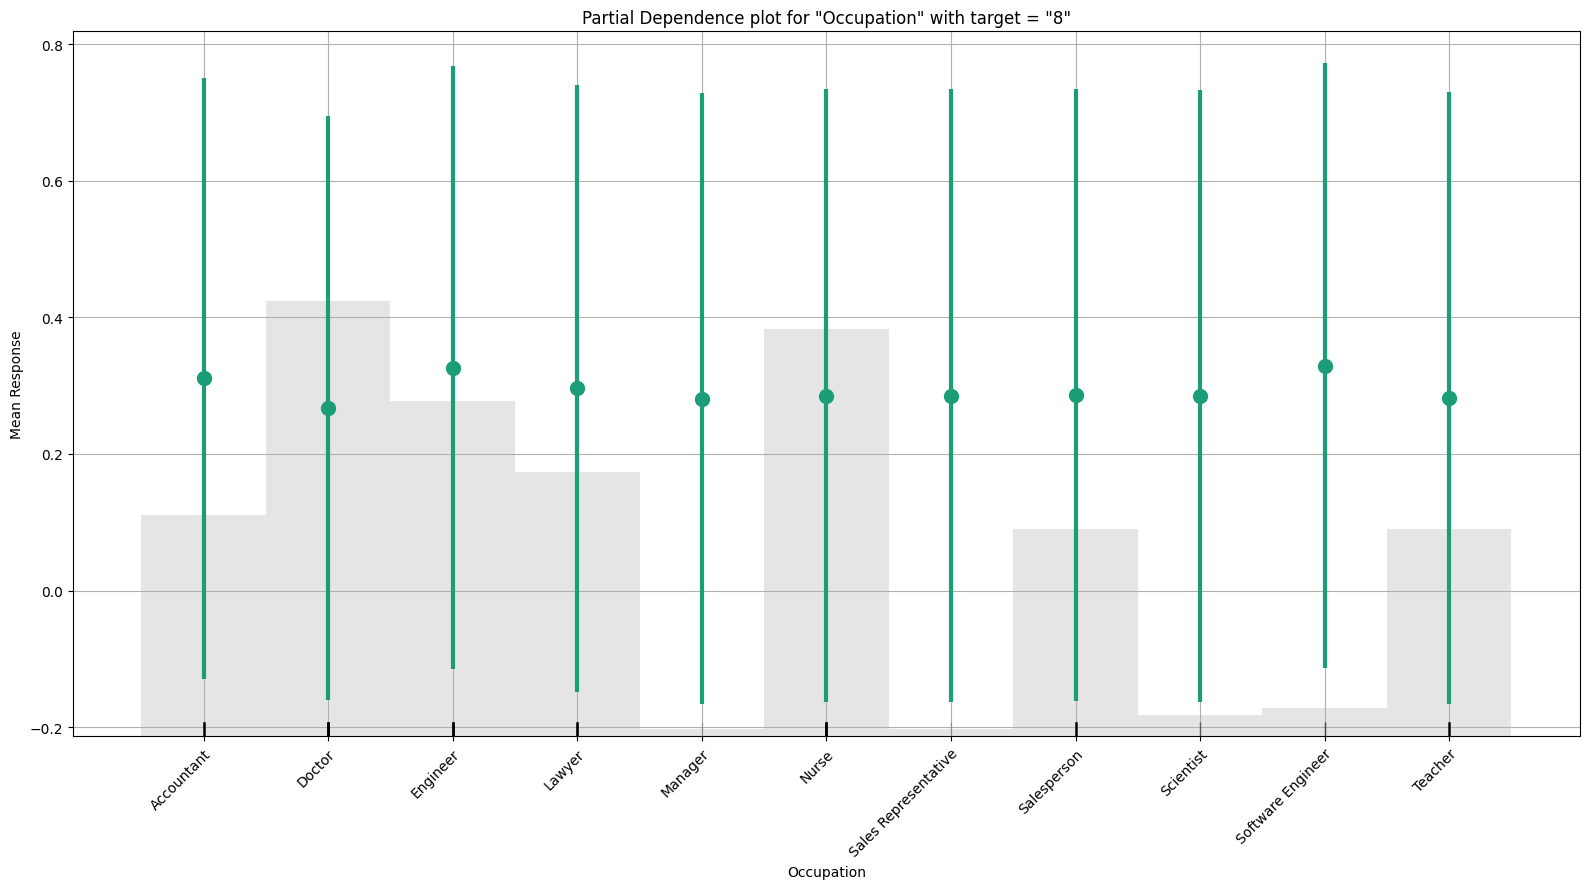

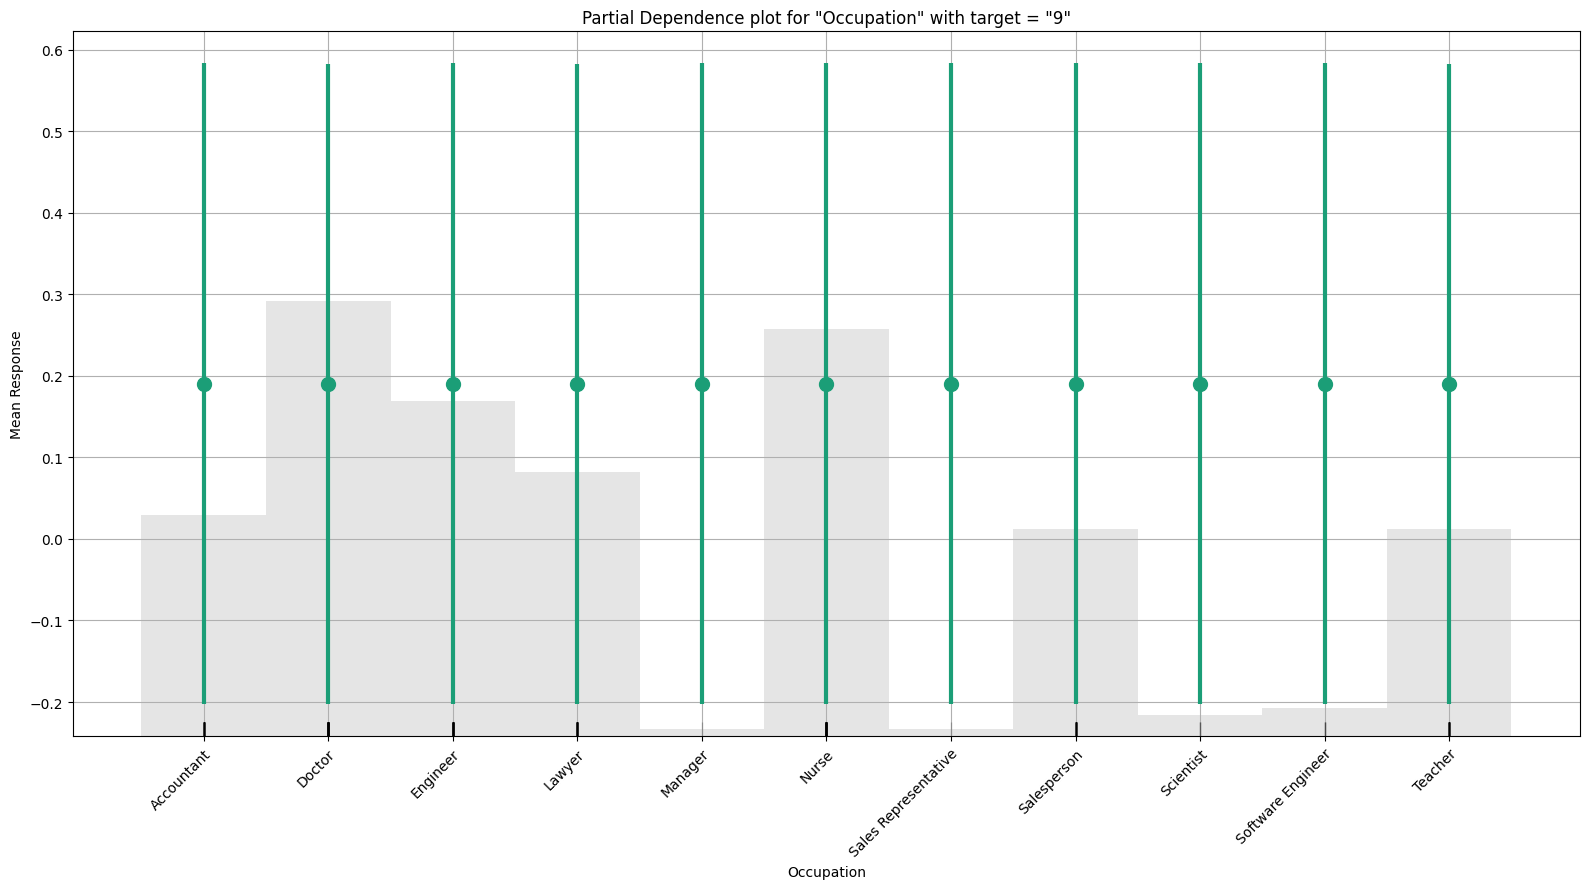

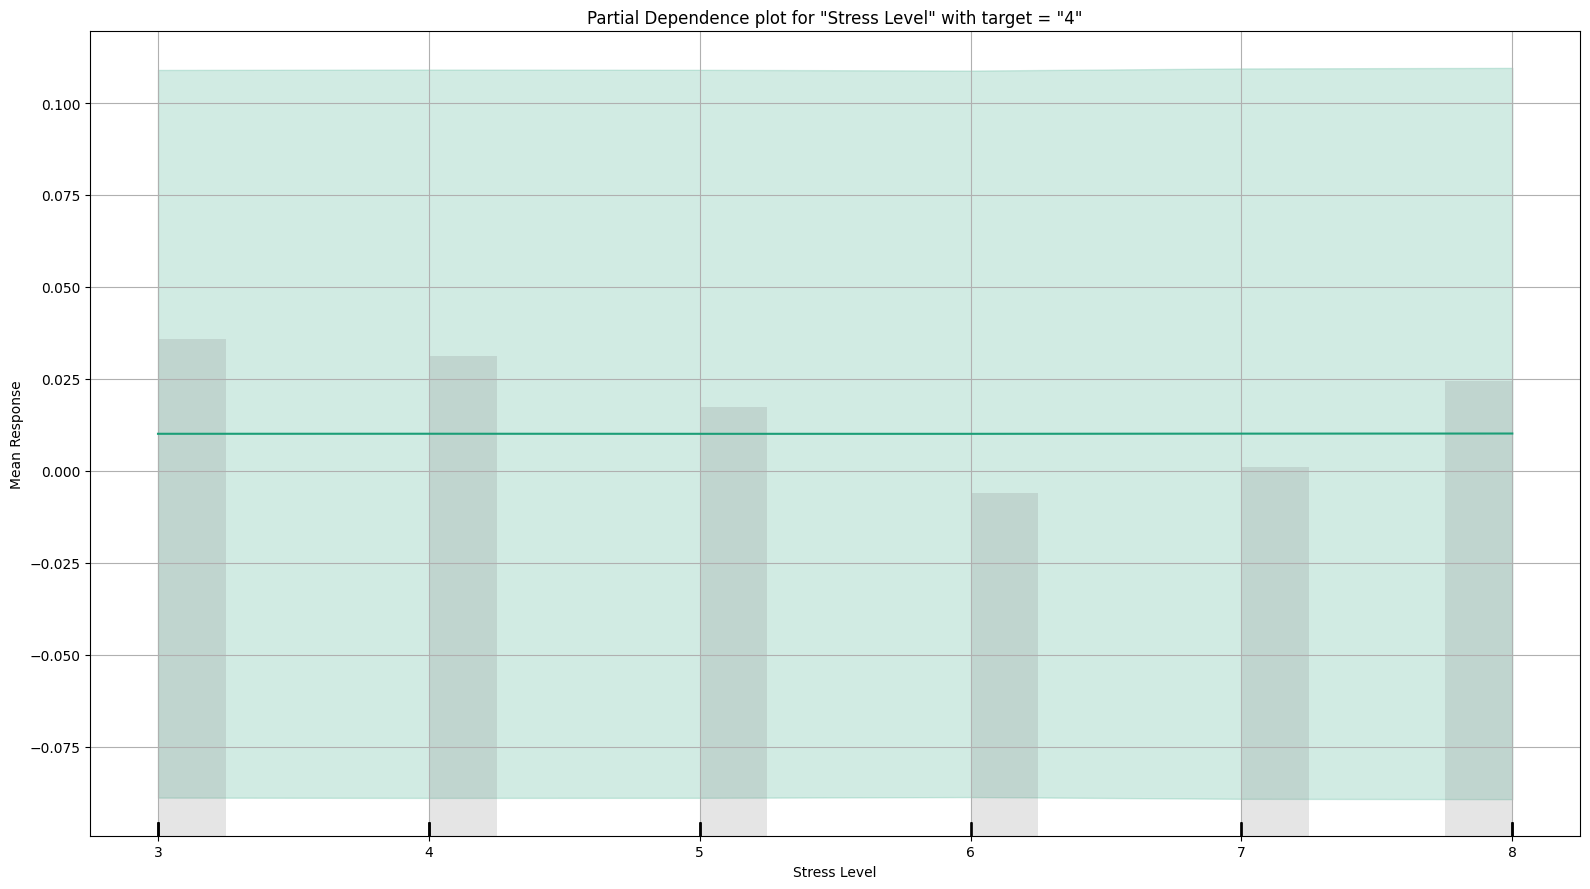

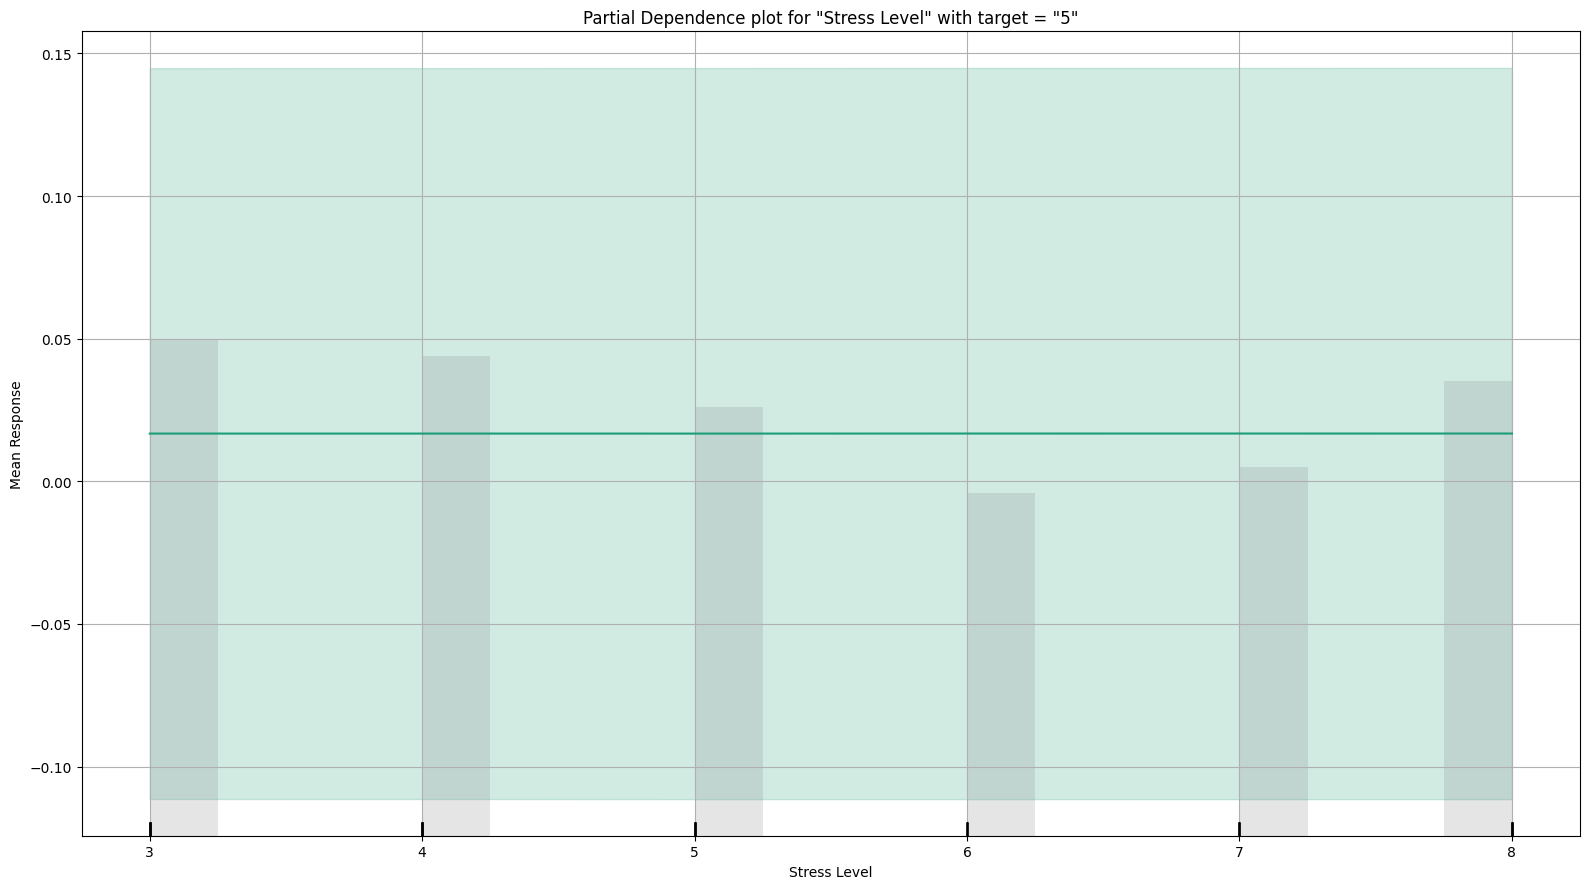

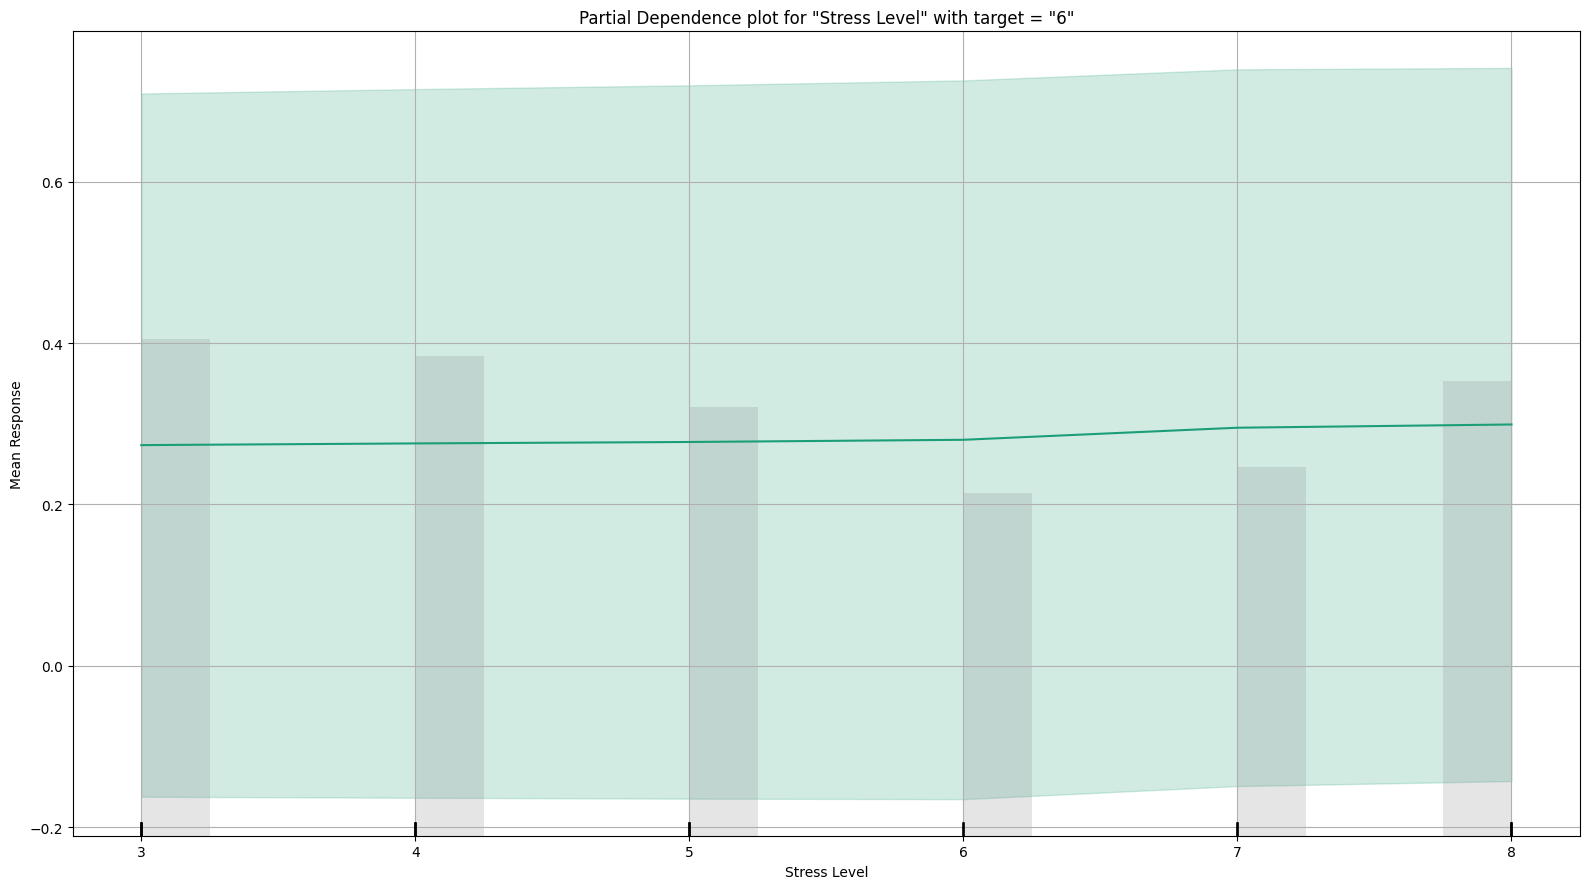

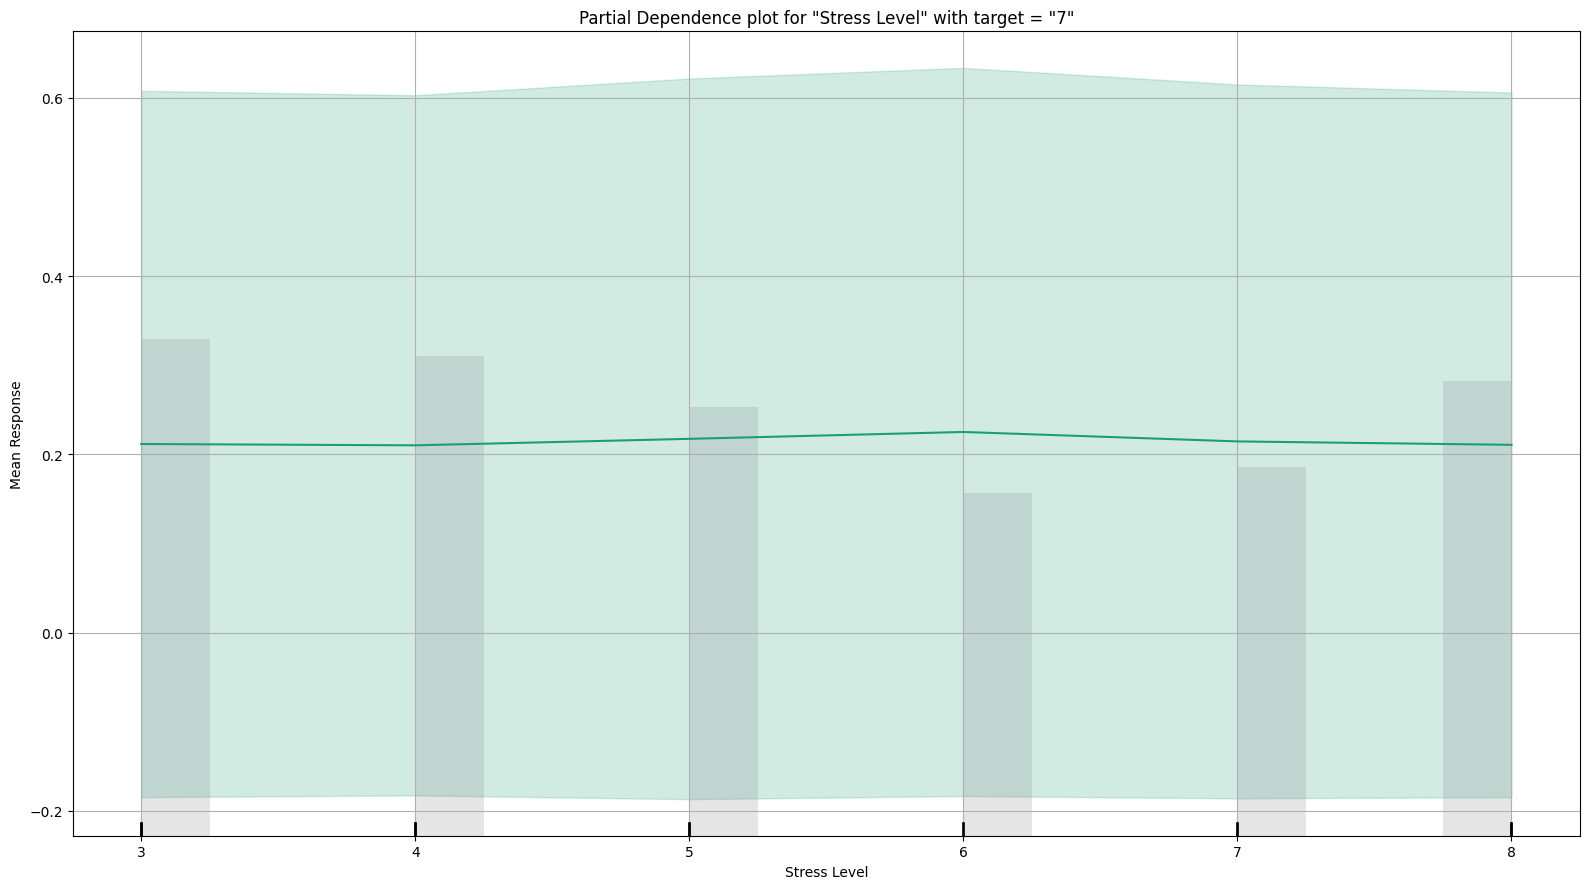

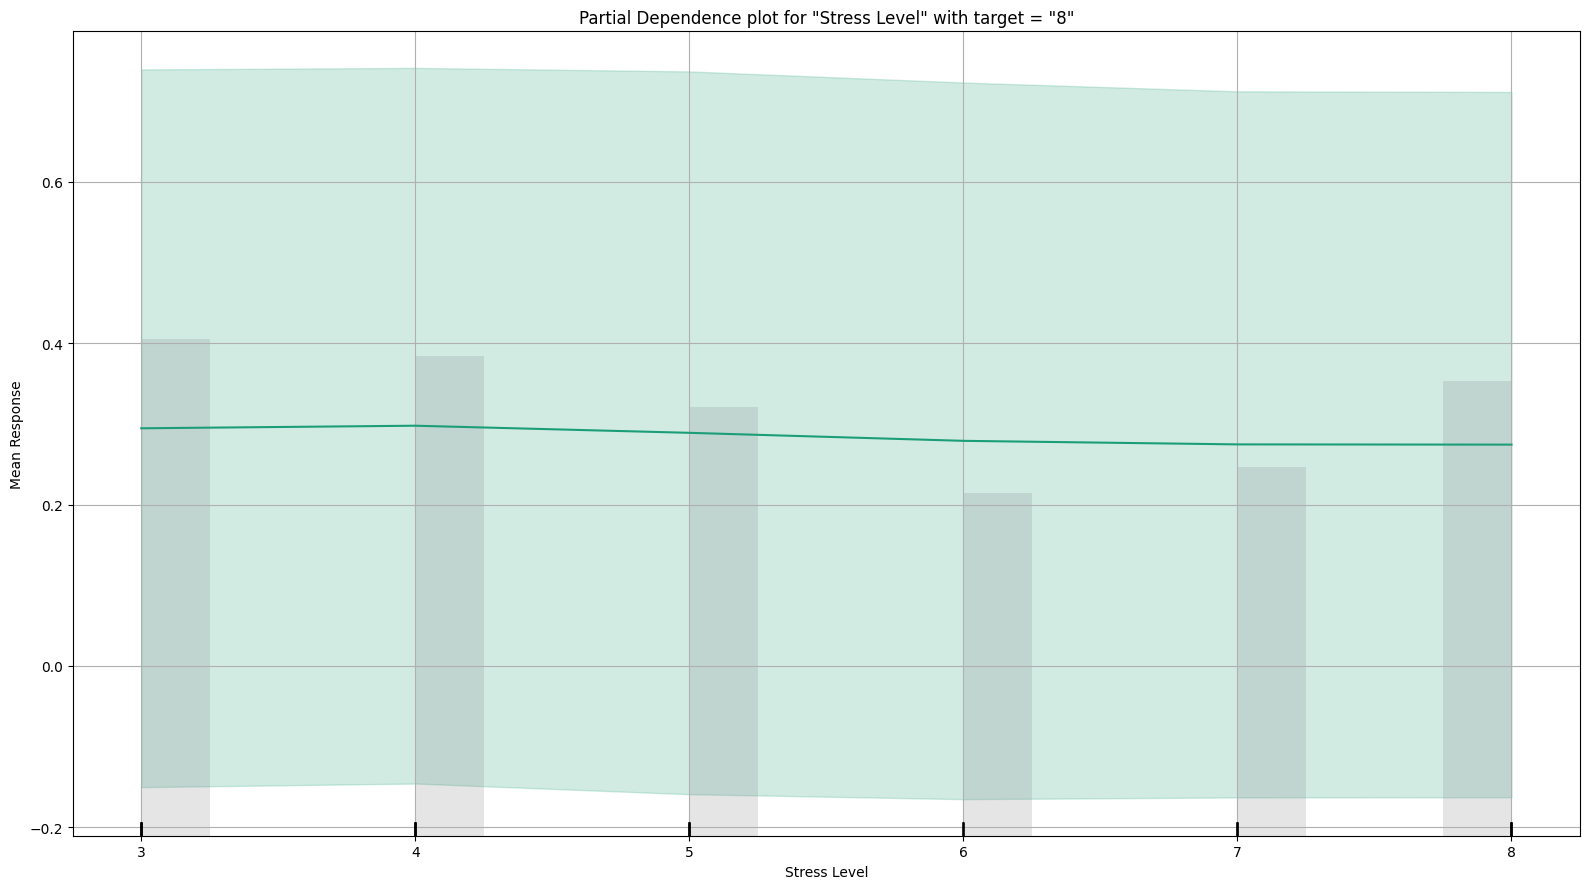

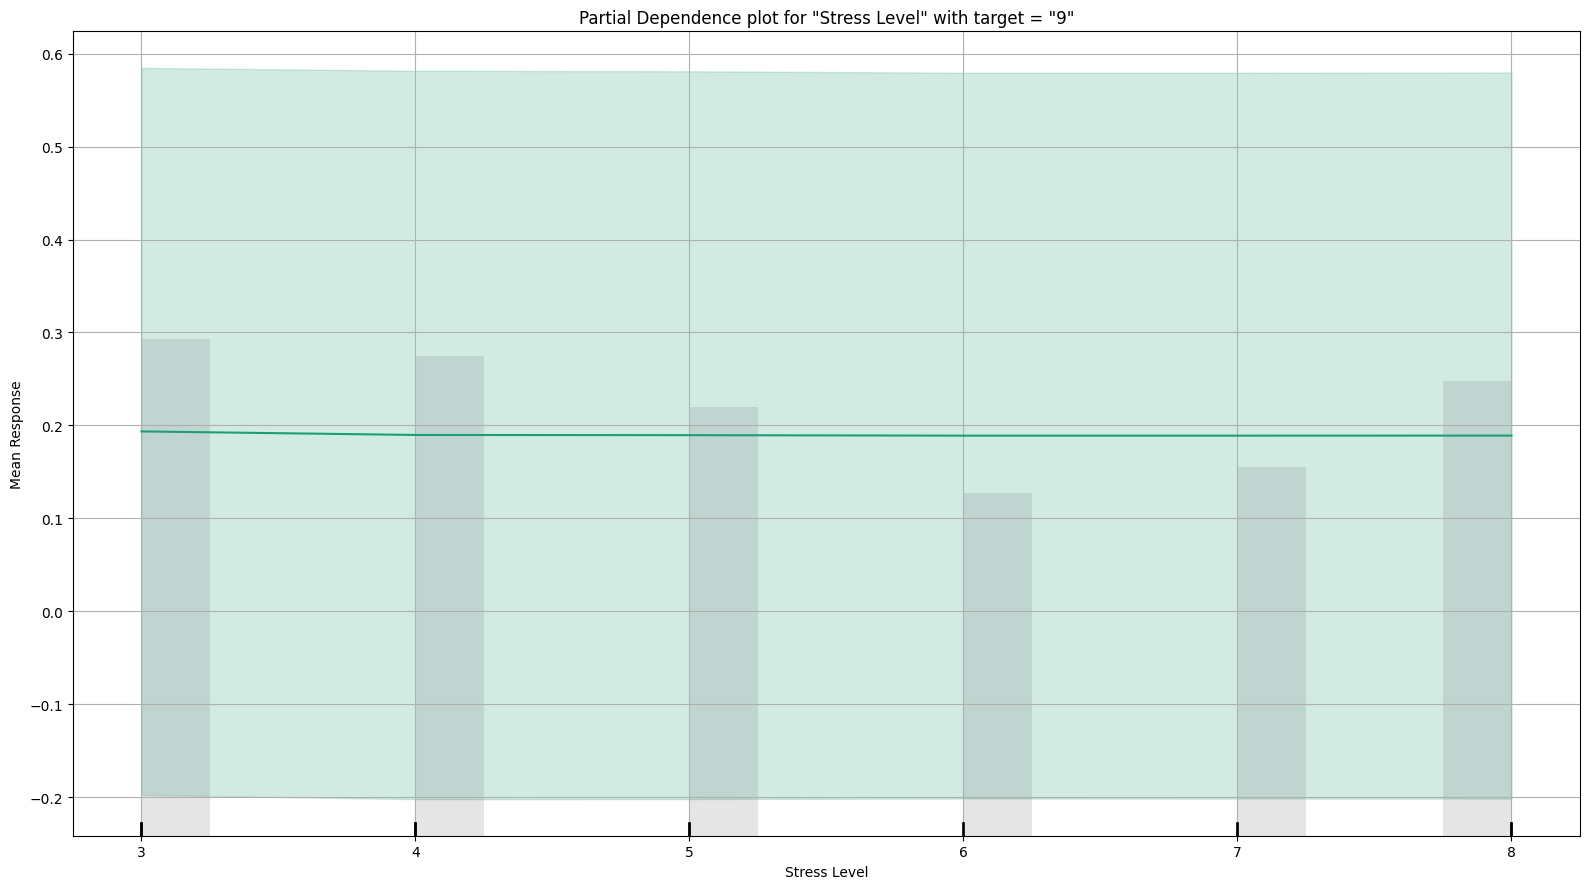

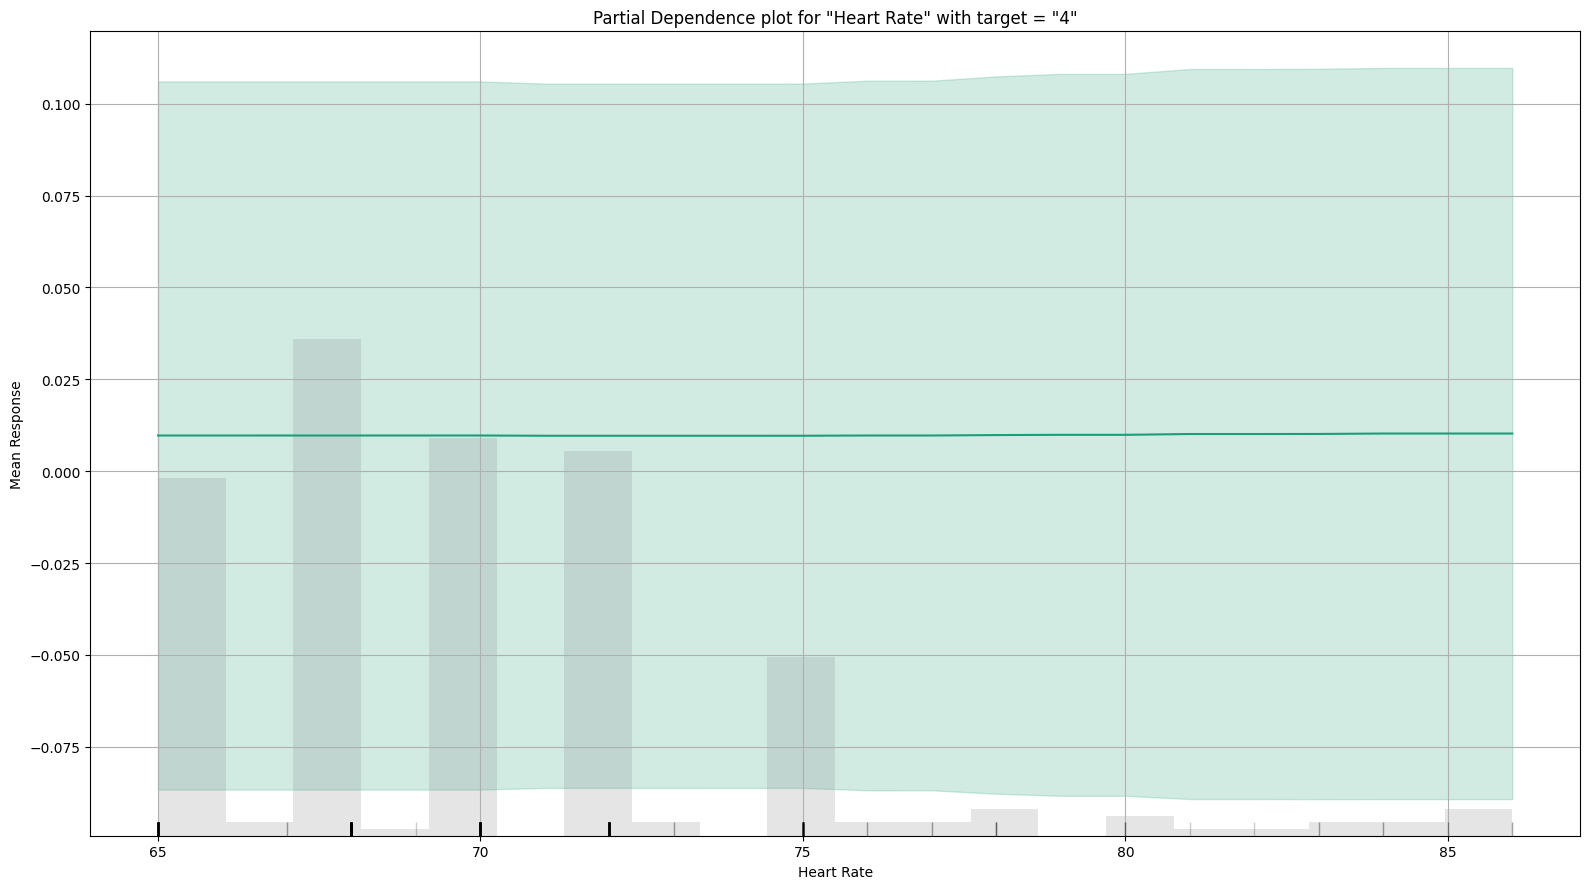

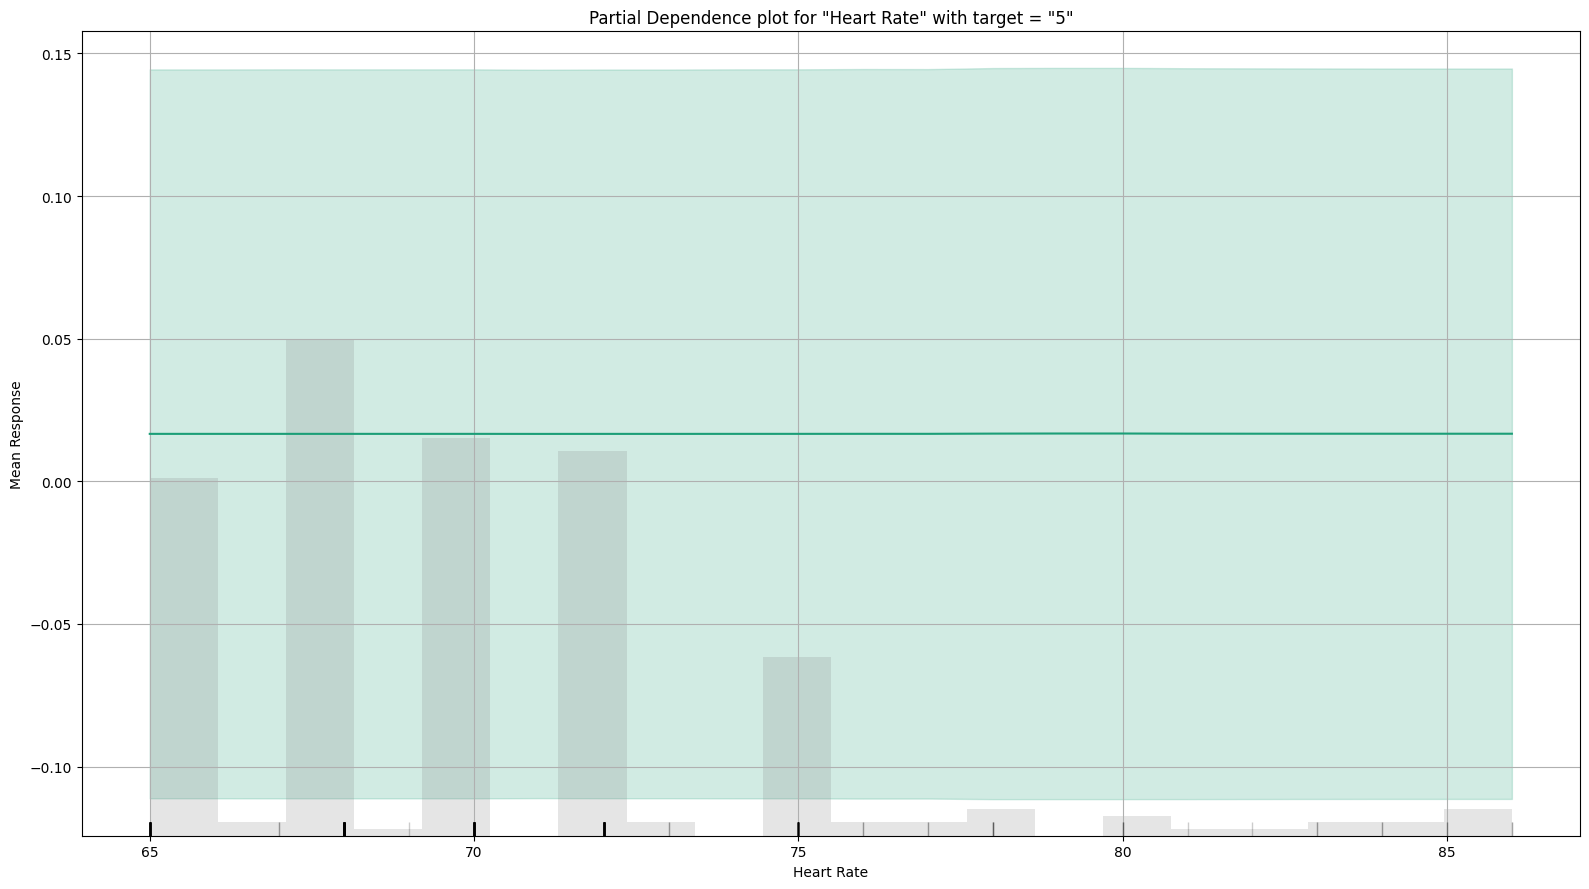

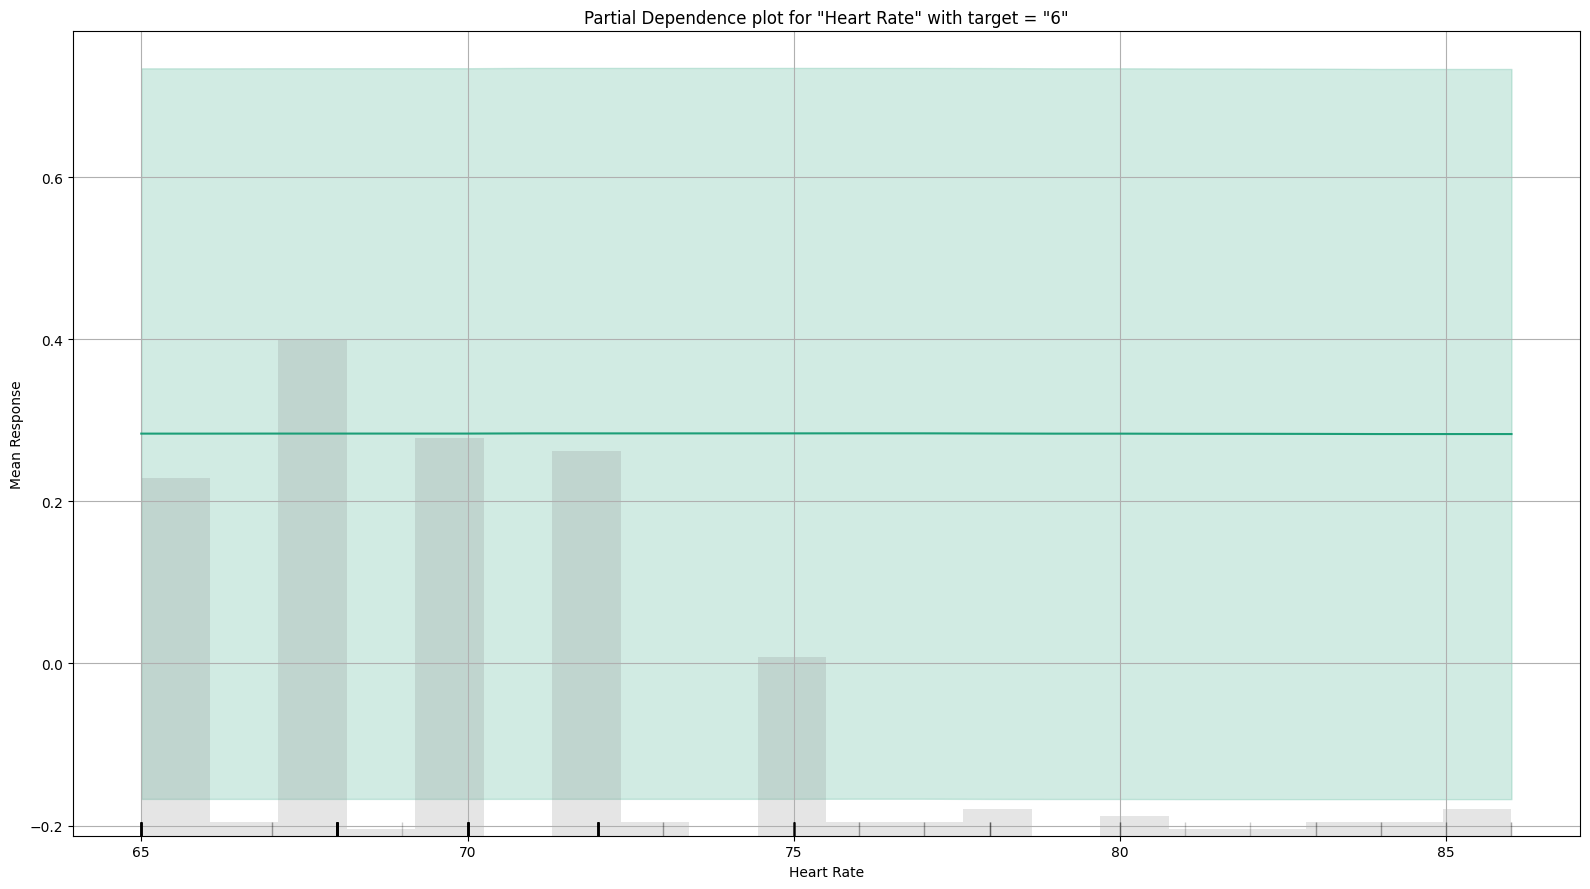

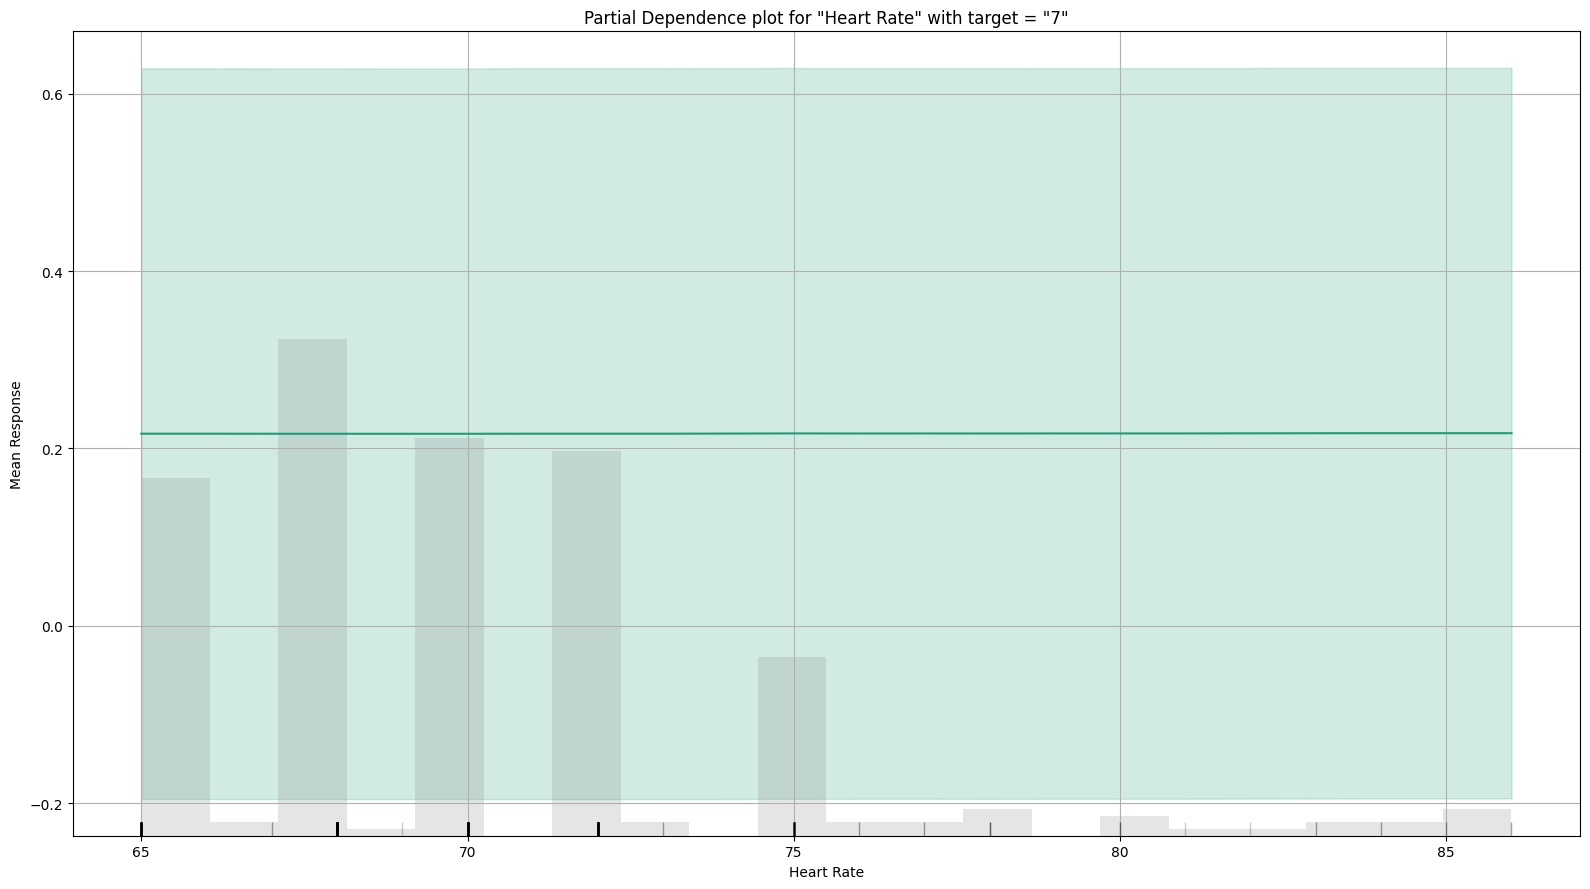

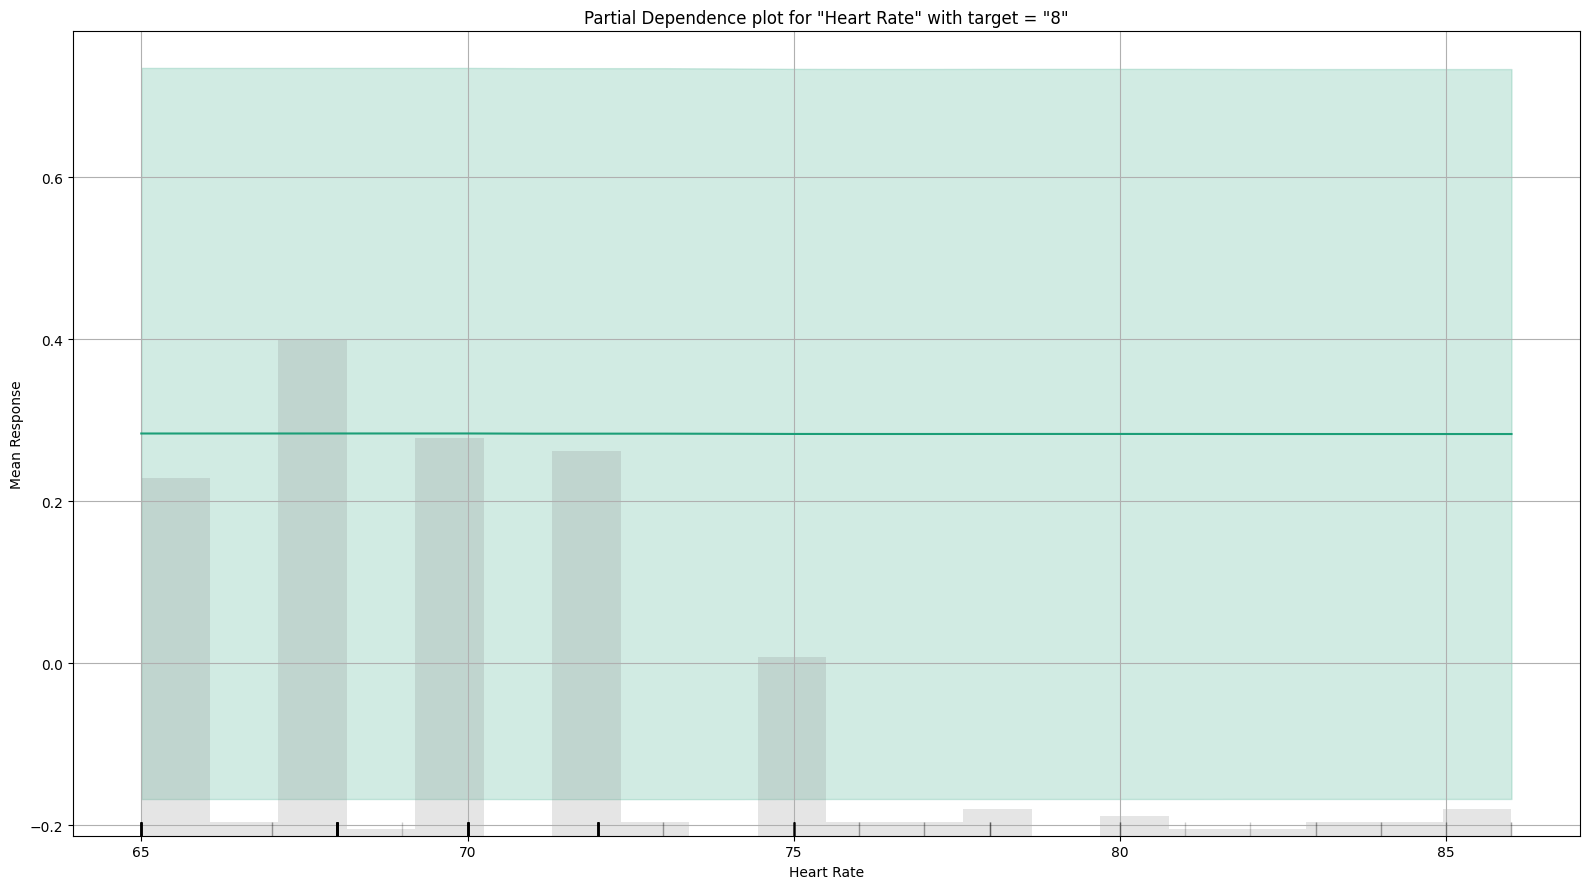

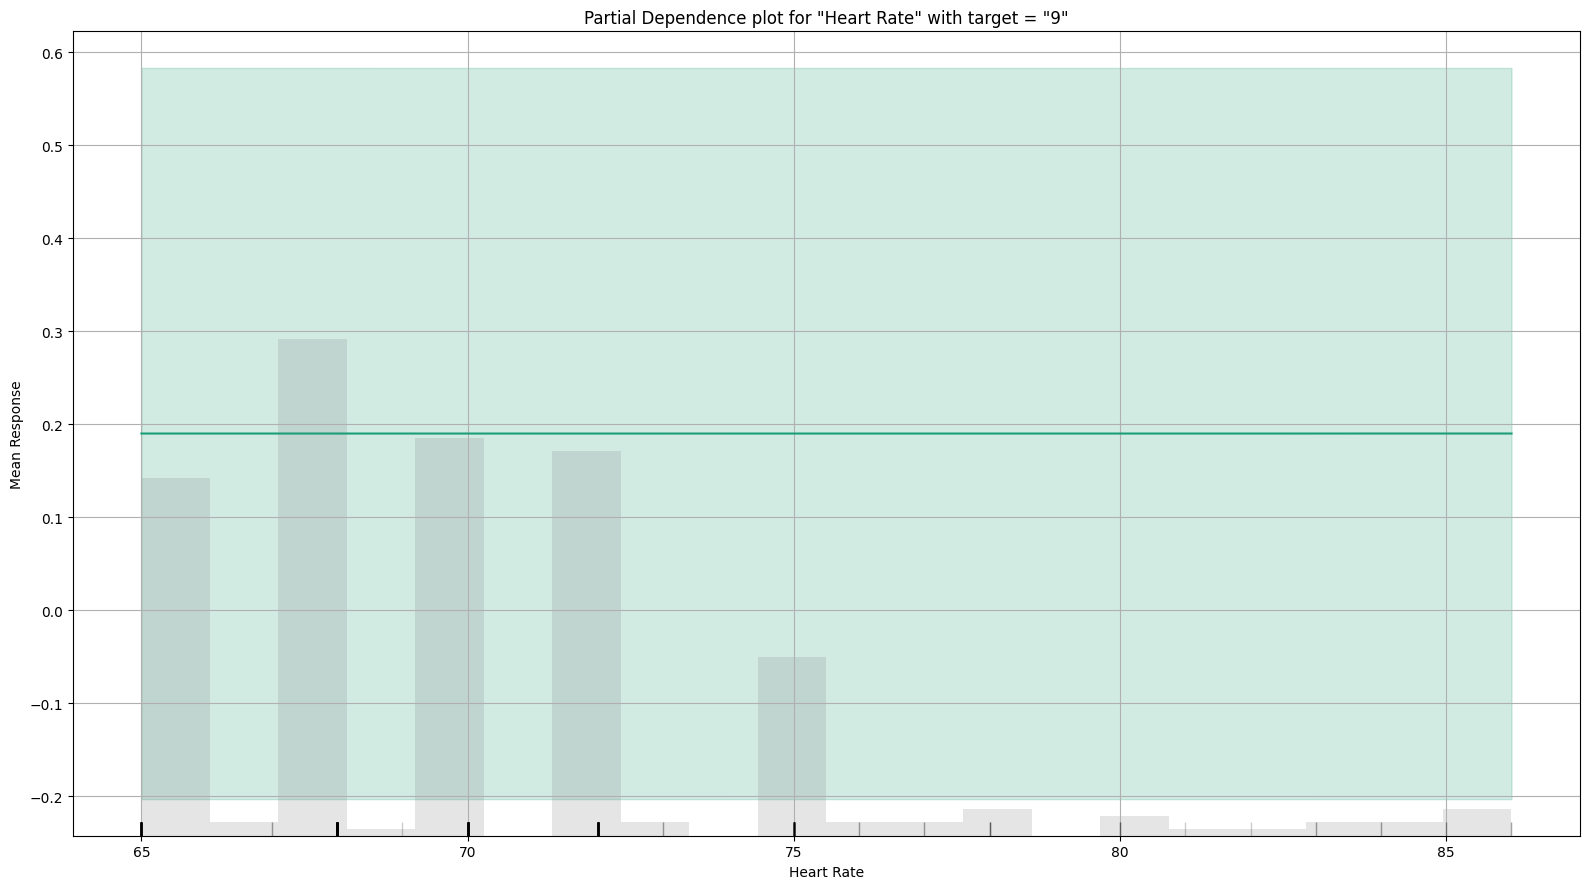

In [51]:
best_model.explain(df_train)

In [52]:
print(best_model.auc(train = True))

NaN


In [53]:
def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

In [54]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test


{'mse': 0.040476503981091996,
 'rmse': 0.2011877331774778,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'logloss': 0.2558844296472459,
 'auc': 'NaN'}

mse,rmse,logloss is approx 0, lower the value better the fit, so tree model is a perfect fit model. In this case, 'NaN' in auc indicates that AUC is not applicable or available.

In [55]:
!pip install shap

In [56]:
import shap

# SHAP analysis for Linear model (Logistic Regression)

In [57]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

TypeError: ignored

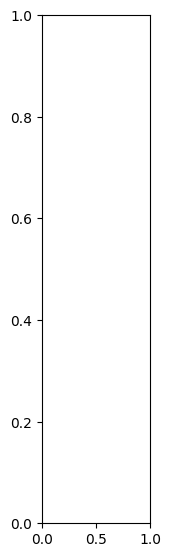

In [83]:
shap.summary_plot(shap_values_lg, x_test, plot_type="bar", color='steelblue')



# SHAP analysis for Tree based model (XGBoost)

In [61]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

[02:07:01] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


TypeError: ignored

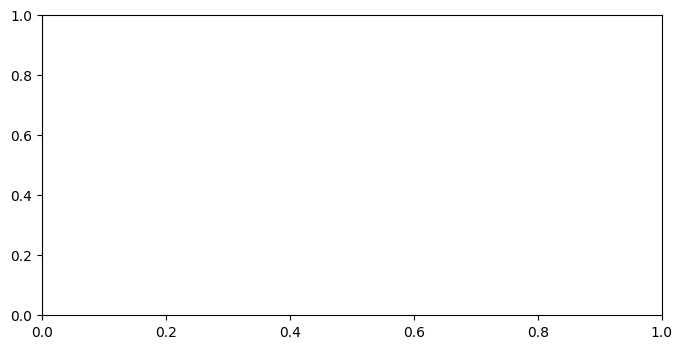

In [84]:
shap.summary_plot(shap_values, x_test, plot_type="bar", color='steelblue')

In [63]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

[02:07:27] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


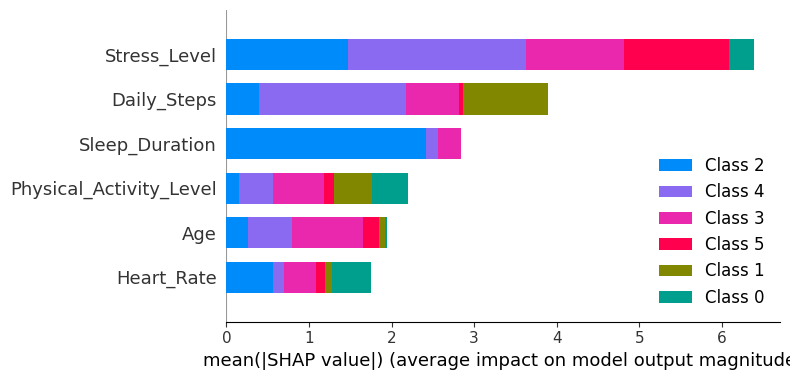

In [64]:
shap.summary_plot(shap_values, x_train)

4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

Ans: After running SHAP analysis on model 3 (i.e. GBM), by referring the above shap summary plot, 'Stress_Level' is the most important and dominant feature in the model to predict target variable which has negative impact on output. Where as, 'Heart_Rate' is less important.



# **Citations**
1.In this notebook following techniques are taken into consideration

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.stackoverflow Link - https://stackoverflow.com

3.Sleep Data Analysis - https://www.mastersindatascience.org/resources/sleep-data-to-improve-rest/

4.Sleep_health_and_lifestyle_dataset - https://github.com/Akanksha-Nakati/Data-Science-Engineering-Methods/blob/main/Sleep_health_and_lifestyle_dataset.csv

5.Code Reference - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb



# **License**
# **Copyright 2023 Akanksha Nakati**
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.